In [2]:
# import dependencies 
import pickle 
from tqdm.notebook import tqdm
import numpy as np
from allennlp.data.tokenizers.spacy_tokenizer import SpacyTokenizer
import plotnine
from plotnine import *
import nltk
import pandas as pd
import os 
from utils import *
from latex_helpers import *

import warnings
warnings.filterwarnings('ignore')

In [3]:
def to_ggplot(list_of_data, list_of_editors, metric):
    rows = []
    for name, data in zip(list_of_editors, list_of_data):
        for step in data:
            for value in data[step]:
                rows.append([name, str(step), value])

    df = pd.DataFrame(rows, columns=["Editor", "Step", metric])
    return df 

# Flip Rate

Get flip rate from pickle files

In [4]:
from tqdm import tqdm
import os, spacy

folder_path = "C:\\Users\\acer\Downloads\Counterfactuals_of_Counterfactuals\Edits\imdb"
folder_path2 = "C:\\Users\\acer\Downloads\Counterfactuals_of_Counterfactuals\Edits\\newsgroups"
folder_path3 = "C:\\Users\\acer\Documents\edits_from_aris\\pickle_files"

names = os.listdir(folder_path)
names2 = os.listdir(folder_path2)
names3 = os.listdir(folder_path3)
filenames = [folder_path+"\\"+item for item in names] + [folder_path2+"\\"+item2 for item2 in names2] + [folder_path3+"\\"+item3 for item3 in names3]

for filename in filenames:
    pickle_file = filename
    if "beam" in filename or "greedy" in filename:
        continue
    edit_list = load_pickle(pickle_file)
    flip_rate = []
    total = len(edit_list)
    for i in range(0,9):
        flipped_count = 0
        total = len([item[0] for item in edit_list if len(item)>i])
        for item in edit_list:
            if len(item) > i+1:
                #for newsgroups
                if "newsgroups" in filename:
                    if (item[i][1] != item[i+1][1]):
                        flipped_count+=1
                #for imdb
                if "imdb" in filename:
                    if round(item[i][1][0]) != round(item[i+1][1][0]):
                        flipped_count+=1

        flip_rate.append(round((flipped_count / total),4))
        total = flipped_count
    print(pickle_file.split('\\')[-1].split('.pickle')[0].split('.pkl')[0], '=', flip_rate)

imdb_500_adj = [0.5233, 0.8018, 0.7925, 0.652, 0.631, 0.661, 0.5698, 0.559, 0.5032]
imdb_500_noun = [0.5326, 0.7879, 0.7149, 0.6489, 0.6592, 0.5864, 0.5734, 0.576, 0.5142]
imdb_500_random = [0.9953, 0.8419, 0.7163, 0.6767, 0.6279, 0.6442, 0.6186, 0.593, 0.5674]
imdb_500_random_adj = [0.4628, 0.801, 0.601, 0.5632, 0.4731, 0.4121, 0.2865, 0.2045, 0.2035]
imdb_500_random_noun = [0.4442, 0.6528, 0.4635, 0.3802, 0.3403, 0.3069, 0.2406, 0.2567, 0.2246]
imdb_500_random_verb = [0.4023, 0.6571, 0.5523, 0.4302, 0.3373, 0.2798, 0.259, 0.2822, 0.2687]
imdb_500_verb = [0.4628, 0.7015, 0.6984, 0.5926, 0.544, 0.5486, 0.5116, 0.494, 0.5093]
imdb_mice = [1.0, 0.8422, 0.891, 0.877, 0.8677, 0.8445, 0.8724, 0.8654, 0.8561]
imdb_polyjuice = [0.8747, 0.9107, 0.9392, 0.949, 0.9592, 0.9617, 0.9515, 0.9719, 0.9668]
imdb_textfooler = [0.6241, 0.6984, 0.7193, 0.7309, 0.7517, 0.7633, 0.7703, 0.7796, 0.7865]
imdb_textfooler_roberta = [0.0651, 0.0385, 0.0601, 0.0433, 0.0529, 0.0337, 0.0457, 0.0288, 0.0481]
newsgrou

#### Latex pos flip rate

In [5]:
imdb_mice_adj = [0.4419, 0.7917, 0.7241, 0.6121, 0.5395, 0.4931, 0.4552, 0.408, 0.4054]
imdb_500_random_adj = [0.4628, 0.801, 0.601, 0.5632, 0.4731, 0.4121, 0.2865, 0.2045, 0.2035]
imdb_polyjuice_adj_new = [0.8814, 0.9657, 0.9809, 0.9805, 0.9744, 0.9913, 0.9882, 0.9881, 0.9819]
imdb_textfooler_ADJ = [0.2581, 1.0, 0.973, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]    

imdb_500_random_noun = [0.4442, 0.6528, 0.4635, 0.3802, 0.3403, 0.3069, 0.2406, 0.2567, 0.2246]
imdb_mice_noun = [0.4, 0.7011, 0.6412, 0.506, 0.5122, 0.4049, 0.3913, 0.4051, 0.3248]
imdb_polyjuice_new_noun = [0.6977, 0.93, 0.9785, 0.989, 0.9852, 0.9887, 0.9962, 0.9924, 1.0]
imdb_textfooler_NOUN = [0.2233, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

imdb_mice_verb = [0.393, 0.6608, 0.5549, 0.4688, 0.461, 0.4238, 0.3931, 0.3429, 0.3284]
imdb_500_random_verb = [0.4023, 0.6571, 0.5523, 0.4302, 0.3373, 0.2798, 0.259, 0.2822, 0.2687]
imdb_polyjuice_new_verb = [0.807, 0.9251, 0.9751, 0.9808, 0.9935, 0.9934, 1.0, 0.9967, 0.9967]
imdb_textfooler_VERB = [0.2395, 1.0, 0.9806, 1.0, 0.9901, 1.0, 0.99, 1.0, 0.9899]

imdb_adj = dict()
imdb_noun = dict()
imdb_verb = dict()
imdb_rows = dict()
for i in range(9):
    imdb_adj[i] = [imdb_mice_adj[i], imdb_500_random_adj[i], imdb_polyjuice_adj_new[i], imdb_textfooler_ADJ[i]]
    imdb_noun[i] = [imdb_mice_noun[i], imdb_500_random_noun[i], imdb_polyjuice_new_noun[i], imdb_textfooler_NOUN[i]]
    imdb_verb[i] = [imdb_mice_verb[i], imdb_500_random_verb[i], imdb_polyjuice_new_verb[i], imdb_textfooler_VERB[i]]
    imdb_rows[i] = [imdb_mice_adj[i], imdb_mice_noun[i], imdb_mice_verb[i], imdb_500_random_adj[i], imdb_500_random_noun[i], imdb_500_random_verb[i], imdb_polyjuice_adj_new[i], imdb_polyjuice_new_noun[i], imdb_polyjuice_new_verb[i], imdb_textfooler_ADJ[i], imdb_textfooler_NOUN[i], imdb_textfooler_VERB[i]]

newsgroups_mice_grad_adj_new = [0.272, 0.3692, 0.3202, 0.3128, 0.216, 0.2222, 0.1884, 0.1579, 0.155]
newsgroups_mice_random_adj = [0.247, 0.4179, 0.3441, 0.2899, 0.2328, 0.24, 0.1824, 0.1274, 0.1307]
newsgroups_polyjuice_new_adj = [0.492, 0.6382, 0.7739, 0.7942, 0.8031, 0.8774, 0.9191, 0.936, 0.8803]
newsgroups_textfooler_ADJ = [0.186, 0.8602, 0.9563, 0.9804, 0.98, 1.0, 0.9864, 1.0, 0.9862]

newsgroups_mice_grad_noun_new = [0.571, 0.6803, 0.6294, 0.6095, 0.5667, 0.5485, 0.4821, 0.4534, 0.448]
newsgroups_mice_random_noun = [0.5246, 0.6089, 0.5229, 0.4836, 0.4372, 0.4032, 0.351, 0.2823, 0.2812]
newsgroups_polyjuice_new_noun = [0.524, 0.6469, 0.823, 0.914, 0.8745, 0.9058, 0.9356, 0.9524, 0.9167]
newsgroups_textfooler_NOUN = [0.577, 0.9879, 0.9807, 0.9964, 0.9892, 0.9982, 0.9927, 1.0, 0.9945]

newsgroups_mice_grad_verb_new = [0.335, 0.4868, 0.482, 0.4218, 0.4012, 0.3738, 0.3456, 0.331, 0.2975]
newsgroups_mice_random_verb = [0.312, 0.4697, 0.3579, 0.3189, 0.2842, 0.2833, 0.2472, 0.2046, 0.1923]
newsgroups_polyjuice_new_verb = [0.472, 0.6144, 0.8034, 0.9056, 0.872, 0.9022, 0.9217, 0.9608, 0.9524]
newsgroups_textfooler_VERB = [0.376, 0.9601, 0.9584, 0.9827, 0.9735, 0.997, 0.9879, 1.0, 1.0]

news_adj = dict()
news_noun = dict()
news_verb = dict()
news_rows = dict()
for i in range(9):
    news_adj[i] = [newsgroups_mice_grad_adj_new[i], newsgroups_mice_random_adj[i], newsgroups_polyjuice_new_adj[i], newsgroups_textfooler_ADJ[i]]
    news_noun[i] = [newsgroups_mice_grad_noun_new[i], newsgroups_mice_random_noun[i], newsgroups_polyjuice_new_noun[i], newsgroups_textfooler_NOUN[i]]
    news_verb[i] = [newsgroups_mice_grad_verb_new[i], newsgroups_mice_random_verb[i], newsgroups_polyjuice_new_verb[i], newsgroups_textfooler_VERB[i]]
    news_rows[i] = [newsgroups_mice_grad_adj_new[i], newsgroups_mice_grad_noun_new[i], newsgroups_mice_grad_verb_new[i], newsgroups_mice_random_adj[i], newsgroups_mice_random_noun[i], newsgroups_mice_random_verb[i], newsgroups_polyjuice_new_adj[i], newsgroups_polyjuice_new_noun[i], newsgroups_polyjuice_new_verb[i], newsgroups_textfooler_ADJ[i], newsgroups_textfooler_NOUN[i], newsgroups_textfooler_VERB[i]]

In [6]:
latex = create_latex_table_for_pos("Flip Rate", [], imdb_rows, imdb_adj, imdb_noun, imdb_verb, news_rows, news_adj, news_noun, news_verb)
print(latex)

\begin{table}[H]
\begin{adjustwidth}{-0.35in}{0in}
  \centering
  \begin{tabular}{c|ccc|ccc|ccc|ccc}
    \hline
    \multicolumn{1}{c}{\multirow{3}{*}{}} & \multicolumn{12}{c}{IMDb} \\
    \cline{2-13}
    \multicolumn{1}{c}{} & \multicolumn{3}{c|}{MiCE} & \multicolumn{3}{c|}{MiCERandom} & \multicolumn{3}{c|}{Polyjuice} & \multicolumn{3}{c}{TextFooler} \\
    \cline{2-13}
    \multicolumn{1}{c}{} & ADJ & NOUN & VERB & ADJ & NOUN & VERB & ADJ & NOUN & VERB & ADJ & NOUN & VERB \\
    \hline
\textbf{Flip Rate@1↑} & 0.4419  & 0.4  & 0.393  & 0.4628  & 0.4442  & 0.4023  & \textbf{0.8814}  & \textbf{0.6977}  & \textbf{0.807}  & 0.2581  & 0.2233  & 0.2395  \\
\textbf{Flip Rate@2↑} & 0.7917  & 0.7011  & 0.6608  & 0.801  & 0.6528  & 0.6571  & 0.9657  & 0.93  & 0.9251  & \textbf{1.0}  & \textbf{1.0}  & \textbf{1.0}  \\
\textbf{Flip Rate@3↑} & 0.7241  & 0.6412  & 0.5549  & 0.601  & 0.4635  & 0.5523  & \textbf{0.9809}  & 0.9785  & 0.9751  & 0.973  & \textbf{1.0}  & \textbf{0.9806}  \\
\textbf{Flip

#### Latex flip rate for the 4 editors

In [7]:
imdb_mice = [1.0, 0.8422, 0.891, 0.877, 0.8677, 0.8445, 0.8724, 0.8654, 0.8561]
imdb_polyjuice = [0.8747, 0.9107, 0.9392, 0.949, 0.9592, 0.9617, 0.9515, 0.9719, 0.9668]
imdb_textfooler = [0.6241, 0.6984, 0.7193, 0.7309, 0.7517, 0.7633, 0.7703, 0.7796, 0.7865]
imdb_mice_random = [0.9953, 0.8419, 0.7163, 0.6767, 0.6279, 0.6442, 0.6186, 0.593, 0.5674]

flip_imdb = dict()
for i in range(0,9):
    flip_imdb[i] = [imdb_mice[i], imdb_mice_random[i], imdb_polyjuice[i], imdb_textfooler[i]]

In [8]:
news_mice = [0.89, 0.9188, 0.8806, 0.8775, 0.8574, 0.8614, 0.8524, 0.8534, 0.8322]
news_polyjuice = [0.726, 0.2231, 0.9074, 0.8912, 0.9237, 0.8595, 0.9135, 0.9263, 0.9659]
news_textfooler = [0.941, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
news_mice_random = [0.79, 0.715, 0.6395, 0.6224, 0.5972, 0.567, 0.5565, 0.5484, 0.5444]

flip_news = dict()
for i in range(0,9):
    flip_news[i] = [news_mice[i], news_mice_random[i], news_polyjuice[i], news_textfooler[i]]

In [9]:
latex = create_latex_table_flip_without_pos("Flip Rate", [],  flip_imdb, flip_news)
print(latex)

\begin{table}[H]
\begin{adjustwidth}{0in}{0in}
  \centering
  \begin{tabular}{c|cccc}
    \hline
    \multicolumn{1}{c}{\multirow{2}{*}{}} & \multicolumn{4}{c}{\textbf{IMDb}} \\
    \cline{2-5}
    \multicolumn{1}{c}{} & \multicolumn{1}{c}{MiCE} & \multicolumn{1}{c}{MiCERandom} & \multicolumn{1}{c}{Polyjuice} & \multicolumn{1}{c}{TextFooler} \\
    \cline{2-5}
    \hline
\textbf{Flip Rate@1↑} & \textbf{1.0}  & 0.9953  & 0.8747  & 0.6241  \\
\textbf{Flip Rate@2↑} & 0.8422  & 0.8419  & \textbf{0.9107}  & 0.6984  \\
\textbf{Flip Rate@3↑} & 0.891  & 0.7163  & \textbf{0.9392}  & 0.7193  \\
\textbf{Flip Rate@5↑} & 0.8677  & 0.6279  & \textbf{0.9592}  & 0.7517  \\
\textbf{Flip Rate@9↑} & 0.8561  & 0.5674  & \textbf{0.9668}  & 0.7865  \\
\hline
\multirow{1}{*}{\textbf{}} & \multicolumn{4}{c}{\textbf{NewsGroups}} \\ \cline{2-5}
\textbf{Flip Rate@1↑} & 0.89  & 0.79  & 0.726  & \textbf{0.941}  \\
\textbf{Flip Rate@2↑} & 0.9188  & 0.715  & 0.2231  & \textbf{1.0}  \\
\textbf{Flip Rate@3↑} & 0.8806 

### Total number of sentences flipped with each editor , with the POS technique:

#### IMDb

MiCE random: 284/430 sentences flipped \
MiCE grad: 331/430 sentences flipped \
**Polyjuice: 391/430** sentences flipped \
Textfooler: 153/430 sentences flipped

#### Newsgroups
**MiCE grad: 769/1000** sentences flipped \
MiCE random: 687/1000 sentences flipped \
Polyjuice: 630/1000 sentences flipped \
Textfooler: 642/1000 sentences flipped

#### Beam search flip rates table and durations

In [10]:
imdb_mice_beam120_new = [0.9977, 0.958, 0.9661, 0.9627, 0.9621, 0.9463, 0.9401, 0.9441, 0.9568]
imdb_mice_greedy = [0.9977, 1.0, 0.9977, 0.9112, 0.9182, 0.9182, 1.0, 0.9977, 0.8735]
imdb_mice_beam5 = [0.8907, 0.9186, 0.8535, 0.893, 0.8651, 0.8721, 0.8698, 0.8488, 0.8465]
imdb_mice_beam15 = [0.8767, 0.893, 0.8605, 0.8581, 0.8163, 0.8116, 0.8163, 0.8233, 0.807]
imdb_mice_beam30 = [0.8628, 0.8698, 0.8419, 0.8628, 1.0, 0.9977, 0.8228, 0.8252, 0.7972]
imdb_mice_beam60 = [0.8605, 0.8837, 0.986, 1.0, 0.9953, 0.7976, 0.8238, 1.0, 0.7786]
newsgroups_mice_beam120 = [0.9, 0.8758, 0.8398, 0.8155, 0.7694, 0.7438, 0.7217, 0.718, 0.7104]
newsgroups_mice_beam15 = [0.881, 0.8655, 0.8443, 0.8025, 0.7828, 0.7489, 0.7238, 0.7073, 0.6876]
newsgroups_mice_beam30 = [0.882, 0.8927, 0.8499, 0.8328, 0.7891, 0.7674, 0.7366, 0.7188, 0.6875]
newsgroups_mice_greedy = [0.865, 0.896, 0.8595, 0.8511, 0.8341, 0.8454, 0.8272, 0.7916, 0.7894]
newsgroups_mice_beam5 = [0.887, 0.8811, 0.8549, 0.834, 0.8143, 0.7996, 0.7601, 0.7503, 0.7368]
newsgroups_mice_beam60 = [0.891, 0.8637, 0.8492, 0.8304, 0.7936, 0.7648, 0.7316, 0.7159, 0.701]
imdb_mice = [1.0, 0.8422, 0.891, 0.877, 0.8677, 0.8445, 0.8724, 0.8654, 0.8561]
news_mice = [0.89, 0.9188, 0.8806, 0.8775, 0.8574, 0.8614, 0.8524, 0.8534, 0.8322]


flip_imdb_beam ,flip_news_beam = dict(), dict()
for i in range(0,9):
    flip_news_beam[i] = [news_mice[i], newsgroups_mice_greedy[i], newsgroups_mice_beam5[i], newsgroups_mice_beam15[i], newsgroups_mice_beam30[i], newsgroups_mice_beam60[i], newsgroups_mice_beam120[i]]
    flip_imdb_beam[i] = [imdb_mice[i], imdb_mice_greedy[i], imdb_mice_beam5[i], imdb_mice_beam15[i], imdb_mice_beam30[i], imdb_mice_beam60[i], imdb_mice_beam120_new[i]]

In [11]:
names = ["MiCE", "Greedy", "5 beams", "15 beams", "30 beams",  "60 beams", "120 beams"]
latex = create_latex_table("Flip Rate", names,  flip_imdb_beam, flip_news_beam)
print(latex)

\begin{table}[H]
\begin{adjustwidth}{0in}{0in}
\centering
\begin{tabular}{c|ccccccc}
\hline
\multirow{1}{*}{\textbf{}} & \multicolumn{7}{c}{\textbf{IMDb}} \\ \cline{2-8}
& \textbf{MiCE} & \textbf{Greedy} & \textbf{5 beams} & \textbf{15 beams} & \textbf{30 beams} & \textbf{60 beams} & \textbf{120 beams} \\ \hline
\textbf{Flip Rate@1↑} & \textbf{1.0}  & 0.9977  & 0.8907  & 0.8767  & 0.8628  & 0.8605  & 0.9977  \\
\textbf{Flip Rate@2↑} & 0.8422  & \textbf{1.0}  & 0.9186  & 0.893  & 0.8698  & 0.8837  & 0.958  \\
\textbf{Flip Rate@9↑} & 0.8561  & 0.8735  & 0.8465  & 0.807  & 0.7972  & 0.7786  & \textbf{0.9568}  \\
\hline
\multirow{1}{*}{\textbf{}} & \multicolumn{7}{c}{\textbf{NewsGroups}} \\ \cline{2-8}
\textbf{Flip Rate@1↑} & 0.89  & 0.865  & 0.887  & 0.881  & 0.882  & 0.891  & \textbf{0.9}  \\
\textbf{Flip Rate@2↑} & \textbf{0.9188}  & 0.896  & 0.8811  & 0.8655  & 0.8927  & 0.8637  & 0.8758  \\
\textbf{Flip Rate@9↑} & \textbf{0.8322}  & 0.7894  & 0.7368  & 0.6876  & 0.6875  & 0.701  & 0.7

# Duration

In [12]:
import os
names = os.listdir("C:\\Users\\acer\Documents\edits_from_aris\\flip_rates")
from_aris = ["C:\\Users\\acer\Documents\edits_from_aris\\flip_rates\\"+item for item in names]
for filename in from_aris:
    l = []
    with open(filename, "r") as f:
        for line in f:
            if "Step" in line:
                step = line.replace("\n", "")
            if "duration" in line:
                duration = float(line.split("\t")[-1].strip())
                l.append(duration)
    print(filename.split("\\")[-1].split('.txt')[0], '=', l)

imdb_beam15 = [26.474, 17.6, 19.481, 16.536, 17.015, 16.034, 16.652, 16.292, 16.314, 15.97]
imdb_beam30 = [41.518, 23.035, 25.408, 20.906, 21.497, 20.617, 20.198, 19.349, 19.061, 18.583]
imdb_beam5 = [16.937, 10.837, 11.453, 10.336, 10.523, 9.826, 10.153, 9.351, 9.654, 9.394]
imdb_beam60 = [67.732, 50.425, 51.28, 46.437, 46.257, 44.677, 43.997, 43.569, 43.071, 42.852]
imdb_greedy = [13.408, 8.04, 9.608, 7.6, 8.365, 7.712, 7.857, 7.275, 7.488, 7.191]
imdb_mice_beam120_new = [60.924, 63.961, 65.812, 62.697, 62.766, 61.473, 63.302, 60.654, 60.736, 61.774]
mice_newsgroups_gradient = [11.067, 8.553, 8.657, 8.145, 8.693, 8.632, 8.587, 9.064, 9.194, 9.007]
mice_newsgroups_random = [18.72, 11.296, 11.176, 11.693, 11.919, 11.895, 12.273, 12.336, 12.559, 12.464]
mice_newsgroups_random_ADJ = [37.989, 18.45, 20.133, 12.676, 15.359, 13.443, 13.687, 14.422, 12.44, 11.667]
mice_newsgroups_random_NOUN = [15.911, 9.657, 9.33, 7.86, 7.329, 7.651, 9.221, 9.821, 9.911, 10.215]
mice_newsgroups_random_VERB 

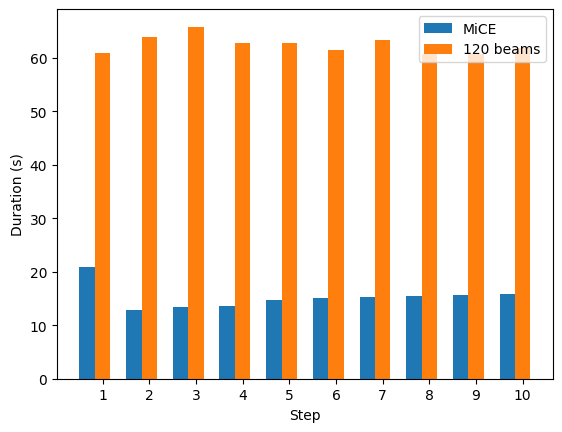

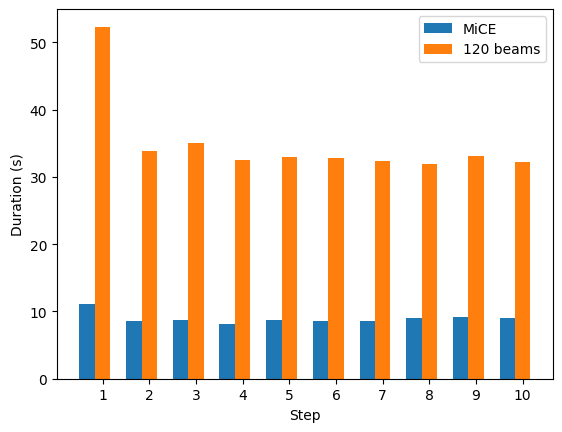

In [13]:
imdb_mice_dur = [20.93, 12.93, 13.33, 13.65, 14.8, 15.03, 15.34, 15.45, 15.67, 15.8]
imdb_mice_beam120_dur = [60.924, 63.961, 65.812, 62.697, 62.766, 61.473, 63.302, 60.654, 60.736, 61.774]
mice_newsgroups_gradient = [11.067, 8.553, 8.657, 8.145, 8.693, 8.632, 8.587, 9.064, 9.194, 9.007]
news_beam120 = [52.31, 33.855, 35.073, 32.458, 32.974, 32.828, 32.308, 31.941, 33.103, 32.168]


step_list = dict()
for i in range(10):
    step_list[i] = [imdb_mice_dur[i], imdb_mice_beam120_dur[i]]

import numpy as np
import matplotlib.pyplot as plt

N = 10
ind = np.arange(N)
width = 0.33

xvals = imdb_mice_dur
bar1 = plt.bar(ind, xvals, width)

xvals = imdb_mice_beam120_dur
bar7 = plt.bar(ind+width, xvals, width)

plt.xlabel('Step')
plt.ylabel('Duration (s)')
plt.xticks(ind+width,[i for i in range(1,11)])
plt.legend( (bar1, bar7), ('MiCE', '120 beams'))
plt.show()

xvals =mice_newsgroups_gradient
bar1 = plt.bar(ind, xvals, width)

xvals = news_beam120
bar7 = plt.bar(ind+width, xvals, width)


plt.xlabel('Step')
plt.ylabel('Duration (s)')
plt.xticks(ind+width,[i for i in range(1,11)])
plt.legend( (bar1, bar7), ('MiCE', '120 beams'))
plt.show()

# Minimality

## IMDb


### MInimality Figure

In [14]:
metric = "minimality"
dataset = "imdb"   

#For MiCE
mice2 = load_pickle(f"Metrics\Minimality\imdb_mice_minimality.pickle")
mice = load_pickle(f"Metrics\Minimality\imdb_500_random_minimality.pickle")
mice_adj_not = load_pickle(f"Metrics\Minimality\imdb_mice_adj_minimality.pickle")
mice_adj = load_pickle(f"Metrics\Minimality\imdb_500_random_adj_minimality.pickle")
mice_verb = load_pickle(f"Metrics\Minimality\imdb_500_random_verb_minimality.pickle")
mice_verb_not = load_pickle(f"Metrics\Minimality\imdb_mice_verb_minimality.pickle")
mice_noun = load_pickle(f"Metrics\Minimality\imdb_500_random_noun_minimality.pickle")
mice_noun_not = load_pickle(f"Metrics\Minimality\imdb_mice_noun_minimality.pickle")

#For Polyjuice
polyjuice = load_pickle(f"Metrics\Minimality\imdb_polyjuice_minimality.pickle")
polyjuice_adj = load_pickle(f"Metrics\Minimality\imdb_polyjuice_adj_new_minimality.pickle")
polyjuice_noun = load_pickle(f"Metrics\Minimality\imdb_polyjuice_new_noun_minimality.pickle")
polyjuice_verb = load_pickle(f"Metrics\Minimality\imdb_polyjuice_new_verb_minimality.pickle")

#For Textfooler
textfooler = load_pickle(f"Metrics\Minimality\imdb_textfooler_minimality.pickle")
textfooler_adj = load_pickle(f"Metrics\Minimality\imdb_textfooler_ADJ_minimality.pickle")
textfooler_noun = load_pickle(f"Metrics\Minimality\imdb_textfooler_NOUN_minimality.pickle")
textfooler_verb = load_pickle(f"Metrics\Minimality\imdb_textfooler_VERB_minimality.pickle")

#### Minimality comparison between Mice and Mice with random masking with pos tags

We observe that attention masking performs better when we do not target a POS tag, but random masking performs better than attention masking in terms of minimality with POS tags. 

Minimality of imdb: 


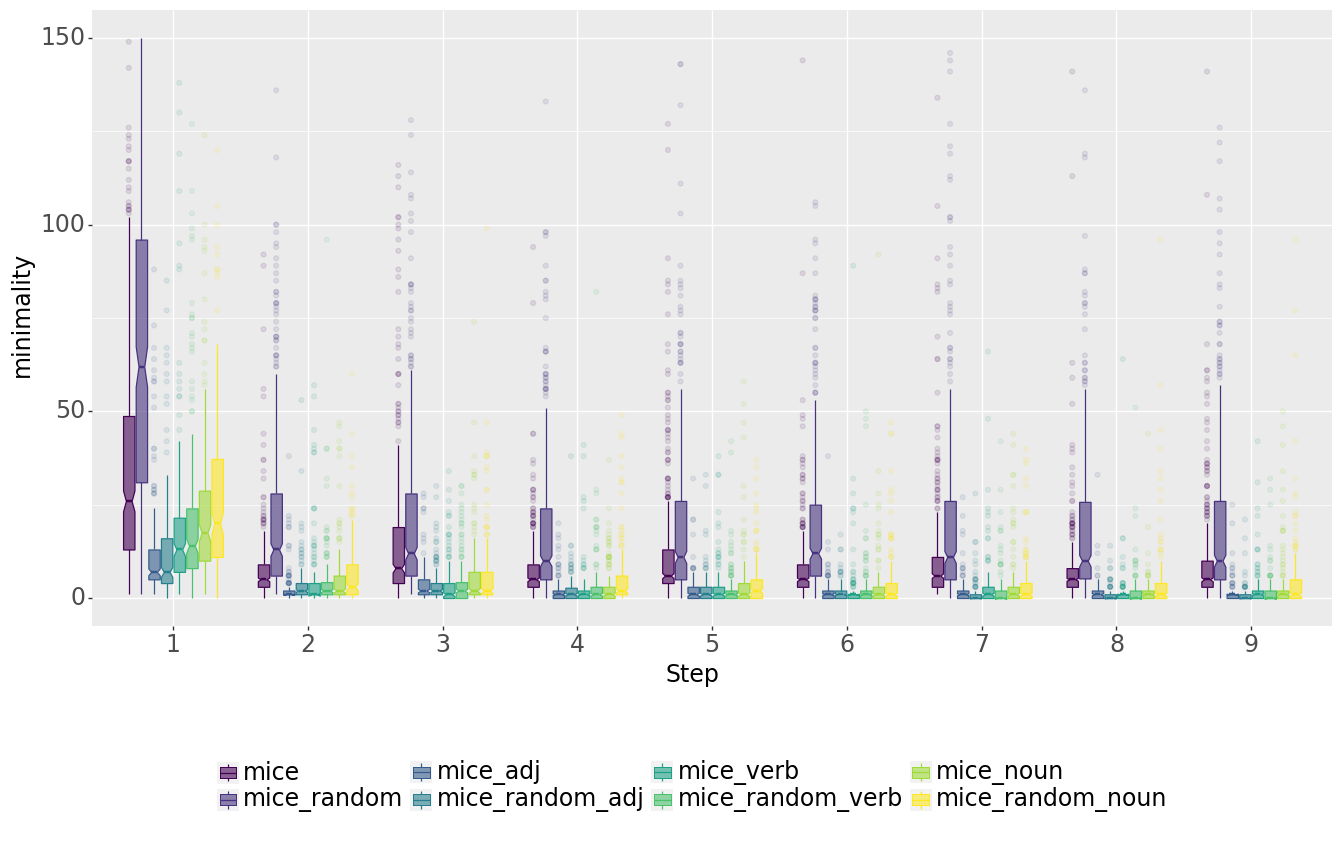

In [15]:
print (f"Minimality of {dataset}: ")

order_list = ["mice", "mice_random", "mice_adj", "mice_random_adj", "mice_verb", "mice_random_verb", "mice_noun", "mice_random_noun"]

df = to_ggplot([mice2, {k:v for k, v in mice.items() if k < 10}, {k:v for k, v in mice_adj_not.items() if k < 10}, {k:v for k, v in mice_adj.items() if k < 10}, {k:v for k, v in mice_verb_not.items() if k < 10}, {k:v for k, v in mice_verb.items() if k < 10}, {k:v for k, v in mice_noun_not.items() if k < 10}, {k:v for k, v in mice_noun.items() if k < 10}], order_list, metric)

df['Editor'] = pd.Categorical(df['Editor'], categories=order_list, ordered=True)

gg = ggplot(df) + aes(x="Step", y= metric, color='Editor', fill ="Editor") + geom_boxplot(notch=True, outlier_alpha = 0.1, alpha = 0.6)+ylim(0, 150)+theme(legend_direction='horizontal', legend_position=(.5, -.09), legend_title=element_blank(), text = element_text(size = 17))+ theme(figure_size=(16, 8))
print (gg)

### Mice vs Mice with POS tag

Minimality of imdb: 


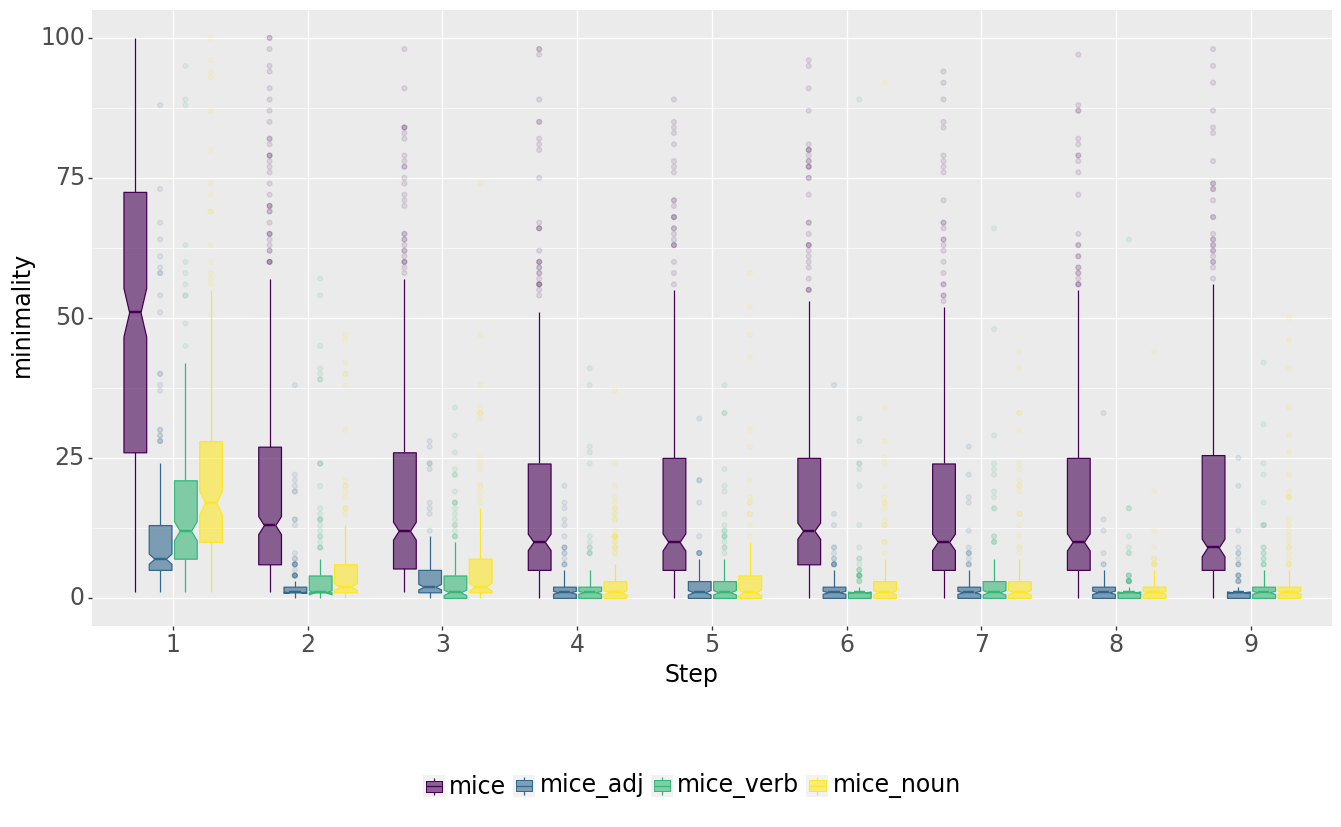

In [16]:
metric = "minimality"
dataset = "imdb"    

print (f"Minimality of {dataset}: ")

order_list = ["mice", "mice_adj", "mice_verb", "mice_noun"]

df = to_ggplot([mice, {k:v for k, v in mice_adj_not.items() if k < 10}, {k:v for k, v in mice_verb_not.items() if k < 10}, {k:v for k, v in mice_noun_not.items() if k < 10}], order_list, metric)

df['Editor'] = pd.Categorical(df['Editor'], categories=order_list, ordered=True)

gg = ggplot(df) + aes(x="Step", y= metric, color='Editor', fill ="Editor") + geom_boxplot(notch=True, outlier_alpha = 0.1, alpha = 0.6)+ylim(0, 100)+theme(legend_direction='horizontal', legend_position=(.5, -.09), legend_title=element_blank(), text = element_text(size = 17))+ theme(figure_size=(16, 8))

print (gg)

### Polyjuice

In [17]:
polyjuice = dict(list(polyjuice.items())[:9])

Different than MiCE. Because Polyjuice cuts much of the text when it is not constrained by specific masking of words, so Polyjuice out of the box creates more minimal edits than the POS tag versions of Polyjuice. We see that this behaviour starts to deteriorate after the 6th feedback step, where all the editors have very similar results. 

Minimality of imdb: 


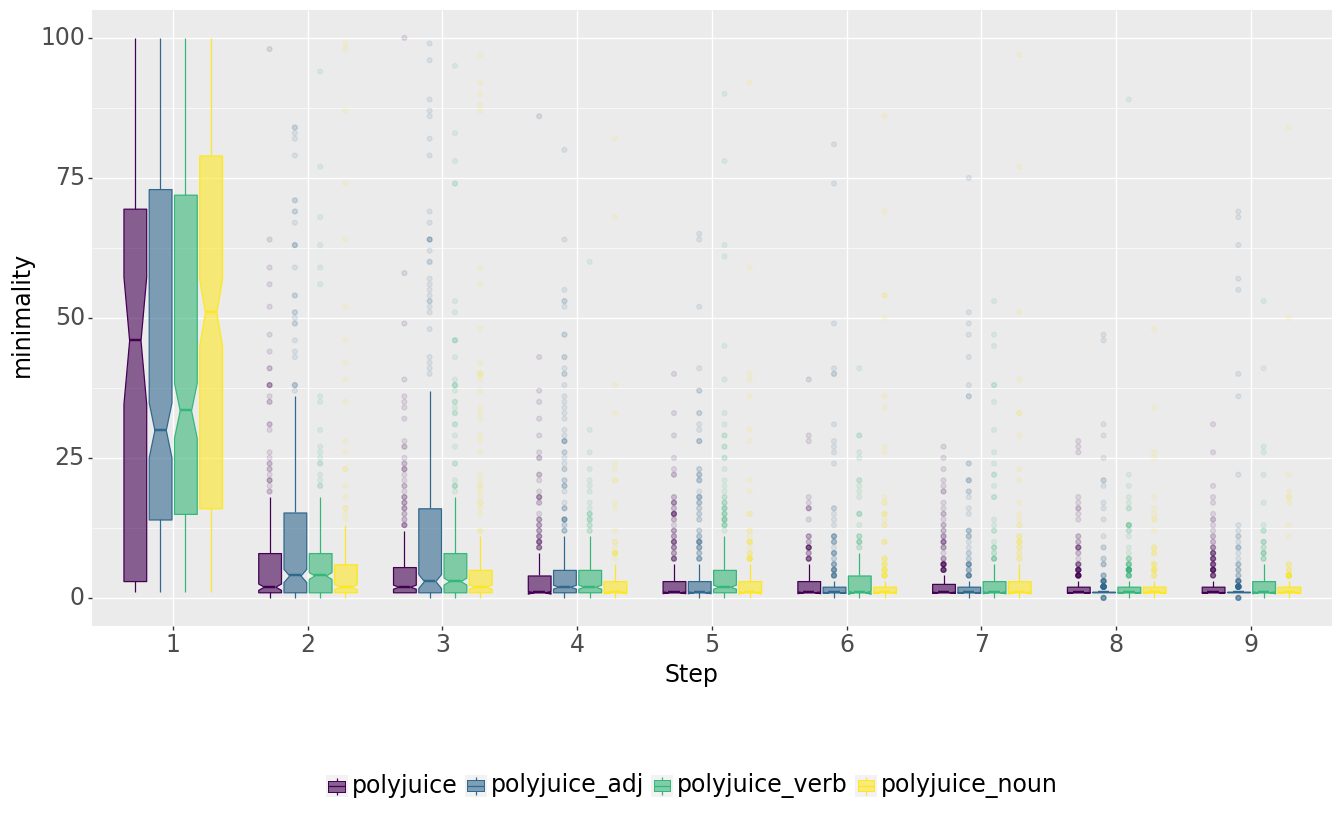

In [18]:
metric = "minimality"
dataset = "imdb"    

print (f"Minimality of {dataset}: ")

order_list = ["polyjuice", "polyjuice_adj", "polyjuice_verb", "polyjuice_noun"]

df = to_ggplot([polyjuice, {k:v for k, v in polyjuice_adj.items() if k < 10}, {k:v for k, v in polyjuice_verb.items() if k < 10}, {k:v for k, v in polyjuice_noun.items() if k < 10}], order_list, metric)

df['Editor'] = pd.Categorical(df['Editor'], categories=order_list, ordered=True)

gg = ggplot(df) + aes(x="Step", y= metric, color='Editor', fill ="Editor") + geom_boxplot(notch=True, outlier_alpha = 0.1, alpha = 0.6)+ylim(0, 100)+theme(legend_direction='horizontal', legend_position=(.5, -.09), legend_title=element_blank(), text = element_text(size = 17))+ theme(figure_size=(16, 8))

print (gg)

Minimality of imdb: 


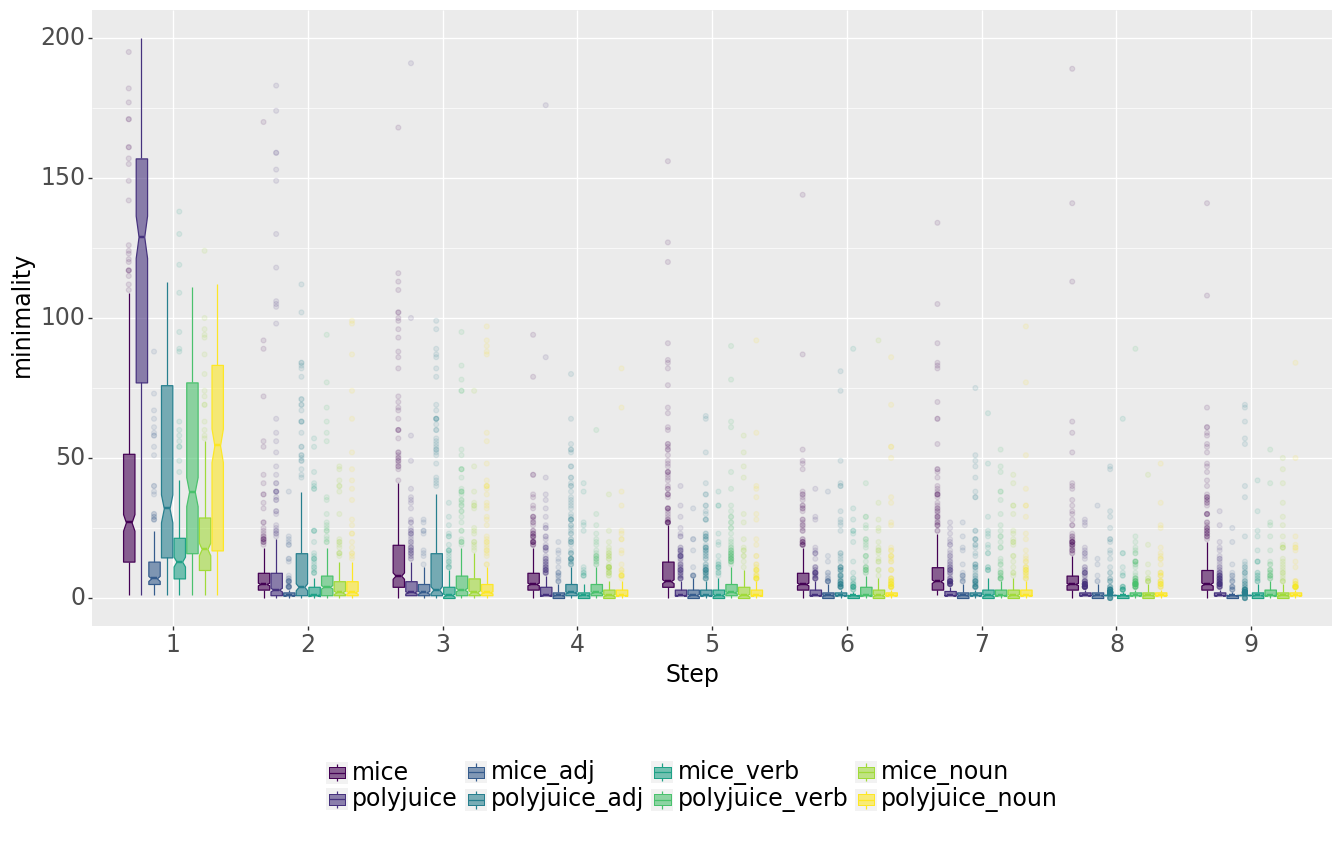

In [19]:
print (f"Minimality of {dataset}: ")

order_list = ["mice", "polyjuice", "mice_adj", "polyjuice_adj", "mice_verb", "polyjuice_verb", "mice_noun", "polyjuice_noun"]

df = to_ggplot([mice2, {k:v for k, v in polyjuice.items() if k < 10}, {k:v for k, v in mice_adj_not.items() if k < 10}, {k:v for k, v in polyjuice_adj.items() if k < 10}, {k:v for k, v in mice_verb_not.items() if k < 10}, {k:v for k, v in polyjuice_verb.items() if k < 10}, {k:v for k, v in mice_noun_not.items() if k < 10}, {k:v for k, v in polyjuice_noun.items() if k < 10}], order_list, metric)

df['Editor'] = pd.Categorical(df['Editor'], categories=order_list, ordered=True)

gg = ggplot(df) + aes(x="Step", y= metric, color='Editor', fill ="Editor") + geom_boxplot(notch=True, outlier_alpha = 0.1, alpha = 0.6)+ylim(0, 200)+theme(legend_direction='horizontal', legend_position=(.5, -.09), legend_title=element_blank(), text = element_text(size = 17))+ theme(figure_size=(16, 8))
print (gg)

Compare the four editors as they perform out of the box.

Minimality of imdb: 


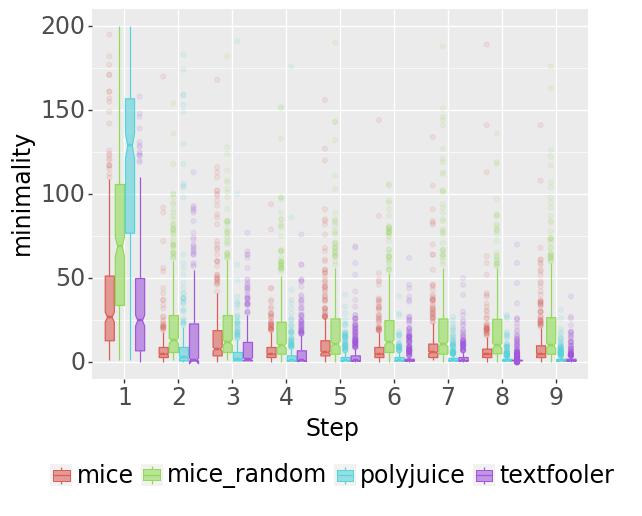

In [20]:
metric = "minimality"
dataset = "imdb"    

print (f"Minimality of {dataset}: ")

df = to_ggplot([mice2,  {k:v for k, v in mice.items() if k < 10},{k:v for k, v in polyjuice.items() if k < 10}, {k:v for k, v in textfooler.items() if k < 10}], ["mice", "mice_random", "polyjuice", "textfooler"], metric)

gg = ggplot(df) + aes(x="Step", y= metric, color='Editor', fill ="Editor") + geom_boxplot(notch=True,outlier_alpha = 0.1, alpha = 0.6)+ylim(0, 200)+theme(legend_direction='horizontal', legend_position=(.5, -.09), legend_title=element_blank(), text = element_text(size = 17))
print (gg)

### Textfooler

Minimality of imdb: 


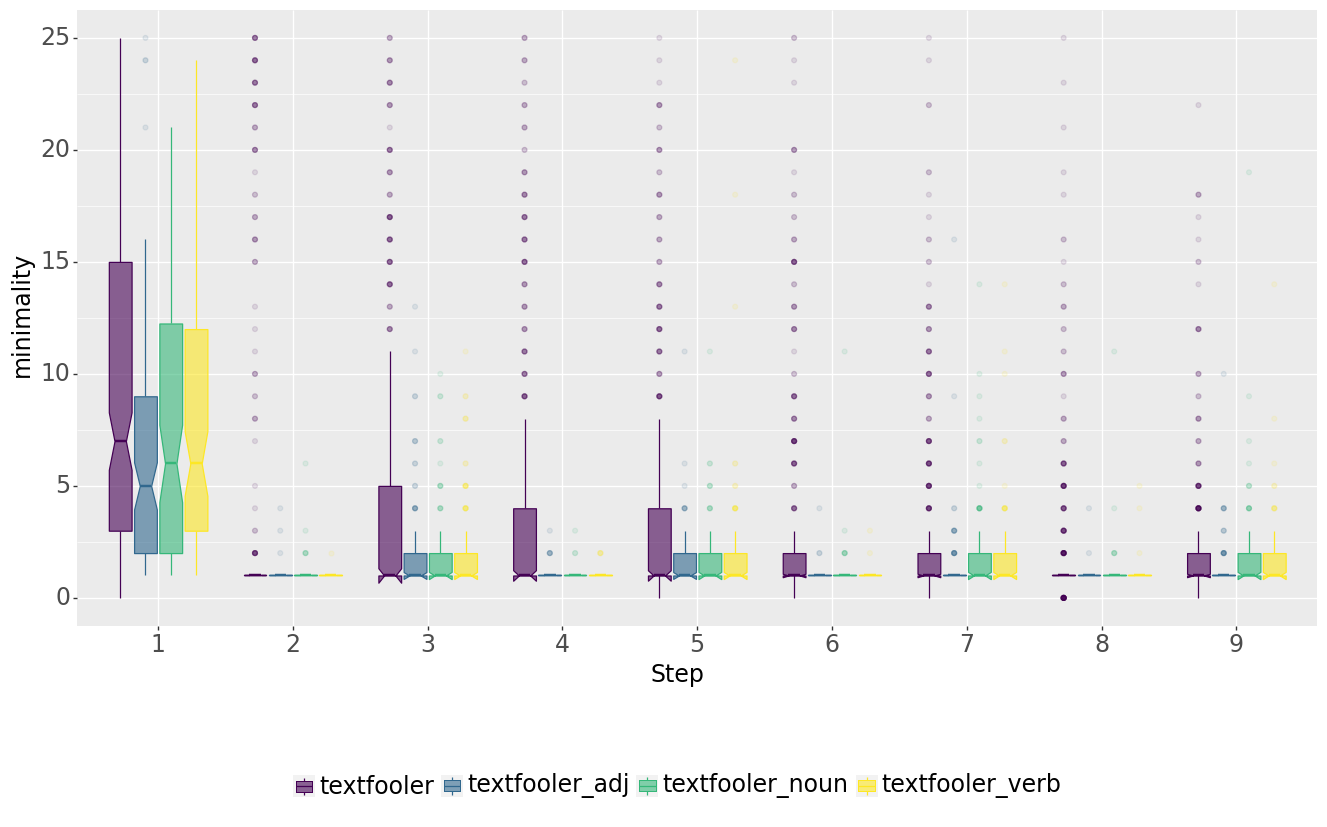

In [21]:
metric = "minimality"
dataset = "imdb"    
print (f"Minimality of {dataset}: ")

order_list = ["textfooler", "textfooler_adj", "textfooler_noun", "textfooler_verb"]

df = to_ggplot([textfooler, {k:v for k, v in textfooler_adj.items() if k < 10}, {k:v for k, v in textfooler_noun.items() if k < 10}, {k:v for k, v in textfooler_verb.items() if k < 10}], order_list, metric)

df['Editor'] = pd.Categorical(df['Editor'], categories=order_list, ordered=True)

gg = ggplot(df) + aes(x="Step", y= metric, color='Editor', fill ="Editor") + geom_boxplot(notch=True, outlier_alpha = 0.1, alpha = 0.6)+ylim(0, 25)+theme(legend_direction='horizontal', legend_position=(.5, -.09), legend_title=element_blank(), text = element_text(size = 17))+ theme(figure_size=(16, 8))
print (gg)

### Minimality table on IMDb

In [22]:
print ("Minimality Table")
print ("   Mice     MiCERand     MiceAdj    MiceRandAdj    MiceVerb    MiceRandVerb    MiceNoun    MiceRandNoun      Poly    PolyAdj    PolyVerb    PolyNoun    Textfooler    Textfooler Adj   Textfooler Noun   Textfooler Verb")
print ("----"*55)
    
print (f"                                                                 newsgroups                       ")
print ("----"*55)

df = to_ggplot([ mice2, {k:v for k, v in mice.items() if k < 10}, {k:v for k, v in mice_adj_not.items() if k < 10},  {k:v for k, v in mice_adj.items() if k < 10}, {k:v for k, v in mice_verb_not.items() if k < 10}, {k:v for k, v in mice_verb.items() if k < 10}, {k:v for k, v in mice_noun_not.items() if k < 10},  {k:v for k, v in mice_noun.items() if k < 10}, {k:v for k, v in polyjuice.items() if k < 10}, {k:v for k, v in polyjuice_adj.items() if k < 10}, {k:v for k, v in polyjuice_verb.items() if k < 10}, {k:v for k, v in polyjuice_noun.items() if k < 10}, {k:v for k, v in textfooler.items() if k < 10}, {k:v for k, v in textfooler_adj.items() if k < 10}, {k:v for k, v in textfooler_noun.items() if k < 10}, {k:v for k, v in textfooler_verb.items() if k < 10}], ["mice", "mice_random", "mice_adj", "mice_random_adj", "mice_verb", "mice_random_verb", "mice_noun", "mice_random_noun", "polyjuice", "polyjuice_adj", "polyjuice_verb", "polyjuice_noun", "textfooler","textfooler_adj","textfooler_noun","textfooler_verb"], metric)

mice_rows = dict()
rows_without = dict()
adj_rows = dict()
verb_rows = dict()  
noun_rows = dict()

for step in [1,3,5,7,9]:
    l_editor = np.mean(df[(df["Editor"] == "mice") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    m_editor = np.mean(df[(df["Editor"] == "mice_random") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    k_editor = np.mean(df[(df["Editor"] == "mice_adj") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    p_editor = np.mean(df[(df["Editor"] == "mice_random_adj") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    t_editor = np.mean(df[(df["Editor"] == "mice_random_verb") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    v_editor = np.mean(df[(df["Editor"] == "mice_verb") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    noun_editor = np.mean(df[(df["Editor"] == "mice_noun") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    rand_noun_editor = np.mean(df[(df["Editor"] == "mice_random_noun") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    polyjuice_editor = np.mean(df[(df["Editor"] == "polyjuice") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    polyjuice_adj_editor = np.mean(df[(df["Editor"] == "polyjuice_adj") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    polyjuice_verb_editor = np.mean(df[(df["Editor"] == "polyjuice_verb") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    polyjuice_noun_editor = np.mean(df[(df["Editor"] == "polyjuice_noun") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    textfooler_editor = np.mean(df[(df["Editor"] == "textfooler") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    textfooler_adj_editor = np.mean(df[(df["Editor"] == "textfooler_adj") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    textfooler_noun_editor = np.mean(df[(df["Editor"] == "textfooler_noun") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    textfooler_verb_editor = np.mean(df[(df["Editor"] == "textfooler_verb") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    
    m_editor = round(m_editor, 2)
    p_editor = round(p_editor, 2)
    t_editor = round(t_editor, 2)
    l_editor = round(l_editor, 2)
    k_editor = round(k_editor, 2)
    v_editor = round(v_editor, 2)
    noun_editor = round(noun_editor, 2)
    rand_noun_editor = round(rand_noun_editor, 2)
    polyjuice_editor = round(polyjuice_editor, 2)
    polyjuice_adj_editor = round(polyjuice_adj_editor, 2)
    polyjuice_noun_editor = round(polyjuice_noun_editor, 2)
    polyjuice_verb_editor = round(polyjuice_verb_editor, 2)
    textfooler_editor = round(textfooler_editor, 2)
    textfooler_adj_editor = round(textfooler_adj_editor, 2)
    textfooler_noun_editor = round(textfooler_noun_editor, 2)
    textfooler_verb_editor = round(textfooler_verb_editor, 2)
    rows_without[step-1] = [l_editor, m_editor, polyjuice_editor, textfooler_editor]
    mice_rows[step-1] = [k_editor, noun_editor, v_editor, p_editor, rand_noun_editor, t_editor, polyjuice_adj_editor, polyjuice_noun_editor, polyjuice_verb_editor, textfooler_adj_editor, textfooler_noun_editor, textfooler_verb_editor]
    adj_rows[step-1] = [k_editor, p_editor, polyjuice_adj_editor, textfooler_adj_editor]
    verb_rows[step-1] = [v_editor, t_editor, polyjuice_verb_editor, textfooler_verb_editor]
    noun_rows[step-1] = [noun_editor, rand_noun_editor, polyjuice_noun_editor, textfooler_noun_editor]
    print (f"inc@{step}↑: {l_editor}\t{m_editor}\t{k_editor}\t\t{p_editor}\t\t{v_editor}\t\t{t_editor}\t{noun_editor}\t\t{rand_noun_editor}\t\t{polyjuice_editor}\t{polyjuice_adj_editor}\t{polyjuice_verb_editor}\t\t{polyjuice_noun_editor}\t{textfooler_editor}\t\t{textfooler_adj_editor}\t\t{textfooler_noun_editor}\t\t{textfooler_verb_editor}")

print ("----"*55)

for step in [2,4,6,8]:
    l_editor = np.mean(df[(df["Editor"] == "mice") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    m_editor = np.mean(df[(df["Editor"] == "mice_random") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    k_editor = np.mean(df[(df["Editor"] == "mice_adj") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    p_editor = np.mean(df[(df["Editor"] == "mice_random_adj") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    t_editor = np.mean(df[(df["Editor"] == "mice_random_verb") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    v_editor = np.mean(df[(df["Editor"] == "mice_verb") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    noun_editor = np.mean(df[(df["Editor"] == "mice_noun") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    rand_noun_editor = np.mean(df[(df["Editor"] == "mice_random_noun") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    polyjuice_editor = np.mean(df[(df["Editor"] == "polyjuice") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    polyjuice_adj_editor = np.mean(df[(df["Editor"] == "polyjuice_adj") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    polyjuice_verb_editor = np.mean(df[(df["Editor"] == "polyjuice_verb") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    polyjuice_noun_editor = np.mean(df[(df["Editor"] == "polyjuice_noun") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    textfooler_editor = np.mean(df[(df["Editor"] == "textfooler") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    textfooler_adj_editor = np.mean(df[(df["Editor"] == "textfooler_adj") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    textfooler_noun_editor = np.mean(df[(df["Editor"] == "textfooler_noun") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    textfooler_verb_editor = np.mean(df[(df["Editor"] == "textfooler_verb") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])

    
    m_editor = round(m_editor, 2)
    p_editor = round(p_editor, 2)
    t_editor = round(t_editor, 2)
    l_editor = round(l_editor, 2)
    k_editor = round(k_editor, 2)
    v_editor = round(v_editor, 2)
    noun_editor = round(noun_editor, 2)
    rand_noun_editor = round(rand_noun_editor, 2)
    polyjuice_editor = round(polyjuice_editor, 2)
    polyjuice_adj_editor = round(polyjuice_adj_editor, 2)
    polyjuice_noun_editor = round(polyjuice_noun_editor, 2)
    polyjuice_verb_editor = round(polyjuice_verb_editor, 2)
    textfooler_editor = round(textfooler_editor, 2)
    textfooler_adj_editor = round(textfooler_adj_editor, 2)
    textfooler_noun_editor = round(textfooler_noun_editor, 2)
    textfooler_verb_editor = round(textfooler_verb_editor, 2)
    rows_without[step-1] = [l_editor, m_editor, polyjuice_editor, textfooler_editor]
    mice_rows[step-1] = [k_editor, noun_editor, v_editor, p_editor, rand_noun_editor, t_editor, polyjuice_adj_editor, polyjuice_noun_editor, polyjuice_verb_editor, textfooler_adj_editor, textfooler_noun_editor, textfooler_verb_editor]
    adj_rows[step-1] = [k_editor, p_editor, polyjuice_adj_editor, textfooler_adj_editor]
    verb_rows[step-1] = [v_editor, t_editor, polyjuice_verb_editor, textfooler_verb_editor]
    noun_rows[step-1] = [noun_editor, rand_noun_editor, polyjuice_noun_editor, textfooler_noun_editor]
    print (f"inc@{step}↑: {l_editor}\t{m_editor}\t{k_editor}\t\t{p_editor}\t\t{v_editor}\t\t{t_editor}\t{noun_editor}\t\t{rand_noun_editor}\t\t{polyjuice_editor}\t{polyjuice_adj_editor}\t{polyjuice_verb_editor}\t\t{polyjuice_noun_editor}\t{textfooler_editor}\t\t{textfooler_adj_editor}\t\t{textfooler_noun_editor}\t\t{textfooler_verb_editor}")

print ("----"*55)

Minimality Table
   Mice     MiCERand     MiceAdj    MiceRandAdj    MiceVerb    MiceRandVerb    MiceNoun    MiceRandNoun      Poly    PolyAdj    PolyVerb    PolyNoun    Textfooler    Textfooler Adj   Textfooler Noun   Textfooler Verb
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                 newsgroups                       
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inc@1↑: 41.78	87.31	12.16		12.43		19.54		22.21	24.45		27.57		167.86	44.29	46.59		52.86	33.4		6.33		10.28		9.5
inc@3↑: 22.11	43.48	6.37		6.51		9.59		10.47	11.94		13.49		62.83	23.15	21.21		22.84	18.26		3.18		4.48		4.26
inc@5↑: 

## Newsgroups

In [23]:
metric = "minimality"
dataset = "newsgroups"   

#For MiCE
mice2 = load_pickle(f"Metrics\Minimality\\newsgroups_mice_gradient_minimality.pickle")
mice = load_pickle(f"Metrics\Minimality\\newsgroups_mice_random_minimality.pickle")
mice_adj_not = load_pickle(f"Metrics\Minimality\\newsgroups_mice_grad_adj_new_minimality.pickle")
mice_adj = load_pickle(f"Metrics\Minimality\\newsgroups_mice_random_adj_minimality.pickle")
mice_verb = load_pickle(f"Metrics\Minimality\\newsgroups_mice_random_verb_minimality.pickle")
mice_verb_not = load_pickle(f"Metrics\Minimality\\newsgroups_mice_grad_verb_new_minimality.pickle")
mice_noun = load_pickle(f"Metrics\Minimality\\newsgroups_mice_random_noun_minimality.pickle")
mice_noun_not = load_pickle(f"Metrics\Minimality\\newsgroups_mice_grad_noun_new_minimality.pickle")

#For Polyjuice
polyjuice = load_pickle(f"Metrics\Minimality\\newsgroups_polyjuice_random_minimality.pickle")
polyjuice_adj = load_pickle(f"Metrics\Minimality\\newsgroups_polyjuice_new_adj_minimality.pickle")
polyjuice_noun = load_pickle(f"Metrics\Minimality\\newsgroups_polyjuice_new_noun_minimality.pickle")
polyjuice_verb = load_pickle(f"Metrics\Minimality\\newsgroups_polyjuice_new_verb_minimality.pickle")

#For Textfooler
textfooler = load_pickle(f"Metrics\Minimality\\newsgroups_textfooler_allennlp_minimality.pickle")
textfooler_adj = load_pickle(f"Metrics\Minimality\\newsgroups_textfooler_ADJ_minimality.pickle")
textfooler_noun = load_pickle(f"Metrics\Minimality\\newsgroups_textfooler_NOUN_minimality.pickle")
textfooler_verb = load_pickle(f"Metrics\Minimality\\newsgroups_textfooler_VERB_minimality.pickle")

#### Minimality table on Newsgroups

In [24]:
print ("Minimality Table")
print ("   Mice     MiCERand     MiceAdj    MiceRandAdj    MiceVerb    MiceRandVerb    MiceNoun    MiceRandNoun      Poly    PolyAdj    PolyVerb    PolyNoun    Textfooler    Textfooler Adj   Textfooler Noun   Textfooler Verb")
print ("----"*55)
    
print (f"                                                                 newsgroups                       ")
print ("----"*55)

df = to_ggplot([ mice2, {k:v for k, v in mice.items() if k < 10}, {k:v for k, v in mice_adj_not.items() if k < 10},  {k:v for k, v in mice_adj.items() if k < 10}, {k:v for k, v in mice_verb_not.items() if k < 10}, {k:v for k, v in mice_verb.items() if k < 10}, {k:v for k, v in mice_noun_not.items() if k < 10},  {k:v for k, v in mice_noun.items() if k < 10}, {k:v for k, v in polyjuice.items() if k < 10}, {k:v for k, v in polyjuice_adj.items() if k < 10}, {k:v for k, v in polyjuice_verb.items() if k < 10}, {k:v for k, v in polyjuice_noun.items() if k < 10}, {k:v for k, v in textfooler.items() if k < 10}, {k:v for k, v in textfooler_adj.items() if k < 10}, {k:v for k, v in textfooler_noun.items() if k < 10}, {k:v for k, v in textfooler_verb.items() if k < 10}], ["mice", "mice_random", "mice_adj", "mice_random_adj", "mice_verb", "mice_random_verb", "mice_noun", "mice_random_noun", "polyjuice", "polyjuice_adj", "polyjuice_verb", "polyjuice_noun", "textfooler","textfooler_adj","textfooler_noun","textfooler_verb"], metric)

mice_newsgroups_rows=dict()
newsgroups_without = dict()
newsgroups_adj_rows = dict()
newsgroups_verb_rows = dict()
newsgroups_noun_rows = dict()

for step in [1,3,5,7,9]:
    l_editor = np.mean(df[(df["Editor"] == "mice") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    m_editor = np.mean(df[(df["Editor"] == "mice_random") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    k_editor = np.mean(df[(df["Editor"] == "mice_adj") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    p_editor = np.mean(df[(df["Editor"] == "mice_random_adj") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    t_editor = np.mean(df[(df["Editor"] == "mice_random_verb") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    v_editor = np.mean(df[(df["Editor"] == "mice_verb") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    noun_editor = np.mean(df[(df["Editor"] == "mice_noun") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    rand_noun_editor = np.mean(df[(df["Editor"] == "mice_random_noun") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    polyjuice_editor = np.mean(df[(df["Editor"] == "polyjuice") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    polyjuice_adj_editor = np.mean(df[(df["Editor"] == "polyjuice_adj") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    polyjuice_verb_editor = np.mean(df[(df["Editor"] == "polyjuice_verb") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    polyjuice_noun_editor = np.mean(df[(df["Editor"] == "polyjuice_noun") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    textfooler_editor = np.mean(df[(df["Editor"] == "textfooler") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    textfooler_adj_editor = np.mean(df[(df["Editor"] == "textfooler_adj") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    textfooler_noun_editor = np.mean(df[(df["Editor"] == "textfooler_noun") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    textfooler_verb_editor = np.mean(df[(df["Editor"] == "textfooler_verb") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    
    m_editor = round(m_editor, 2)
    p_editor = round(p_editor, 2)
    t_editor = round(t_editor, 2)
    l_editor = round(l_editor, 2)
    k_editor = round(k_editor, 2)
    v_editor = round(v_editor, 2)
    noun_editor = round(noun_editor, 2)
    rand_noun_editor = round(rand_noun_editor, 2)
    polyjuice_editor = round(polyjuice_editor, 2)
    polyjuice_adj_editor = round(polyjuice_adj_editor, 2)
    polyjuice_noun_editor = round(polyjuice_noun_editor, 2)
    polyjuice_verb_editor = round(polyjuice_verb_editor, 2)
    textfooler_editor = round(textfooler_editor, 2)
    textfooler_adj_editor = round(textfooler_adj_editor, 2)
    textfooler_noun_editor = round(textfooler_noun_editor, 2)
    textfooler_verb_editor = round(textfooler_verb_editor, 2)
    newsgroups_without[step-1] = [l_editor, m_editor, polyjuice_editor, textfooler_editor]
    mice_newsgroups_rows[step-1] = [k_editor, noun_editor, v_editor, p_editor, rand_noun_editor, t_editor, polyjuice_adj_editor, polyjuice_noun_editor, polyjuice_verb_editor, textfooler_adj_editor, textfooler_noun_editor, textfooler_verb_editor]
    newsgroups_adj_rows[step-1] = [k_editor, p_editor, polyjuice_adj_editor, textfooler_adj_editor]
    newsgroups_verb_rows[step-1] = [v_editor, t_editor, polyjuice_verb_editor, textfooler_verb_editor]
    newsgroups_noun_rows[step-1] = [noun_editor, rand_noun_editor, polyjuice_noun_editor, textfooler_noun_editor]
    print (f"inc@{step}↑: {l_editor}\t{m_editor}\t{k_editor}\t\t{p_editor}\t\t{v_editor}\t\t{t_editor}\t{noun_editor}\t\t{rand_noun_editor}\t\t{polyjuice_editor}\t{polyjuice_adj_editor}\t{polyjuice_verb_editor}\t\t{polyjuice_noun_editor}\t{textfooler_editor}\t\t{textfooler_adj_editor}\t\t{textfooler_noun_editor}\t\t{textfooler_verb_editor}")

print ("----"*55)

for step in [2,4,6,8]:
    l_editor = np.mean(df[(df["Editor"] == "mice") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    m_editor = np.mean(df[(df["Editor"] == "mice_random") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    k_editor = np.mean(df[(df["Editor"] == "mice_adj") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    p_editor = np.mean(df[(df["Editor"] == "mice_random_adj") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    t_editor = np.mean(df[(df["Editor"] == "mice_random_verb") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    v_editor = np.mean(df[(df["Editor"] == "mice_verb") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    noun_editor = np.mean(df[(df["Editor"] == "mice_noun") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    rand_noun_editor = np.mean(df[(df["Editor"] == "mice_random_noun") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    polyjuice_editor = np.mean(df[(df["Editor"] == "polyjuice") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    polyjuice_adj_editor = np.mean(df[(df["Editor"] == "polyjuice_adj") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    polyjuice_verb_editor = np.mean(df[(df["Editor"] == "polyjuice_verb") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    polyjuice_noun_editor = np.mean(df[(df["Editor"] == "polyjuice_noun") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    textfooler_editor = np.mean(df[(df["Editor"] == "textfooler") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    textfooler_adj_editor = np.mean(df[(df["Editor"] == "textfooler_adj") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    textfooler_noun_editor = np.mean(df[(df["Editor"] == "textfooler_noun") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    textfooler_verb_editor = np.mean(df[(df["Editor"] == "textfooler_verb") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])

    
    m_editor = round(m_editor, 2)
    p_editor = round(p_editor, 2)
    t_editor = round(t_editor, 2)
    l_editor = round(l_editor, 2)
    k_editor = round(k_editor, 2)
    v_editor = round(v_editor, 2)
    noun_editor = round(noun_editor, 2)
    rand_noun_editor = round(rand_noun_editor, 2)
    polyjuice_editor = round(polyjuice_editor, 2)
    polyjuice_adj_editor = round(polyjuice_adj_editor, 2)
    polyjuice_noun_editor = round(polyjuice_noun_editor, 2)
    polyjuice_verb_editor = round(polyjuice_verb_editor, 2)
    textfooler_editor = round(textfooler_editor, 2)
    textfooler_adj_editor = round(textfooler_adj_editor, 2)
    textfooler_noun_editor = round(textfooler_noun_editor, 2)
    textfooler_verb_editor = round(textfooler_verb_editor, 2)
    newsgroups_without[step-1] = [l_editor, m_editor, polyjuice_editor, textfooler_editor]
    mice_newsgroups_rows[step-1] = [k_editor, noun_editor, v_editor, p_editor, rand_noun_editor, t_editor, polyjuice_adj_editor, polyjuice_noun_editor, polyjuice_verb_editor, textfooler_adj_editor, textfooler_noun_editor, textfooler_verb_editor]
    newsgroups_adj_rows[step-1] = [k_editor, p_editor, polyjuice_adj_editor, textfooler_adj_editor]
    newsgroups_verb_rows[step-1] = [v_editor, t_editor, polyjuice_verb_editor, textfooler_verb_editor]
    newsgroups_noun_rows[step-1] = [noun_editor, rand_noun_editor, polyjuice_noun_editor, textfooler_noun_editor]
    print (f"inc@{step}↑: {l_editor}\t{m_editor}\t{k_editor}\t\t{p_editor}\t\t{v_editor}\t\t{t_editor}\t{noun_editor}\t\t{rand_noun_editor}\t\t{polyjuice_editor}\t{polyjuice_adj_editor}\t{polyjuice_verb_editor}\t\t{polyjuice_noun_editor}\t{textfooler_editor}\t\t{textfooler_adj_editor}\t\t{textfooler_noun_editor}\t\t{textfooler_verb_editor}")

print ("----"*55)

Minimality Table
   Mice     MiCERand     MiceAdj    MiceRandAdj    MiceVerb    MiceRandVerb    MiceNoun    MiceRandNoun      Poly    PolyAdj    PolyVerb    PolyNoun    Textfooler    Textfooler Adj   Textfooler Noun   Textfooler Verb
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                 newsgroups                       
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inc@1↑: 11.78	26.48	3.27		3.0		5.07		5.18	4.59		4.95		38.71	30.55	23.55		20.51	7.03		1.81		2.84		2.58
inc@3↑: 7.57	16.79	2.14		1.88		2.84		2.98	3.08		3.05		28.5	16.79	12.74		11.25	3.26		1.39		1.78		1.66
inc@5↑: 6.51	14.39	1.6

In [25]:
latex1 = create_latex_table_without_pos("min", [], rows_without, newsgroups_without)
print(latex1)

\begin{table}[H]
\begin{adjustwidth}{0in}{0in}
  \centering
  \begin{tabular}{c|cccc}
    \hline
    \multicolumn{1}{c}{\multirow{2}{*}{}} & \multicolumn{4}{c}{\textbf{IMDb}} \\
    \cline{2-5}
    \multicolumn{1}{c}{} & \multicolumn{1}{c}{MiCE} & \multicolumn{1}{c}{MiCERandom} & \multicolumn{1}{c}{Polyjuice} & \multicolumn{1}{c}{TextFooler} \\
    \cline{2-5}
    \hline
\textbf{min@1↑} & 41.78  & 87.31  & 167.86  & \textbf{33.4}  \\
\textbf{min@2↑} & 24.91  & 54.43  & 90.95  & \textbf{23.23}  \\
\textbf{min@3↑} & 22.11  & 43.48  & 62.83  & \textbf{18.26}  \\
\textbf{min@5↑} & 17.42  & 33.83  & 39.41  & \textbf{13.13}  \\
\textbf{min@9↑} & 13.65  & 27.76  & 23.12  & \textbf{8.62}  \\
\hline
\multirow{1}{*}{\textbf{}} & \multicolumn{4}{c}{\textbf{NewsGroups}} \\ \cline{2-5}
\textbf{min@1↑} & 11.78  & 26.48  & 38.71  & \textbf{7.03}  \\
\textbf{min@2↑} & 8.22  & 19.07  & 32.5  & \textbf{4.04}  \\
\textbf{min@3↑} & 7.57  & 16.79  & 28.5  & \textbf{3.26}  \\
\textbf{min@5↑} & 6.51  & 14.39

In [26]:
latex = create_latex_table_for_pos("min", [], mice_rows, adj_rows, noun_rows, verb_rows, mice_newsgroups_rows, newsgroups_adj_rows, newsgroups_noun_rows, newsgroups_verb_rows)
print(latex)

\begin{table}[H]
\begin{adjustwidth}{-0.35in}{0in}
  \centering
  \begin{tabular}{c|ccc|ccc|ccc|ccc}
    \hline
    \multicolumn{1}{c}{\multirow{3}{*}{}} & \multicolumn{12}{c}{IMDb} \\
    \cline{2-13}
    \multicolumn{1}{c}{} & \multicolumn{3}{c|}{MiCE} & \multicolumn{3}{c|}{MiCERandom} & \multicolumn{3}{c|}{Polyjuice} & \multicolumn{3}{c}{TextFooler} \\
    \cline{2-13}
    \multicolumn{1}{c}{} & ADJ & NOUN & VERB & ADJ & NOUN & VERB & ADJ & NOUN & VERB & ADJ & NOUN & VERB \\
    \hline
\textbf{min@1↑} & 12.16  & 24.45  & 19.54  & 12.43  & 27.57  & 22.21  & \textbf{44.29}  & \textbf{52.86}  & \textbf{46.59}  & 6.33  & 10.28  & 9.5  \\
\textbf{min@2↑} & 7.61  & 15.02  & 12.33  & 8.07  & 17.11  & 13.5  & \textbf{28.46}  & \textbf{30.31}  & \textbf{27.45}  & 3.69  & 5.7  & 5.25  \\
\textbf{min@3↑} & 6.37  & 11.94  & 9.59  & 6.51  & 13.49  & 10.47  & \textbf{23.15}  & \textbf{22.84}  & \textbf{21.21}  & 3.18  & 4.48  & 4.26  \\
\textbf{min@5↑} & 4.85  & 8.76  & 7.0  & 4.83  & 10.0  & 7.4

Minimality of newsgroups: 


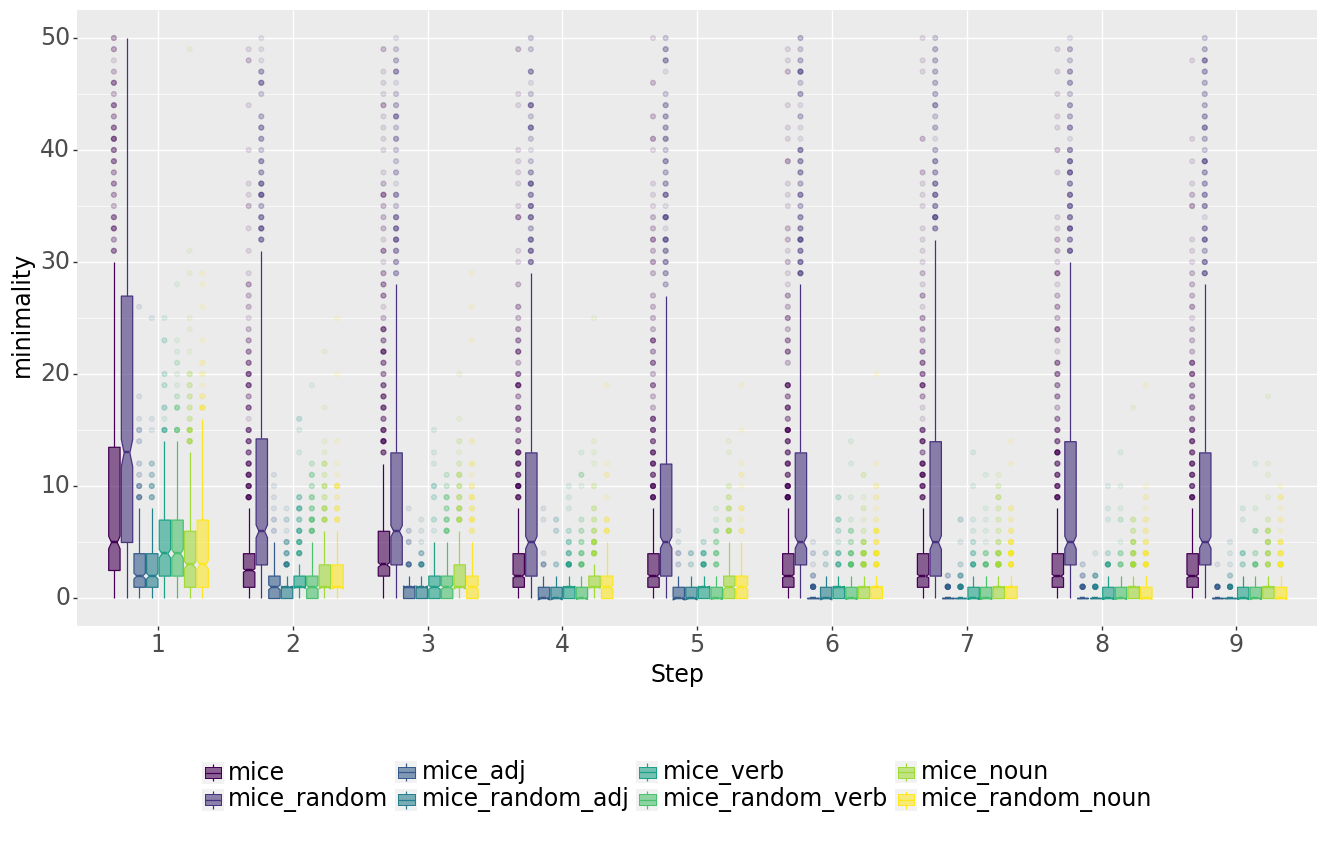

In [27]:
print (f"Minimality of {dataset}: ")

order_list = ["mice", "mice_random", "mice_adj", "mice_random_adj", "mice_verb", "mice_random_verb", "mice_noun", "mice_random_noun"]

df = to_ggplot([mice2, {k:v for k, v in mice.items() if k < 10}, {k:v for k, v in mice_adj_not.items() if k < 10}, {k:v for k, v in mice_adj.items() if k < 10}, {k:v for k, v in mice_verb_not.items() if k < 10}, {k:v for k, v in mice_verb.items() if k < 10}, {k:v for k, v in mice_noun_not.items() if k < 10}, {k:v for k, v in mice_noun.items() if k < 10}], order_list, metric)

df['Editor'] = pd.Categorical(df['Editor'], categories=order_list, ordered=True)

gg = ggplot(df) + aes(x="Step", y= metric, color='Editor', fill ="Editor") + geom_boxplot(notch=True, outlier_alpha = 0.1, alpha = 0.6)+ylim(0, 50)+theme(legend_direction='horizontal', legend_position=(.5, -.09), legend_title=element_blank(), text = element_text(size = 17))+ theme(figure_size=(16, 8))
print (gg)

Minimality of imdb: 


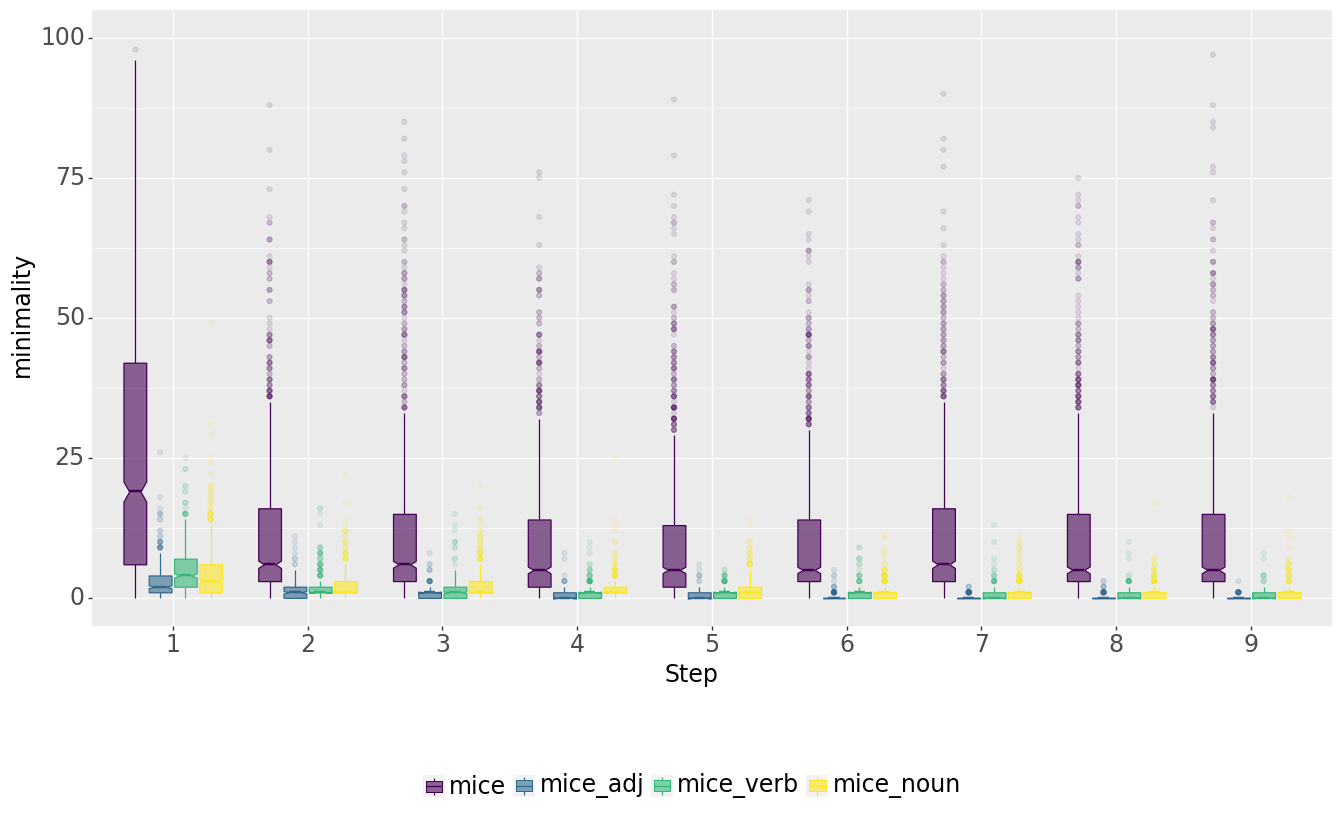

In [28]:
metric = "minimality"
dataset = "imdb"    

print (f"Minimality of {dataset}: ")

order_list = ["mice", "mice_adj", "mice_verb", "mice_noun"]

df = to_ggplot([mice, {k:v for k, v in mice_adj_not.items() if k < 10}, {k:v for k, v in mice_verb_not.items() if k < 10}, {k:v for k, v in mice_noun_not.items() if k < 10}], order_list, metric)

df['Editor'] = pd.Categorical(df['Editor'], categories=order_list, ordered=True)

gg = ggplot(df) + aes(x="Step", y= metric, color='Editor', fill ="Editor") + geom_boxplot(notch=True, outlier_alpha = 0.1, alpha = 0.6)+ylim(0, 100)+theme(legend_direction='horizontal', legend_position=(.5, -.09), legend_title=element_blank(), text = element_text(size = 17))+ theme(figure_size=(16, 8))

print (gg)

Minimality of newsgroups: 


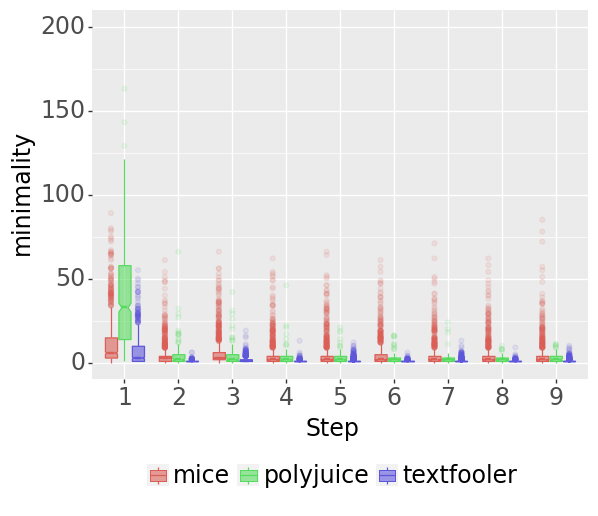

In [29]:
#Compare the three editors as they perform out of the box.
metric = "minimality"
dataset = "newsgroups"    

print (f"Minimality of {dataset}: ")

df = to_ggplot([mice2,  {k:v for k, v in polyjuice.items() if k < 10}, {k:v for k, v in textfooler.items() if k < 10}], ["mice", "polyjuice", "textfooler"], metric)

gg = ggplot(df) + aes(x="Step", y= metric, color='Editor', fill ="Editor") + geom_boxplot(notch=True,outlier_alpha = 0.1, alpha = 0.6)+ylim(0, 200)+theme(legend_direction='horizontal', legend_position=(.5, -.09), legend_title=element_blank(), text = element_text(size = 17))
print (gg)

#### Polyjuice

Minimality of newsgroups: 


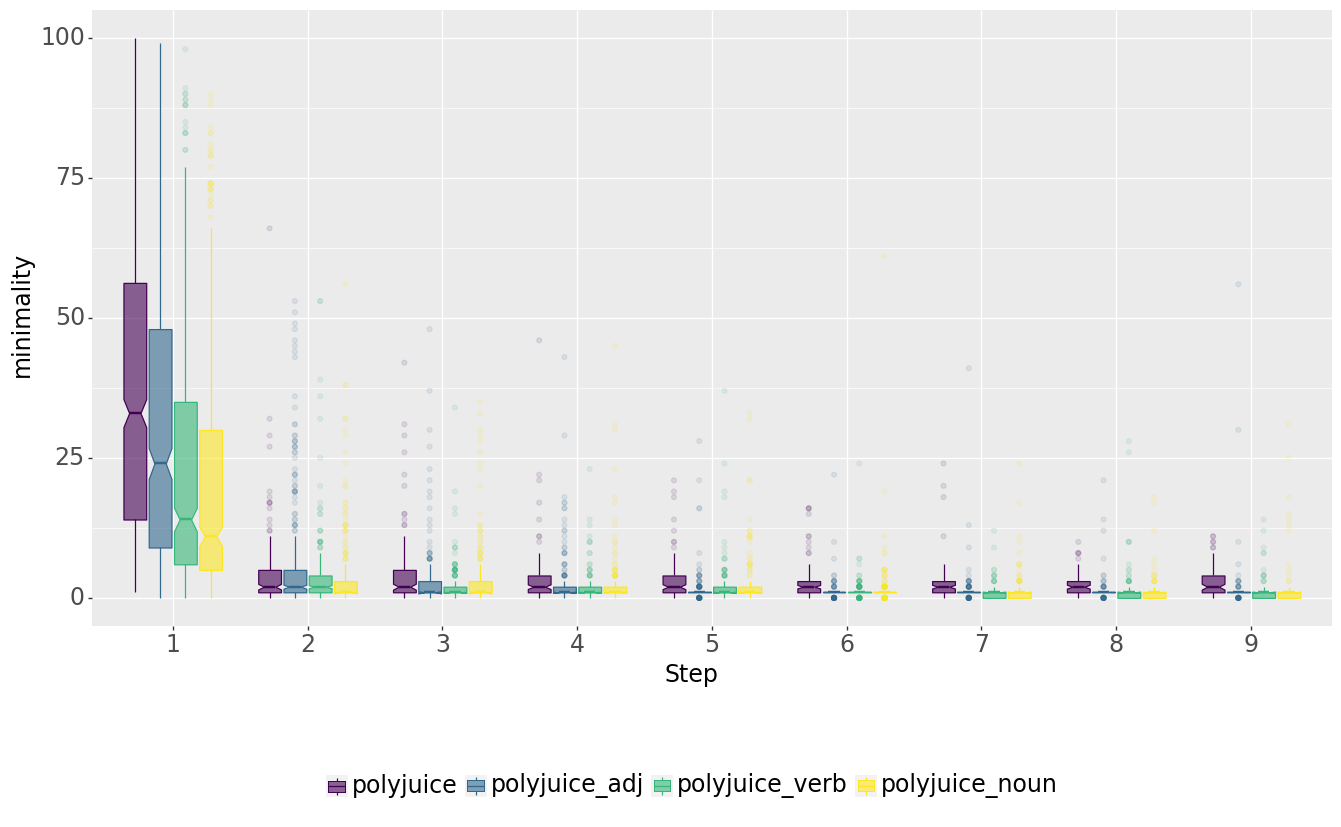

In [30]:
metric = "minimality"
dataset = "newsgroups"    

print (f"Minimality of {dataset}: ")

order_list = ["polyjuice", "polyjuice_adj", "polyjuice_verb", "polyjuice_noun"]

df = to_ggplot([polyjuice, {k:v for k, v in polyjuice_adj.items() if k < 10}, {k:v for k, v in polyjuice_verb.items() if k < 10}, {k:v for k, v in polyjuice_noun.items() if k < 10}], order_list, metric)

df['Editor'] = pd.Categorical(df['Editor'], categories=order_list, ordered=True)

gg = ggplot(df) + aes(x="Step", y= metric, color='Editor', fill ="Editor") + geom_boxplot(notch=True, outlier_alpha = 0.1, alpha = 0.6)+ylim(0, 100)+theme(legend_direction='horizontal', legend_position=(.5, -.09), legend_title=element_blank(), text = element_text(size = 17))+ theme(figure_size=(16, 8))

print (gg)

### Textfooler

Minimality of newsgroups: 


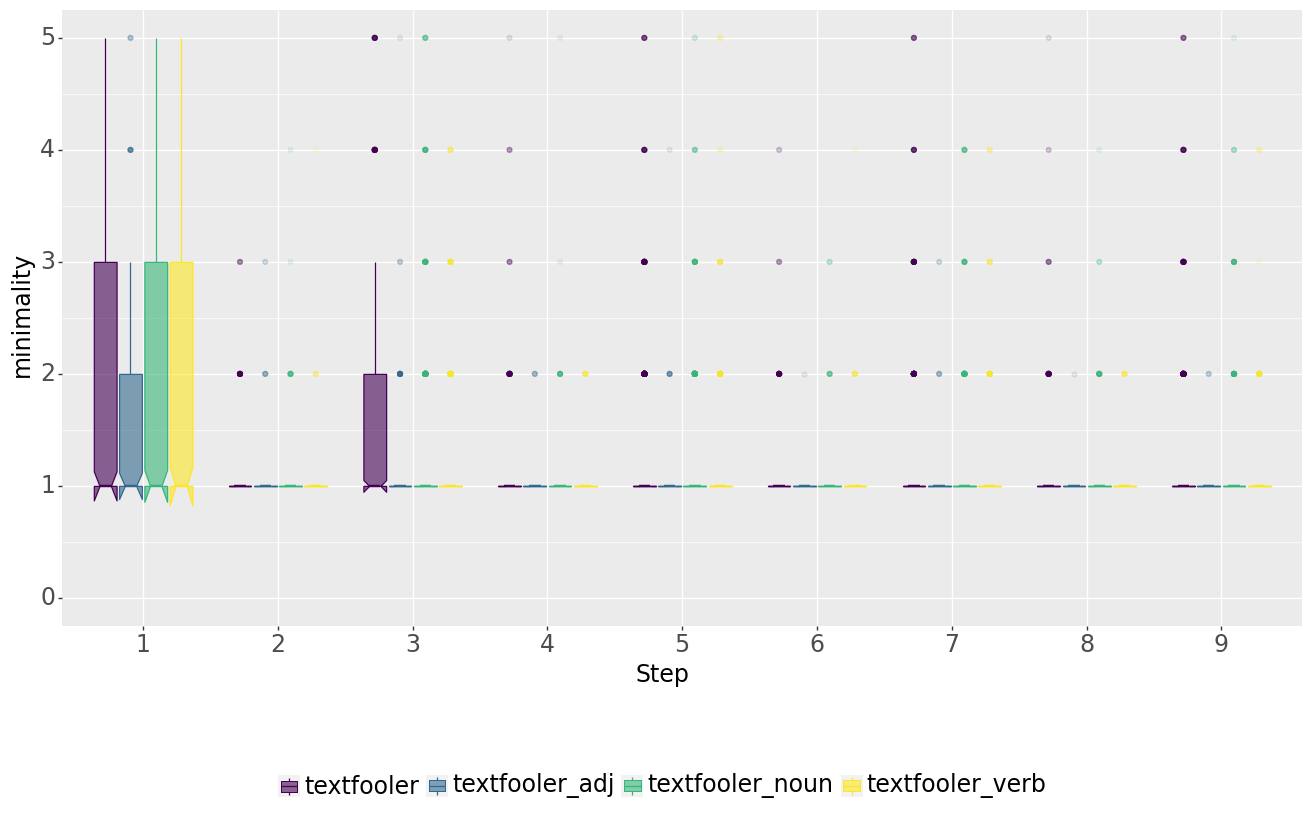

In [31]:
metric = "minimality"
dataset = "newsgroups"    
print (f"Minimality of {dataset}: ")

order_list = ["textfooler", "textfooler_adj", "textfooler_noun", "textfooler_verb"]

df = to_ggplot([textfooler, {k:v for k, v in textfooler_adj.items() if k < 10}, {k:v for k, v in textfooler_noun.items() if k < 10}, {k:v for k, v in textfooler_verb.items() if k < 10}], order_list, metric)

df['Editor'] = pd.Categorical(df['Editor'], categories=order_list, ordered=True)

gg = ggplot(df) + aes(x="Step", y= metric, color='Editor', fill ="Editor") + geom_boxplot(notch=True, outlier_alpha = 0.1, alpha = 0.6)+ylim(0, 5)+theme(legend_direction='horizontal', legend_position=(.5, -.09), legend_title=element_blank(), text = element_text(size = 17))+ theme(figure_size=(16, 8))
print (gg)

## Beam search and multinomial sampling

In [32]:
mice2 = load_pickle(f"Metrics\Minimality\\imdb_mice_minimality.pickle")
mice_sample5 = load_pickle(f"Metrics\Minimality\\imdb_mice_sample5_minimality.pickle")
mice_greedy = load_pickle(f"Metrics\Minimality\\imdb_mice_greedy_minimality.pickle")
mice_beam5 = load_pickle(f"Metrics\Minimality\\imdb_mice_beam5_minimality.pickle")
mice_beam15 = load_pickle(f"Metrics\Minimality\\imdb_mice_beam15_minimality.pickle")
mice_beam30 = load_pickle(f"Metrics\Minimality\\imdb_mice_beam30_minimality.pickle")
mice_beam60 = load_pickle(f"Metrics\Minimality\\imdb_mice_beam60_minimality.pickle")
mice_beam120 = load_pickle(f"Metrics\Minimality\\imdb_mice_beam120_clean_minimality.pickle")

The authors of MiCE use multinomial sampling with one beam. We also explore how a different number of beams in beam search and multinomial sampling affect the minimality of the edits.
Also, for beam search we generally observe a decrease in minimality as the number of beams increases, thus more minimal edits and edits closer to the original text.

Difference of minimality of imdb with different beams: 


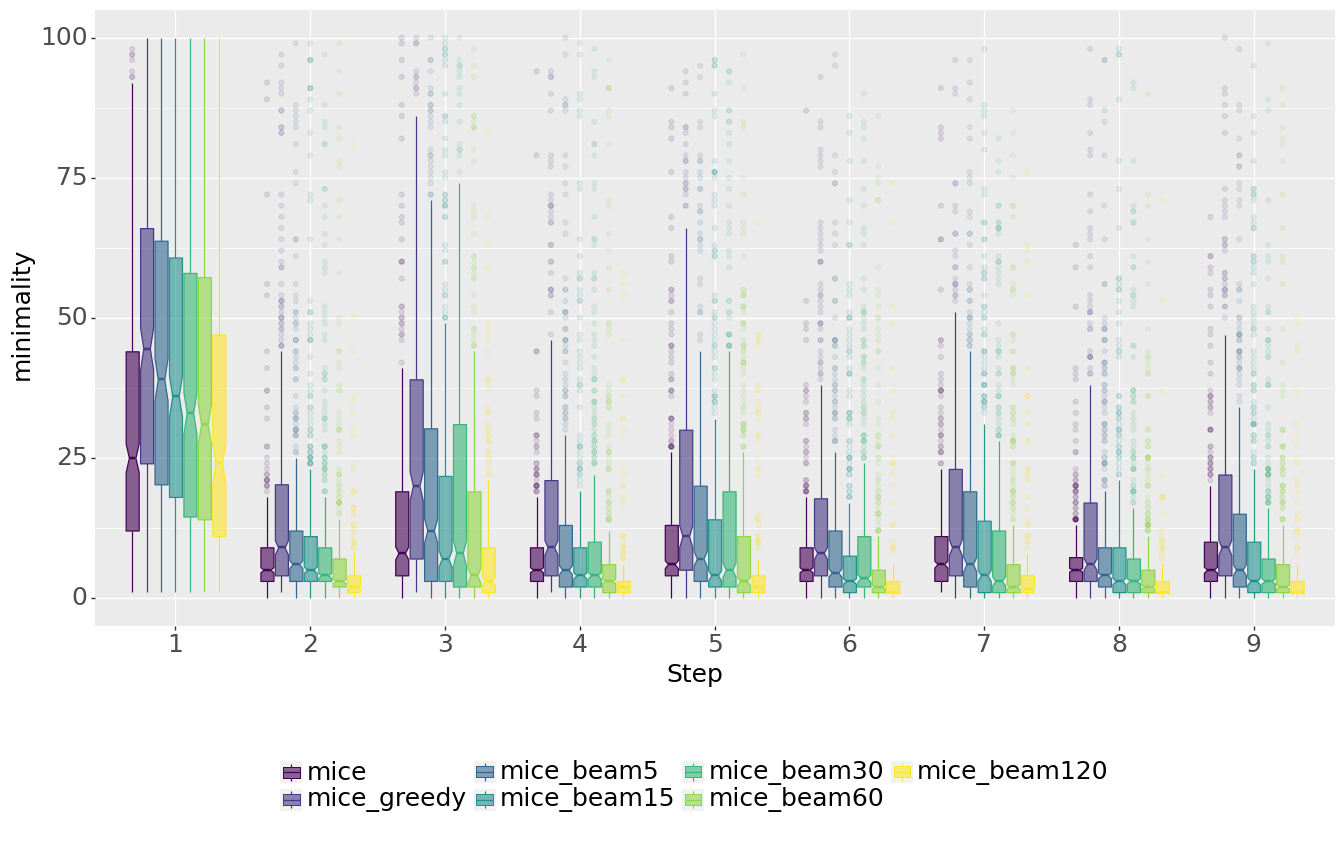

In [33]:
metric = "minimality"
dataset = "imdb"

print (f"Difference of minimality of {dataset} with different beams: ")

order_list = ["mice", "mice_greedy", "mice_beam5", "mice_beam15", "mice_beam30",  "mice_beam60", "mice_beam120"]

df = to_ggplot([mice2, {k:v for k, v in mice_greedy.items() if k < 10}, {k:v for k, v in mice_beam5.items() if k < 10}, {k:v for k, v in mice_beam15.items() if k < 10}, {k:v for k, v in mice_beam30.items() if k < 10}, {k:v for k, v in mice_beam60.items() if k < 10}, {k:v for k, v in mice_beam120.items() if k < 10}], order_list, metric)

df['Editor'] = pd.Categorical(df['Editor'], categories=order_list, ordered=True)

gg = ggplot(df) + aes(x="Step", y= metric, color='Editor', fill ="Editor") + geom_boxplot(notch=True, outlier_alpha = 0.1, alpha = 0.6)+ylim(0,100)+theme(legend_direction='horizontal', legend_position=(.5, -.09), legend_title=element_blank(), text = element_text(size = 18)) + theme(figure_size=(16, 8))
print (gg)

In [34]:
metric="minimality"

print ("Minimality Table For MiCE with Beam Search")
print ("       Mice     MiCE Sample5      MiCE Greedy      Mice Beam5     Mice Beam15     Mice Beam30       Mice Beam60    Mice Beam120")
print ("----"*35)
    
print (f"                                                     imdb ")
print ("----"*35)

df = to_ggplot([ mice2, {k:v for k, v in mice_sample5.items() if k < 10}, {k:v for k, v in mice_greedy.items() if k < 10}, {k:v for k, v in mice_beam5.items() if k < 10},  {k:v for k, v in mice_beam15.items() if k < 10}, {k:v for k, v in mice_beam30.items() if k < 10}, {k:v for k, v in mice_beam60.items() if k < 10}, {k:v for k, v in mice_beam120.items() if k < 10}], ["mice", "mice_sample5", "mice_greedy", "mice_beam5", "mice_beam15", "mice_beam30",  "mice_beam60", "mice_beam120"], metric)

rows_beam=dict()

for step in [1,3,5,7,9]:
    l_editor = np.mean(df[(df["Editor"] == "mice") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    m_editor = np.mean(df[(df["Editor"] == "mice_sample5") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    k_editor = np.mean(df[(df["Editor"] == "mice_greedy") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    p_editor = np.mean(df[(df["Editor"] == "mice_beam5") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    v_editor = np.mean(df[(df["Editor"] == "mice_beam15") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    t_editor = np.mean(df[(df["Editor"] == "mice_beam30") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    a120_editor = np.mean(df[(df["Editor"] == "mice_beam120") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    mice_beam60_editor = np.mean(df[(df["Editor"] == "mice_beam60") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    
    l_editor = round(l_editor, 2)
    m_editor = round(m_editor, 2)
    k_editor = round(k_editor, 2)
    p_editor = round(p_editor, 2)
    v_editor = round(v_editor, 2)
    t_editor = round(t_editor, 2)
    a120_editor = round(a120_editor, 2)
    mice_beam60_editor = round(mice_beam60_editor, 2)
    rows_beam[step-1] = [l_editor, k_editor, p_editor, v_editor, t_editor, mice_beam60_editor, a120_editor]
    print (f"min@{step}↑: {l_editor}\t\t{m_editor}\t\t{k_editor}\t\t{p_editor}\t\t{v_editor}\t\t{t_editor}\t\t{mice_beam60_editor}\t\t{a120_editor}")

print ("----"*35)

for step in [2,4,6,8]:
    l_editor = np.mean(df[(df["Editor"] == "mice") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    m_editor = np.mean(df[(df["Editor"] == "mice_sample5") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    k_editor = np.mean(df[(df["Editor"] == "mice_greedy") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    p_editor = np.mean(df[(df["Editor"] == "mice_beam5") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    v_editor = np.mean(df[(df["Editor"] == "mice_beam15") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    t_editor = np.mean(df[(df["Editor"] == "mice_beam30") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    mice_beam60_editor = np.mean(df[(df["Editor"] == "mice_beam60") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    a120_editor = np.mean(df[(df["Editor"] == "mice_beam120") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    
    l_editor = round(l_editor, 2)
    m_editor = round(m_editor, 2)
    k_editor = round(k_editor, 2)
    p_editor = round(p_editor, 2)
    v_editor = round(v_editor, 2)
    t_editor = round(t_editor, 2)
    mice_beam60_editor = round(mice_beam60_editor, 2)
    a120_editor = round(a120_editor, 2)
    rows_beam[step-1] = [l_editor, k_editor, p_editor, v_editor, t_editor, mice_beam60_editor, a120_editor]
    print (f"min@{step}↑: {l_editor}\t\t{m_editor}\t\t{k_editor}\t\t{p_editor}\t\t{v_editor}\t\t{t_editor}\t\t{mice_beam60_editor}\t\t{a120_editor}")

print ("----"*35)

Minimality Table For MiCE with Beam Search
       Mice     MiCE Sample5      MiCE Greedy      Mice Beam5     Mice Beam15     Mice Beam30       Mice Beam60    Mice Beam120
--------------------------------------------------------------------------------------------------------------------------------------------
                                                     imdb 
--------------------------------------------------------------------------------------------------------------------------------------------
min@1↑: 41.78		61.0		76.61		71.32		65.75		63.32		53.77		34.4
min@3↑: 22.11		32.06		43.98		38.08		33.41		34.33		28.02		16.23
min@5↑: 17.42		24.8		34.95		28.8		25.52		26.14		20.96		11.99
min@7↑: 15.03		20.85		29.82		24.74		21.5		21.94		17.49		10.08
min@9↑: 13.65		18.41		26.66		21.8		19.21		19.16		15.18		8.75
--------------------------------------------------------------------------------------------------------------------------------------------
min@2↑: 24.91		35.91		48.55		43.8		39.1

After the experiments, we conclude that MiCE with beam search with 120 beams outperforms MiCE multinomial sampling with 1 beam in terms of minimality. In general, when using beam search with a higher number of beams, we observe that the minimality of the edits increases. However, we must mention that beam search with 120 beams requires approximately 100 hours for 10 feedback steps, while multinomial sampling with 1 beam requires approximately 25 hours for 10 feedback steps.

### For newsgroups

Difference of minimality of newsgroups with different beams: 


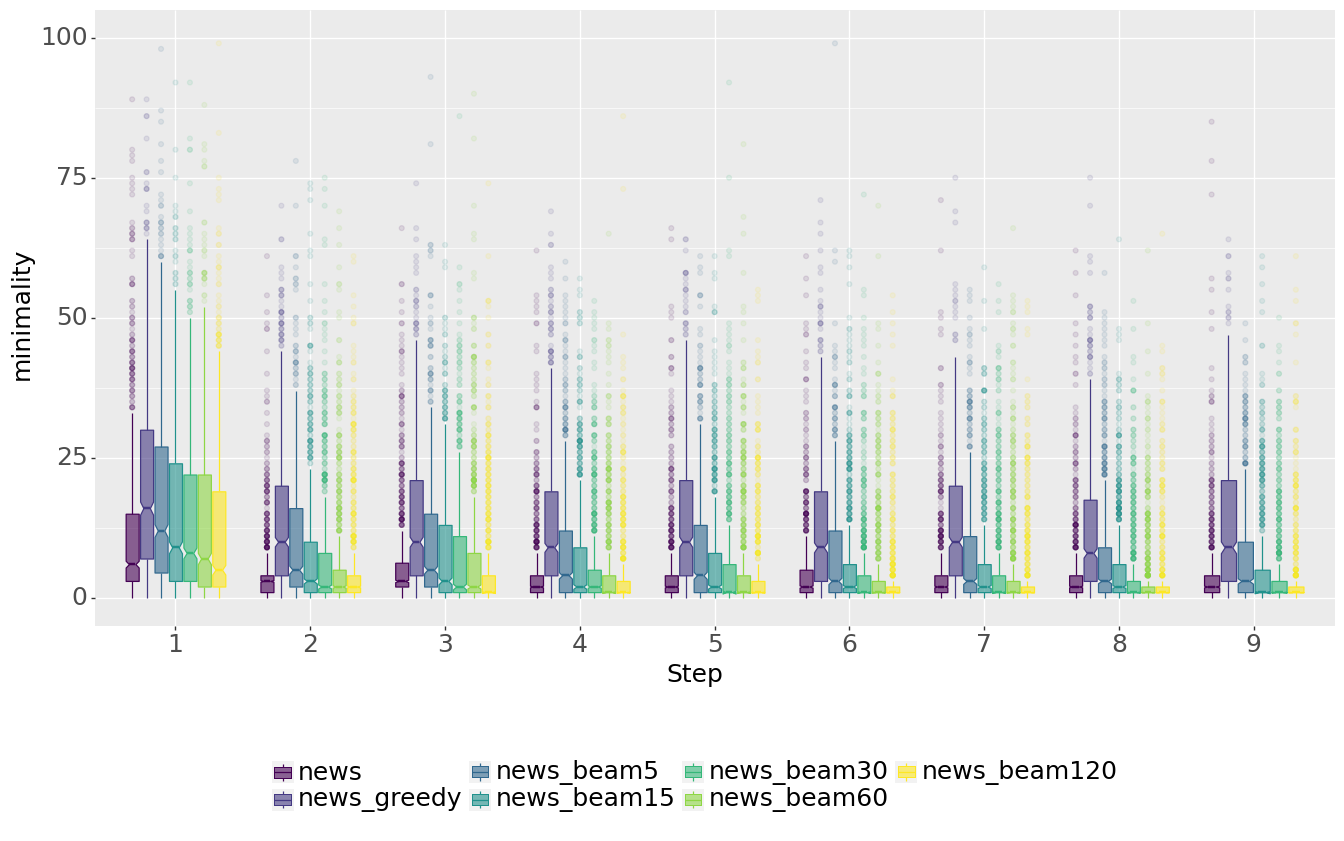

In [35]:
#news_sample5 = load_pickle(f"Metrics\Minimality\\newsgroups_news_sample5_minimality.pickle")
news2 = load_pickle(f"Metrics\Minimality\\newsgroups_mice_gradient_minimality.pickle")
news_greedy = load_pickle(f"Metrics\Minimality\\newsgroups_mice_greedy_minimality.pickle")
news_beam5 = load_pickle(f"Metrics\Minimality\\newsgroups_mice_beam5_minimality.pickle")
news_beam15 = load_pickle(f"Metrics\Minimality\\newsgroups_mice_beam15_minimality.pickle")
news_beam30 = load_pickle(f"Metrics\Minimality\\newsgroups_mice_beam30_minimality.pickle")
news_beam60 = load_pickle(f"Metrics\Minimality\\newsgroups_mice_beam60_minimality.pickle")
news_beam120 = load_pickle(f"Metrics\Minimality\\newsgroups_mice_beam120_minimality.pickle")

metric = "minimality"
dataset = "newsgroups"

print (f"Difference of minimality of {dataset} with different beams: ")

order_list = ["news", "news_greedy", "news_beam5", "news_beam15", "news_beam30",  "news_beam60", "news_beam120"]

df = to_ggplot([news2, {k:v for k, v in news_greedy.items() if k < 10}, {k:v for k, v in news_beam5.items() if k < 10}, {k:v for k, v in news_beam15.items() if k < 10}, {k:v for k, v in news_beam30.items() if k < 10}, {k:v for k, v in news_beam60.items() if k < 10}, {k:v for k, v in news_beam120.items() if k < 10}], order_list, metric)

df['Editor'] = pd.Categorical(df['Editor'], categories=order_list, ordered=True)

gg = ggplot(df) + aes(x="Step", y= metric, color='Editor', fill ="Editor") + geom_boxplot(notch=True, outlier_alpha = 0.1, alpha = 0.6)+ylim(0,100)+theme(legend_direction='horizontal', legend_position=(.5, -.09), legend_title=element_blank(), text = element_text(size = 18)) + theme(figure_size=(16, 8))
print (gg)

In [36]:
metric="minimality"

print ("Minimality Table For news with Beam Search")
print ("       news       news Greedy      news Beam5     news Beam15     news Beam30       news Beam60     news Beam120")
print ("----"*35)
    
print (f"                                                     newsgroups ")
print ("----"*35)

df = to_ggplot([ news2, {k:v for k, v in news_greedy.items() if k < 10}, {k:v for k, v in news_beam5.items() if k < 10},  {k:v for k, v in news_beam15.items() if k < 10}, {k:v for k, v in news_beam30.items() if k < 10}, {k:v for k, v in news_beam60.items() if k < 10}, {k:v for k, v in news_beam120.items() if k < 10}], ["news", "news_greedy", "news_beam5", "news_beam15", "news_beam30",  "news_beam60", "news_beam120"], metric)

beam_news_rows={}

for step in [1,3,5,7,9]:
    l_editor = np.mean(df[(df["Editor"] == "news") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    k_editor = np.mean(df[(df["Editor"] == "news_greedy") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    p_editor = np.mean(df[(df["Editor"] == "news_beam5") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    v_editor = np.mean(df[(df["Editor"] == "news_beam15") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    t_editor = np.mean(df[(df["Editor"] == "news_beam30") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    news_beam60_editor = np.mean(df[(df["Editor"] == "news_beam60") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    news_beam120_editor = np.mean(df[(df["Editor"] == "news_beam120") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    
    l_editor = round(l_editor, 2)
    k_editor = round(k_editor, 2)
    p_editor = round(p_editor, 2)
    v_editor = round(v_editor, 2)
    t_editor = round(t_editor, 2)
    news_beam60_editor = round(news_beam60_editor, 2)
    news_beam120_editor = round(news_beam120_editor, 2)
    beam_news_rows[step-1] = [l_editor, k_editor, p_editor, v_editor, t_editor, news_beam60_editor, news_beam120_editor]
    print (f"min@{step}↑: {l_editor}\t\t{k_editor}\t\t{p_editor}\t\t{v_editor}\t\t{t_editor}\t\t{news_beam60_editor}\t\t{news_beam120_editor}")

print ("----"*35)

for step in [2,4,6,8]:
    l_editor = np.mean(df[(df["Editor"] == "news") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    k_editor = np.mean(df[(df["Editor"] == "news_greedy") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    p_editor = np.mean(df[(df["Editor"] == "news_beam5") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    v_editor = np.mean(df[(df["Editor"] == "news_beam15") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    t_editor = np.mean(df[(df["Editor"] == "news_beam30") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    news_beam60_editor = np.mean(df[(df["Editor"] == "news_beam60") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    news_beam120_editor = np.mean(df[(df["Editor"] == "news_beam120") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    
    l_editor = round(l_editor, 2)
    k_editor = round(k_editor, 2)
    p_editor = round(p_editor, 2)
    v_editor = round(v_editor, 2)
    t_editor = round(t_editor, 2)
    news_beam60_editor = round(news_beam60_editor, 2)
    news_beam120_editor = round(news_beam120_editor, 2)
    beam_news_rows[step-1] = [l_editor, k_editor, p_editor, v_editor, t_editor, news_beam60_editor, news_beam120_editor]
    print (f"min@{step}↑: {l_editor}\t\t{k_editor}\t\t{p_editor}\t\t{v_editor}\t\t{t_editor}\t\t{news_beam60_editor}\t\t{news_beam120_editor}")

print ("----"*35)

Minimality Table For news with Beam Search
       news       news Greedy      news Beam5     news Beam15     news Beam30       news Beam60     news Beam120
--------------------------------------------------------------------------------------------------------------------------------------------
                                                     newsgroups 
--------------------------------------------------------------------------------------------------------------------------------------------
min@1↑: 11.78		20.45		17.48		15.53		14.4		13.93		12.59
min@3↑: 7.57		16.4		12.69		10.71		9.67		8.99		7.78
min@5↑: 6.51		15.37		11.12		9.16		8.09		7.48		6.33
min@7↑: 6.01		14.81		10.16		8.19		7.16		6.65		5.56
min@9↑: 5.71		14.44		9.49		7.54		6.52		6.28		5.05
--------------------------------------------------------------------------------------------------------------------------------------------
min@2↑: 8.22		17.34		13.97		11.85		10.7		9.91		8.93
min@4↑: 6.88		15.65		11.65		9.81		8.66		7.98		

In [37]:
names = ["MiCE", "Greedy", "5 beams", "15 beams", "30 beams",  "60 beams", "120 beams"]
latex = create_latex_table("min", names, rows_beam, beam_news_rows)
print(latex)

\begin{table}[H]
\begin{adjustwidth}{0in}{0in}
\centering
\begin{tabular}{c|ccccccc}
\hline
\multirow{1}{*}{\textbf{}} & \multicolumn{7}{c}{\textbf{IMDb}} \\ \cline{2-8}
& \textbf{MiCE} & \textbf{Greedy} & \textbf{5 beams} & \textbf{15 beams} & \textbf{30 beams} & \textbf{60 beams} & \textbf{120 beams} \\ \hline
\textbf{min@1↑} & 41.78  & \textbf{76.61}  & 71.32  & 65.75  & 63.32  & 53.77  & 34.4  \\
\textbf{min@2↑} & 24.91  & \textbf{48.55}  & 43.8  & 39.11  & 38.58  & 32.09  & 19.9  \\
\textbf{min@9↑} & 13.65  & \textbf{26.66}  & 21.8  & 19.21  & 19.16  & 15.18  & 8.75  \\
\hline
\multirow{1}{*}{\textbf{}} & \multicolumn{7}{c}{\textbf{NewsGroups}} \\ \cline{2-8}
\textbf{min@1↑} & 11.78  & \textbf{20.45}  & 17.48  & 15.53  & 14.4  & 13.93  & 12.59  \\
\textbf{min@2↑} & 8.22  & \textbf{17.34}  & 13.97  & 11.85  & 10.7  & 9.91  & 8.93  \\
\textbf{min@9↑} & 5.71  & \textbf{14.44}  & 9.49  & 7.54  & 6.52  & 6.28  & 5.05  \\
\hline
\end{tabular}
\\
\caption{}
\label{fig:}
\end{adjustwidth}

# Inconsistency of Minimality

## IMDb

In [67]:
metric = "inconsistency"
dataset = "imdb"   

#For MiCE
mice2 = load_pickle(f"Metrics\Inconsistency\imdb_mice_inconsistency.pickle")
mice = load_pickle(f"Metrics\Inconsistency\imdb_500_random_inconsistency.pickle")
mice_adj_not = load_pickle(f"Metrics\Inconsistency\imdb_mice_adj_inconsistency.pickle")
mice_adj = load_pickle(f"Metrics\Inconsistency\imdb_500_random_adj_inconsistency.pickle")
mice_verb = load_pickle(f"Metrics\Inconsistency\imdb_500_random_verb_inconsistency.pickle")
mice_verb_not = load_pickle(f"Metrics\Inconsistency\imdb_500_verb_inconsistency.pickle")
mice_noun = load_pickle(f"Metrics\Inconsistency\imdb_500_random_noun_inconsistency.pickle")
mice_noun_not = load_pickle(f"Metrics\Inconsistency\imdb_mice_noun_inconsistency.pickle")

#For Polyjuice
polyjuice = load_pickle(f"Metrics\Inconsistency\imdb_polyjuice_inconsistency.pickle")
polyjuice = dict(list(polyjuice.items())[:9])
polyjuice_adj = load_pickle(f"Metrics\Inconsistency\imdb_polyjuice_adj_new_inconsistency.pickle")
polyjuice_noun = load_pickle(f"Metrics\Inconsistency\imdb_polyjuice_new_noun_inconsistency.pickle")
polyjuice_verb = load_pickle(f"Metrics\Inconsistency\imdb_polyjuice_new_verb_inconsistency.pickle")

#For Textfooler
textfooler = load_pickle(f"Metrics\Inconsistency\imdb_textfooler_inconsistency.pickle")
textfooler_adj = load_pickle(f"Metrics\Inconsistency\imdb_textfooler_ADJ_inconsistency.pickle")
textfooler_noun = load_pickle(f"Metrics\Inconsistency\imdb_textfooler_NOUN_inconsistency.pickle")
textfooler_verb = load_pickle(f"Metrics\Inconsistency\imdb_textfooler_VERB_inconsistency.pickle")
textfooler_roberta = load_pickle(f"Metrics\Inconsistency\{dataset}_textfooler_roberta_{metric}.pickle")

### MiCE

Inconsistency of imdb: 


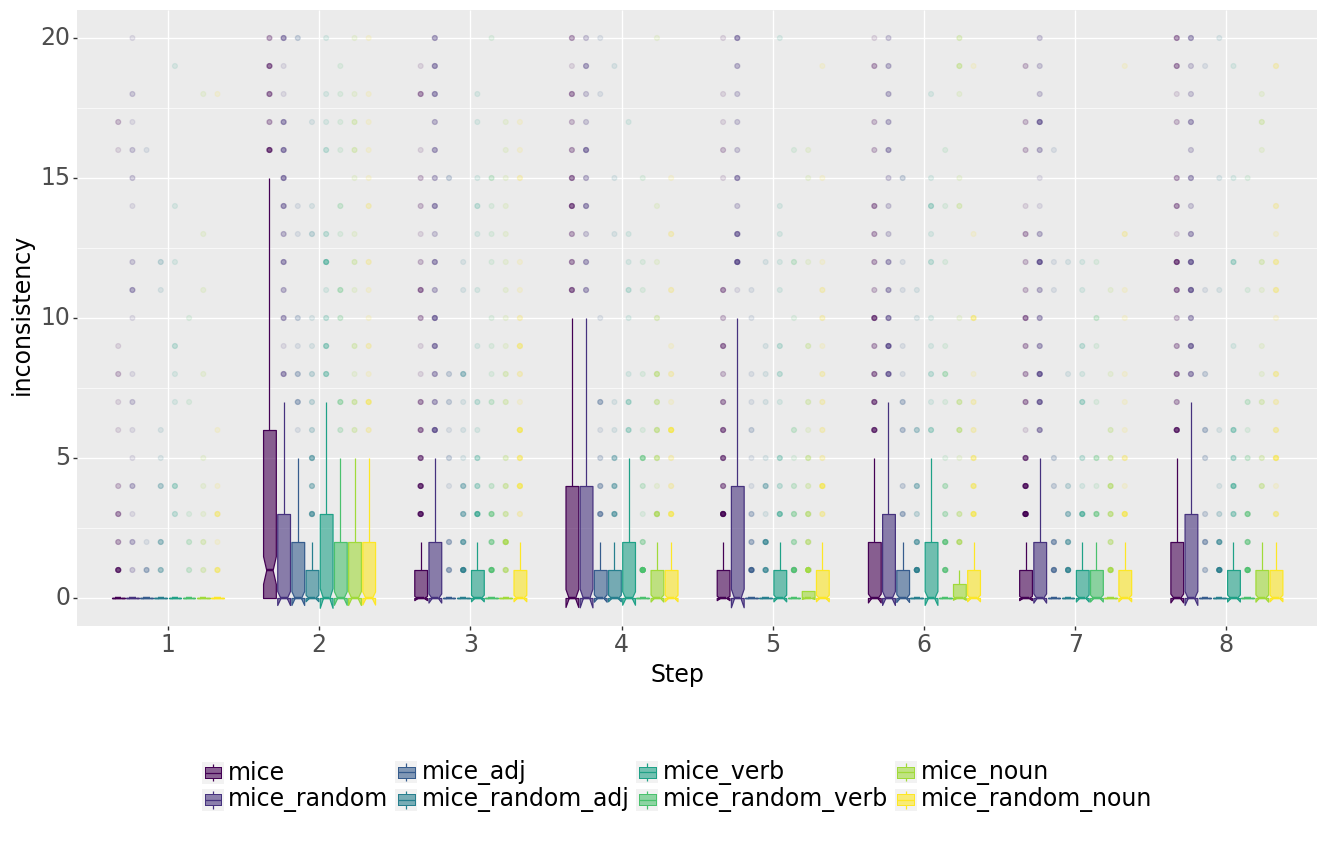

In [69]:
print (f"Inconsistency of {dataset}: ")

order_list = ["mice", "mice_random", "mice_adj", "mice_random_adj", "mice_verb", "mice_random_verb", "mice_noun", "mice_random_noun"]

df = to_ggplot([mice2, {k:v for k, v in mice.items() if k < 10}, {k:v for k, v in mice_adj_not.items() if k < 10}, {k:v for k, v in mice_adj.items() if k < 10}, {k:v for k, v in mice_verb_not.items() if k < 10}, {k:v for k, v in mice_verb.items() if k < 10}, {k:v for k, v in mice_noun_not.items() if k < 10}, {k:v for k, v in mice_noun.items() if k < 10}], order_list, metric)

df['Editor'] = pd.Categorical(df['Editor'], categories=order_list, ordered=True)

gg = ggplot(df) + aes(x="Step", y= metric, color='Editor', fill ="Editor") + geom_boxplot(notch=True, outlier_alpha = 0.1, alpha = 0.6)+ylim(0, 20)+theme(legend_direction='horizontal', legend_position=(.5, -.09), legend_title=element_blank(), text = element_text(size = 17))+ theme(figure_size=(16, 8))
print (gg)

### Polyjuice

Inconsistency of minimality of imdb: 


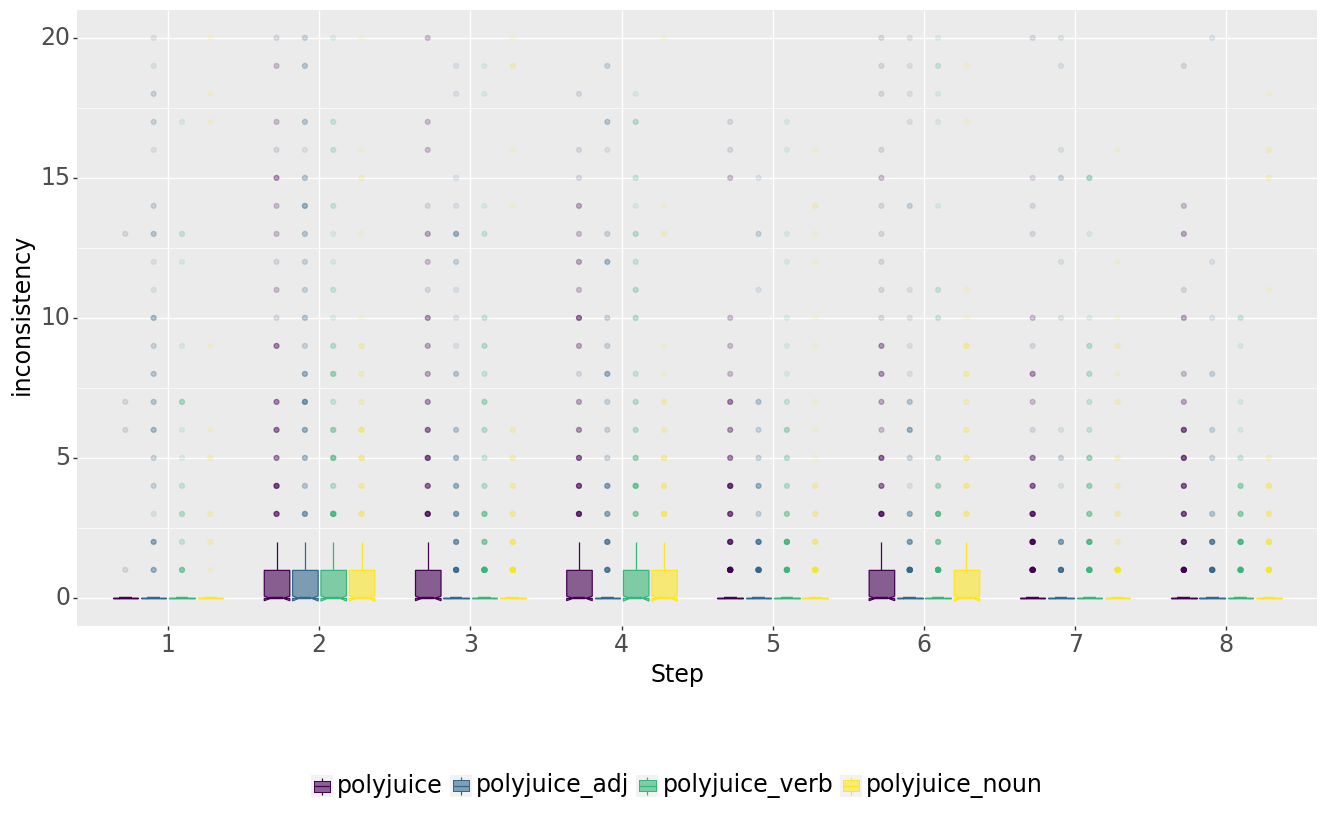

In [70]:
metric = "inconsistency"
dataset = "imdb"    

print (f"Inconsistency of minimality of {dataset}: ")

order_list = ["polyjuice", "polyjuice_adj", "polyjuice_verb", "polyjuice_noun"]

df = to_ggplot([polyjuice, {k:v for k, v in polyjuice_adj.items() if k < 10}, {k:v for k, v in polyjuice_verb.items() if k < 10}, {k:v for k, v in polyjuice_noun.items() if k < 10}], order_list, metric)

df['Editor'] = pd.Categorical(df['Editor'], categories=order_list, ordered=True)

gg = ggplot(df) + aes(x="Step", y= metric, color='Editor', fill ="Editor") + geom_boxplot(notch=True, outlier_alpha = 0.1, alpha = 0.6)+ylim(0, 20)+theme(legend_direction='horizontal', legend_position=(.5, -.09), legend_title=element_blank(), text = element_text(size = 17))+ theme(figure_size=(16, 8))

print (gg)

### Textfooler

Inconsistency of imdb: 


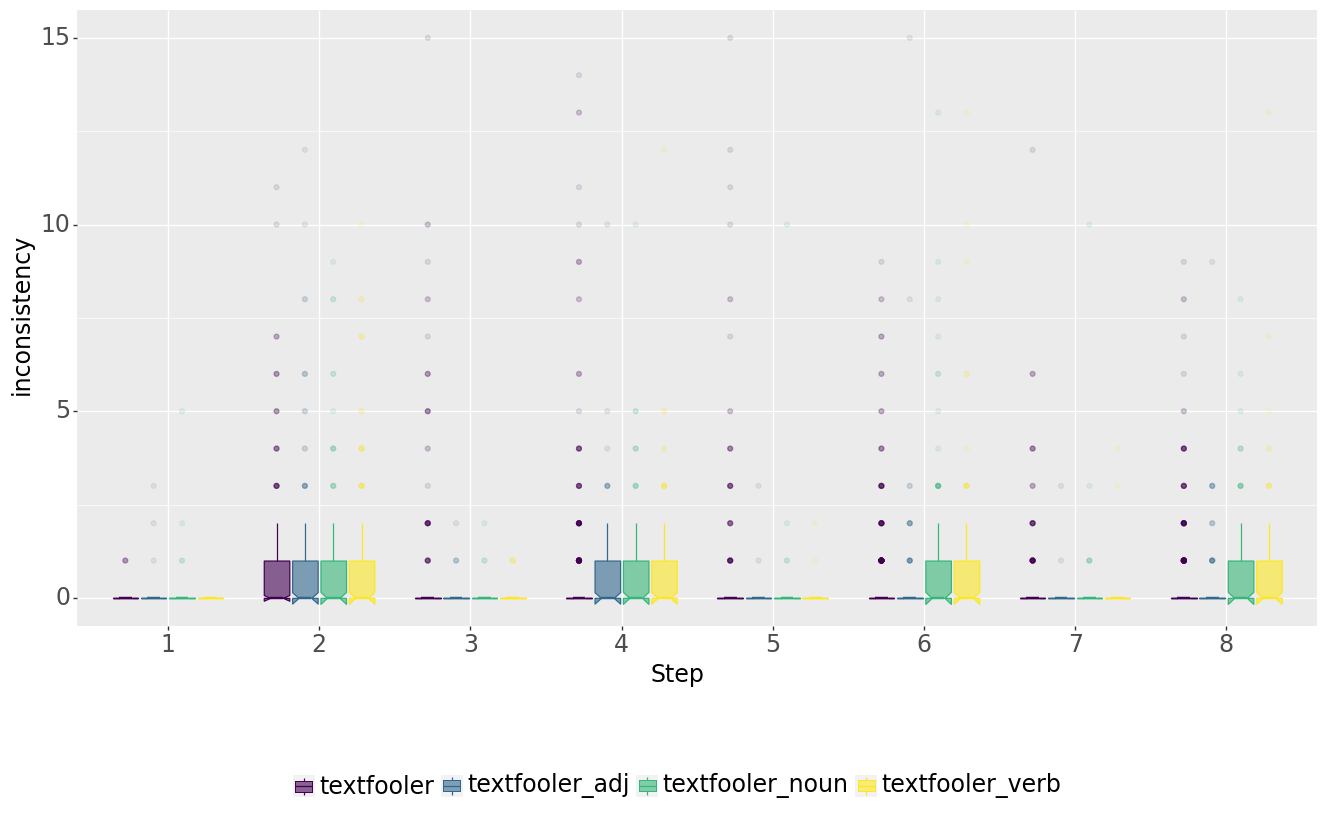

In [40]:
metric = "inconsistency"
dataset = "imdb"    
print (f"Inconsistency of {dataset}: ")

order_list = ["textfooler", "textfooler_adj", "textfooler_noun", "textfooler_verb"]

df = to_ggplot([textfooler, {k:v for k, v in textfooler_adj.items() if k < 10}, {k:v for k, v in textfooler_noun.items() if k < 10}, {k:v for k, v in textfooler_verb.items() if k < 10}], order_list, metric)

df['Editor'] = pd.Categorical(df['Editor'], categories=order_list, ordered=True)

gg = ggplot(df) + aes(x="Step", y= metric, color='Editor', fill ="Editor") + geom_boxplot(notch=True, outlier_alpha = 0.1, alpha = 0.6)+ylim(0, 15)+theme(legend_direction='horizontal', legend_position=(.5, -.09), legend_title=element_blank(), text = element_text(size = 17))+ theme(figure_size=(16, 8))
print (gg)

### All four editors

Inconsistency of minimality of imdb: 


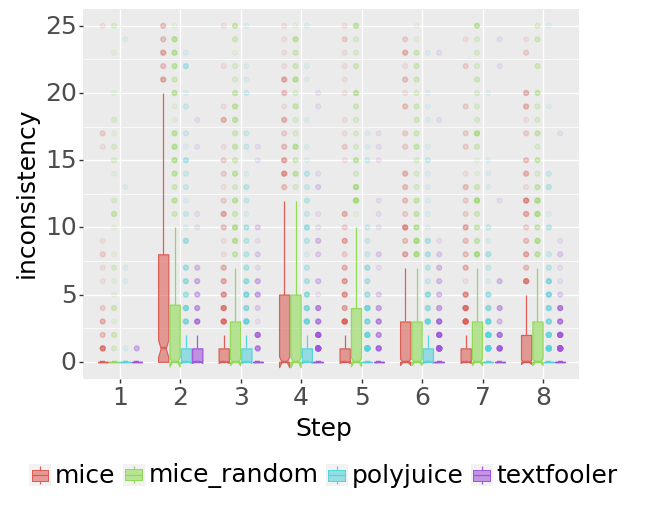

In [41]:
metric = "inconsistency"
dataset = "imdb"

print (f"Inconsistency of minimality of {dataset}: ")

df = to_ggplot([mice2, {k:v for k, v in mice.items() if k < 10},  {k:v for k, v in polyjuice.items() if k < 10}, {k:v for k, v in textfooler.items() if k < 10}], ["mice", "mice_random", "polyjuice", "textfooler"], metric)

gg = ggplot(df) + aes(x="Step", y= metric, color='Editor', fill ="Editor") + geom_boxplot(notch=True,outlier_alpha = 0.1, alpha = 0.6)+ylim(0,25)+theme(legend_direction='horizontal', legend_position=(.5, -.09), legend_title=element_blank(), text = element_text(size = 18))
print (gg)

### Inconsistency of Minimality Table

In [42]:
print ("Inconsistency of minimality Table")
print ("   Mice     MiCERand     MiceAdj    MiceRandAdj    MiceVerb    MiceRandVerb    MiceNoun    MiceRandNoun      Poly    PolyAdj    PolyVerb    PolyNoun    Textfooler    Textfooler Adj   Textfooler Noun   Textfooler Verb")
print ("----"*55)
    
print (f"                                                                 imdb                       ")
print ("----"*55)

df = to_ggplot([ mice2, {k:v for k, v in mice.items() if k < 10}, {k:v for k, v in mice_adj_not.items() if k < 10},  {k:v for k, v in mice_adj.items() if k < 10}, {k:v for k, v in mice_verb_not.items() if k < 10}, {k:v for k, v in mice_verb.items() if k < 10}, {k:v for k, v in mice_noun_not.items() if k < 10},  {k:v for k, v in mice_noun.items() if k < 10}, {k:v for k, v in polyjuice.items() if k < 10}, {k:v for k, v in polyjuice_adj.items() if k < 10}, {k:v for k, v in polyjuice_verb.items() if k < 10}, {k:v for k, v in polyjuice_noun.items() if k < 10}, {k:v for k, v in textfooler.items() if k < 10}, {k:v for k, v in textfooler_adj.items() if k < 10}, {k:v for k, v in textfooler_noun.items() if k < 10}, {k:v for k, v in textfooler_verb.items() if k < 10}], ["mice", "mice_random", "mice_adj", "mice_random_adj", "mice_verb", "mice_random_verb", "mice_noun", "mice_random_noun", "polyjuice", "polyjuice_adj", "polyjuice_verb", "polyjuice_noun", "textfooler","textfooler_adj","textfooler_noun","textfooler_verb"], metric)

rows_without = dict()
mice_rows = dict()
adj_rows = dict()
verb_rows = dict()
noun_rows = dict()

for step in [1,3,5,7,9]:
    l_editor = np.mean(df[(df["Editor"] == "mice") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    m_editor = np.mean(df[(df["Editor"] == "mice_random") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    k_editor = np.mean(df[(df["Editor"] == "mice_adj") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    p_editor = np.mean(df[(df["Editor"] == "mice_random_adj") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    t_editor = np.mean(df[(df["Editor"] == "mice_random_verb") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    v_editor = np.mean(df[(df["Editor"] == "mice_verb") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    noun_editor = np.mean(df[(df["Editor"] == "mice_noun") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    rand_noun_editor = np.mean(df[(df["Editor"] == "mice_random_noun") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    polyjuice_editor = np.mean(df[(df["Editor"] == "polyjuice") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    polyjuice_adj_editor = np.mean(df[(df["Editor"] == "polyjuice_adj") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    polyjuice_verb_editor = np.mean(df[(df["Editor"] == "polyjuice_verb") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    polyjuice_noun_editor = np.mean(df[(df["Editor"] == "polyjuice_noun") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    textfooler_editor = np.mean(df[(df["Editor"] == "textfooler") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    textfooler_adj_editor = np.mean(df[(df["Editor"] == "textfooler_adj") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    textfooler_noun_editor = np.mean(df[(df["Editor"] == "textfooler_noun") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    textfooler_verb_editor = np.mean(df[(df["Editor"] == "textfooler_verb") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    
    m_editor = round(m_editor, 2)
    p_editor = round(p_editor, 2)
    t_editor = round(t_editor, 2)
    l_editor = round(l_editor, 2)
    k_editor = round(k_editor, 2)
    v_editor = round(v_editor, 2)
    noun_editor = round(noun_editor, 2)
    rand_noun_editor = round(rand_noun_editor, 2)
    polyjuice_editor = round(polyjuice_editor, 2)
    polyjuice_adj_editor = round(polyjuice_adj_editor, 2)
    polyjuice_noun_editor = round(polyjuice_noun_editor, 2)
    polyjuice_verb_editor = round(polyjuice_verb_editor, 2)
    textfooler_editor = round(textfooler_editor, 2)
    textfooler_adj_editor = round(textfooler_adj_editor, 2)
    textfooler_noun_editor = round(textfooler_noun_editor, 2)
    textfooler_verb_editor = round(textfooler_verb_editor, 2)
    rows_without[step-1] = [l_editor, m_editor, polyjuice_editor, textfooler_editor]
    mice_rows[step-1] = [k_editor, noun_editor, v_editor, p_editor, rand_noun_editor, t_editor, polyjuice_adj_editor, polyjuice_noun_editor, polyjuice_verb_editor, textfooler_adj_editor, textfooler_noun_editor, textfooler_verb_editor]
    adj_rows[step-1] = [k_editor, p_editor, polyjuice_adj_editor, textfooler_adj_editor]
    verb_rows[step-1] = [v_editor, t_editor, polyjuice_verb_editor, textfooler_verb_editor]
    noun_rows[step-1] = [noun_editor, rand_noun_editor, polyjuice_noun_editor, textfooler_noun_editor]
    print (f"inc@{step}↑: {l_editor}\t{m_editor}\t{k_editor}\t\t{p_editor}\t\t{v_editor}\t\t{t_editor}\t{noun_editor}\t\t{rand_noun_editor}\t\t{polyjuice_editor}\t{polyjuice_adj_editor}\t{polyjuice_verb_editor}\t\t{polyjuice_noun_editor}\t{textfooler_editor}\t\t{textfooler_adj_editor}\t\t{textfooler_noun_editor}\t\t{textfooler_verb_editor}")

print ("----"*55)

for step in [2,4,6,8]:
    l_editor = np.mean(df[(df["Editor"] == "mice") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    m_editor = np.mean(df[(df["Editor"] == "mice_random") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    k_editor = np.mean(df[(df["Editor"] == "mice_adj") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    p_editor = np.mean(df[(df["Editor"] == "mice_random_adj") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    t_editor = np.mean(df[(df["Editor"] == "mice_random_verb") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    v_editor = np.mean(df[(df["Editor"] == "mice_verb") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    noun_editor = np.mean(df[(df["Editor"] == "mice_noun") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    rand_noun_editor = np.mean(df[(df["Editor"] == "mice_random_noun") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    polyjuice_editor = np.mean(df[(df["Editor"] == "polyjuice") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    polyjuice_adj_editor = np.mean(df[(df["Editor"] == "polyjuice_adj") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    polyjuice_verb_editor = np.mean(df[(df["Editor"] == "polyjuice_verb") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    polyjuice_noun_editor = np.mean(df[(df["Editor"] == "polyjuice_noun") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    textfooler_editor = np.mean(df[(df["Editor"] == "textfooler") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    textfooler_adj_editor = np.mean(df[(df["Editor"] == "textfooler_adj") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    textfooler_noun_editor = np.mean(df[(df["Editor"] == "textfooler_noun") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    textfooler_verb_editor = np.mean(df[(df["Editor"] == "textfooler_verb") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])

    
    m_editor = round(m_editor, 2)
    p_editor = round(p_editor, 2)
    t_editor = round(t_editor, 2)
    l_editor = round(l_editor, 2)
    k_editor = round(k_editor, 2)
    v_editor = round(v_editor, 2)
    noun_editor = round(noun_editor, 2)
    rand_noun_editor = round(rand_noun_editor, 2)
    polyjuice_editor = round(polyjuice_editor, 2)
    polyjuice_adj_editor = round(polyjuice_adj_editor, 2)
    polyjuice_noun_editor = round(polyjuice_noun_editor, 2)
    polyjuice_verb_editor = round(polyjuice_verb_editor, 2)
    textfooler_editor = round(textfooler_editor, 2)
    textfooler_adj_editor = round(textfooler_adj_editor, 2)
    textfooler_noun_editor = round(textfooler_noun_editor, 2)
    textfooler_verb_editor = round(textfooler_verb_editor, 2)
    rows_without[step-1] = [l_editor, m_editor, polyjuice_editor, textfooler_editor]
    mice_rows[step-1] = [k_editor, noun_editor, v_editor, p_editor, rand_noun_editor, t_editor, polyjuice_adj_editor, polyjuice_noun_editor, polyjuice_verb_editor, textfooler_adj_editor, textfooler_noun_editor, textfooler_verb_editor]
    adj_rows[step-1] = [k_editor, p_editor, polyjuice_adj_editor, textfooler_adj_editor]
    verb_rows[step-1] = [v_editor, t_editor, polyjuice_verb_editor, textfooler_verb_editor]
    noun_rows[step-1] = [noun_editor, rand_noun_editor, polyjuice_noun_editor, textfooler_noun_editor]
    print (f"inc@{step}↑: {l_editor}\t{m_editor}\t{k_editor}\t\t{p_editor}\t\t{v_editor}\t\t{t_editor}\t{noun_editor}\t\t{rand_noun_editor}\t\t{polyjuice_editor}\t{polyjuice_adj_editor}\t{polyjuice_verb_editor}\t\t{polyjuice_noun_editor}\t{textfooler_editor}\t\t{textfooler_adj_editor}\t\t{textfooler_noun_editor}\t\t{textfooler_verb_editor}")

print ("----"*55)

Inconsistency of minimality Table
   Mice     MiCERand     MiceAdj    MiceRandAdj    MiceVerb    MiceRandVerb    MiceNoun    MiceRandNoun      Poly    PolyAdj    PolyVerb    PolyNoun    Textfooler    Textfooler Adj   Textfooler Noun   Textfooler Verb
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                 imdb                       
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inc@1↑: 0.86	2.42	0.13		0.47		1.0		0.69	0.75		0.58		6.21	4.7	1.33		1.39	0.01		0.05		0.09		0.0
inc@3↑: 4.65	6.37	0.99		0.88		1.95		1.52	1.89		2.21		3.98	4.76	2.15		2.39	0.36		0.41		0.39		0.43
inc@5↑: 4.87	7.58	1.05	

Textfooler has the lower inconsistency , maybe noise in MiCE due to attention. Also, TextFooler substitutes words with synonyms or other close words in an embedding space, but always substitutes with only one word. MiCE can substitute with multiple words, so it is more likely to have a higher minimality and thus a higher inconsistency.

## NewsGroups

In [72]:
#For MiCE
mice2 = load_pickle(f"Metrics\Inconsistency\\newsgroups_mice_gradient_inconsistency.pickle")
mice = load_pickle(f"Metrics\Inconsistency\\newsgroups_mice_random_inconsistency.pickle")
mice_adj_not = load_pickle(f"Metrics\Inconsistency\\newsgroups_mice_grad_adj_new_inconsistency.pickle")
mice_adj = load_pickle(f"Metrics\Inconsistency\\newsgroups_mice_random_adj_inconsistency.pickle")
mice_verb = load_pickle(f"Metrics\Inconsistency\\newsgroups_mice_random_verb_inconsistency.pickle")
mice_verb_not = load_pickle(f"Metrics\Inconsistency\\newsgroups_mice_grad_verb_new_inconsistency.pickle")
mice_noun = load_pickle(f"Metrics\Inconsistency\\newsgroups_mice_random_noun_inconsistency.pickle")
mice_noun_not = load_pickle(f"Metrics\Inconsistency\\newsgroups_mice_grad_noun_new_inconsistency.pickle")

#For Polyjuice
polyjuice = load_pickle(f"Metrics\Inconsistency\\newsgroups_polyjuice_random_inconsistency.pickle")
polyjuice = dict(list(polyjuice.items())[:9])
polyjuice_adj = load_pickle(f"Metrics\Inconsistency\\newsgroups_polyjuice_new_adj_inconsistency.pickle")
polyjuice_noun = load_pickle(f"Metrics\Inconsistency\\newsgroups_polyjuice_new_noun_inconsistency.pickle")
polyjuice_verb = load_pickle(f"Metrics\Inconsistency\\newsgroups_polyjuice_new_verb_inconsistency.pickle")

#For Textfooler
textfooler = load_pickle(f"Metrics\Inconsistency\\newsgroups_textfooler_allennlp_inconsistency.pickle")
textfooler_adj = load_pickle(f"Metrics\Inconsistency\\newsgroups_textfooler_ADJ_inconsistency.pickle")
textfooler_noun = load_pickle(f"Metrics\Inconsistency\\newsgroups_textfooler_NOUN_inconsistency.pickle")
textfooler_verb = load_pickle(f"Metrics\Inconsistency\\newsgroups_textfooler_VERB_inconsistency.pickle")

In [44]:
for i in range(1,9):
    print(len([val for val in textfooler[i] if val==0.0])/len(textfooler[i]) , len([val for val in textfooler_adj[i] if val==0.0])/len(textfooler_adj[i]) , len([val for val in textfooler_noun[i] if val==0.0])/len(textfooler_noun[i]), len([val for val in textfooler_verb[i] if val==0.0])/len(textfooler_verb[i]))

0.9691817215727949 0.9625 0.9754385964912281 0.9833795013850416
0.7130712008501594 0.8235294117647058 0.7692307692307693 0.7832369942196532
0.946865037194474 0.9666666666666667 0.9712746858168761 0.9735294117647059
0.7555791710945803 0.9387755102040817 0.8203266787658802 0.8368580060422961
0.9553666312433581 0.9931972789115646 0.9781818181818182 0.9696969696969697
0.8278427205100957 0.9517241379310345 0.8754578754578755 0.8957055214723927
0.9564293304994687 0.993103448275862 0.9633699633699634 0.9785276073619632
0.8405951115834219 0.9790209790209791 0.9134438305709024 0.9233128834355828


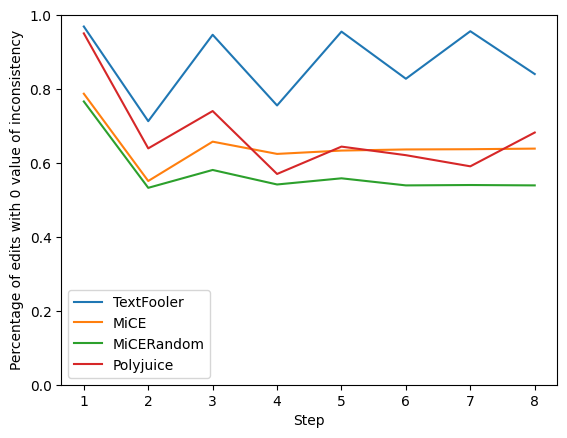

In [45]:
import numpy as np
import matplotlib.pyplot as plt
  
x = [1, 2, 3, 4, 5, 6, 7, 8]
  
xvals = [len([val for val in textfooler[i] if val==0.0])/len(textfooler[i]) for i in range(1,9)]
plt.plot(x, xvals, label="TextFooler")

yvals = [len([val for val in mice2[i] if val==0.0])/len(mice2[i]) for i in range(1,9)]
plt.plot(x, yvals, label="MiCE")
  
zvals = [len([val for val in mice[i] if val==0.0])/len(mice[i]) for i in range(1,9)]
plt.plot(x, zvals, label="MiCERandom")

h_vals = [len([val for val in polyjuice[i] if val==0.0])/len(polyjuice[i]) for i in range(1,9)]
plt.plot(x, h_vals, label="Polyjuice")


plt.ylim(0, 1)

# Adding labels and legend
plt.xlabel('Step')
plt.ylabel('Percentage of edits with 0 value of inconsistency')
plt.legend(fontsize='medium')  
plt.show()

Inconsistency of minimality of imdb: 


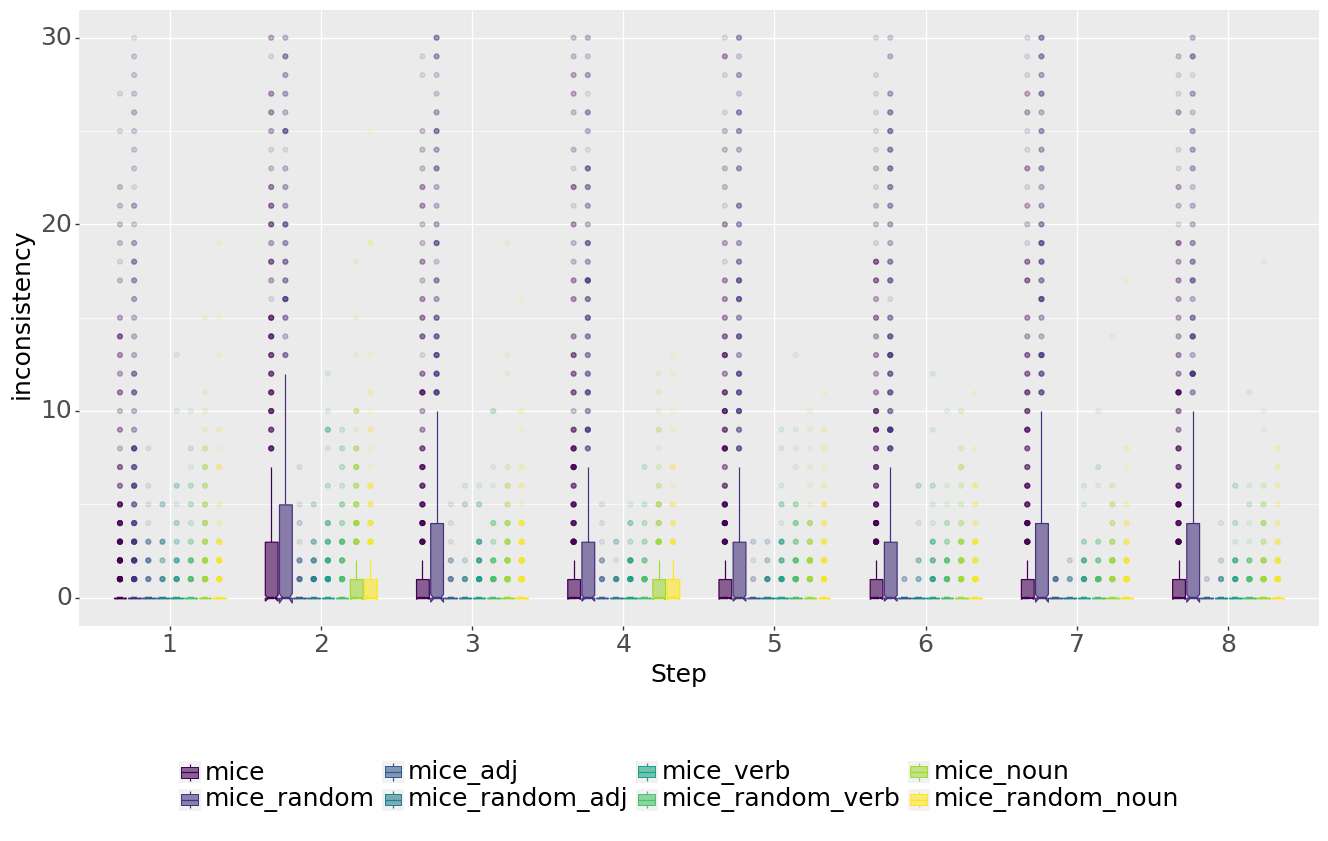

In [74]:
### MiCE
metric = "inconsistency"
dataset = "imdb"

print (f"Inconsistency of minimality of {dataset}: ")

order_list = ["mice", "mice_random", "mice_adj", "mice_random_adj", "mice_verb", "mice_random_verb", "mice_noun", "mice_random_noun"]

df = to_ggplot([mice2, {k:v for k, v in mice.items() if k < 10}, {k:v for k, v in mice_adj_not.items() if k < 10}, {k:v for k, v in mice_adj.items() if k < 10}, {k:v for k, v in mice_verb_not.items() if k < 10}, {k:v for k, v in mice_verb.items() if k < 10}, {k:v for k, v in mice_noun_not.items() if k < 10}, {k:v for k, v in mice_noun.items() if k < 10}], order_list, metric)

df['Editor'] = pd.Categorical(df['Editor'], categories=order_list, ordered=True)

gg = ggplot(df) + aes(x="Step", y= metric, color='Editor', fill ="Editor") + geom_boxplot(notch=True, outlier_alpha = 0.1, alpha = 0.6)+ylim(0,30)+theme(legend_direction='horizontal', legend_position=(.5, -.09), legend_title=element_blank(), text = element_text(size = 18)) + theme(figure_size=(16, 8))
print (gg)

Inconsistency of minimality of imdb: 


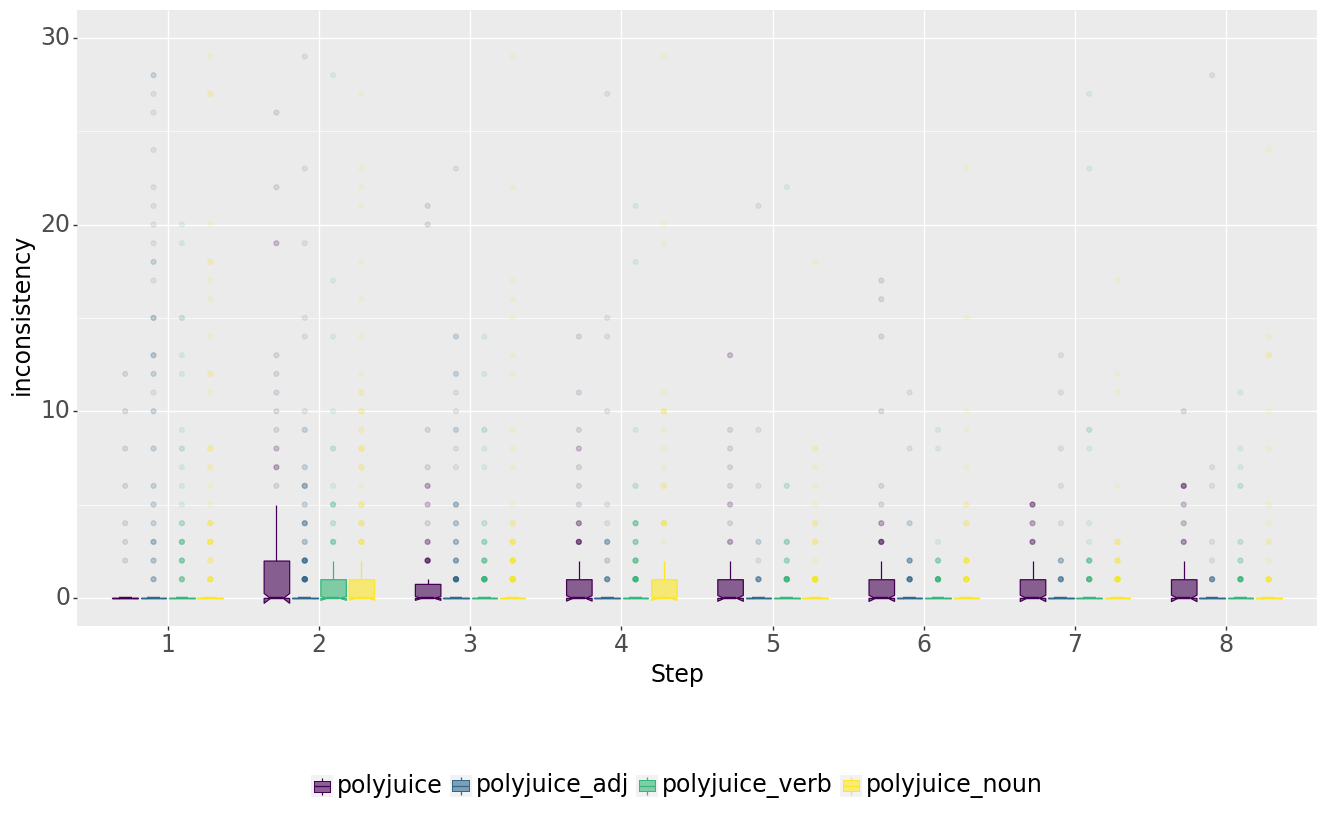

In [47]:
metric = "inconsistency"
dataset = "imdb"    

print (f"Inconsistency of minimality of {dataset}: ")

order_list = ["polyjuice", "polyjuice_adj", "polyjuice_verb", "polyjuice_noun"]

df = to_ggplot([polyjuice, {k:v for k, v in polyjuice_adj.items() if k < 10}, {k:v for k, v in polyjuice_verb.items() if k < 10}, {k:v for k, v in polyjuice_noun.items() if k < 10}], order_list, metric)

df['Editor'] = pd.Categorical(df['Editor'], categories=order_list, ordered=True)

gg = ggplot(df) + aes(x="Step", y= metric, color='Editor', fill ="Editor") + geom_boxplot(notch=True, outlier_alpha = 0.1, alpha = 0.6)+ylim(0, 30)+theme(legend_direction='horizontal', legend_position=(.5, -.09), legend_title=element_blank(), text = element_text(size = 17))+ theme(figure_size=(16, 8))

print (gg)

Inconsistency of imdb: 


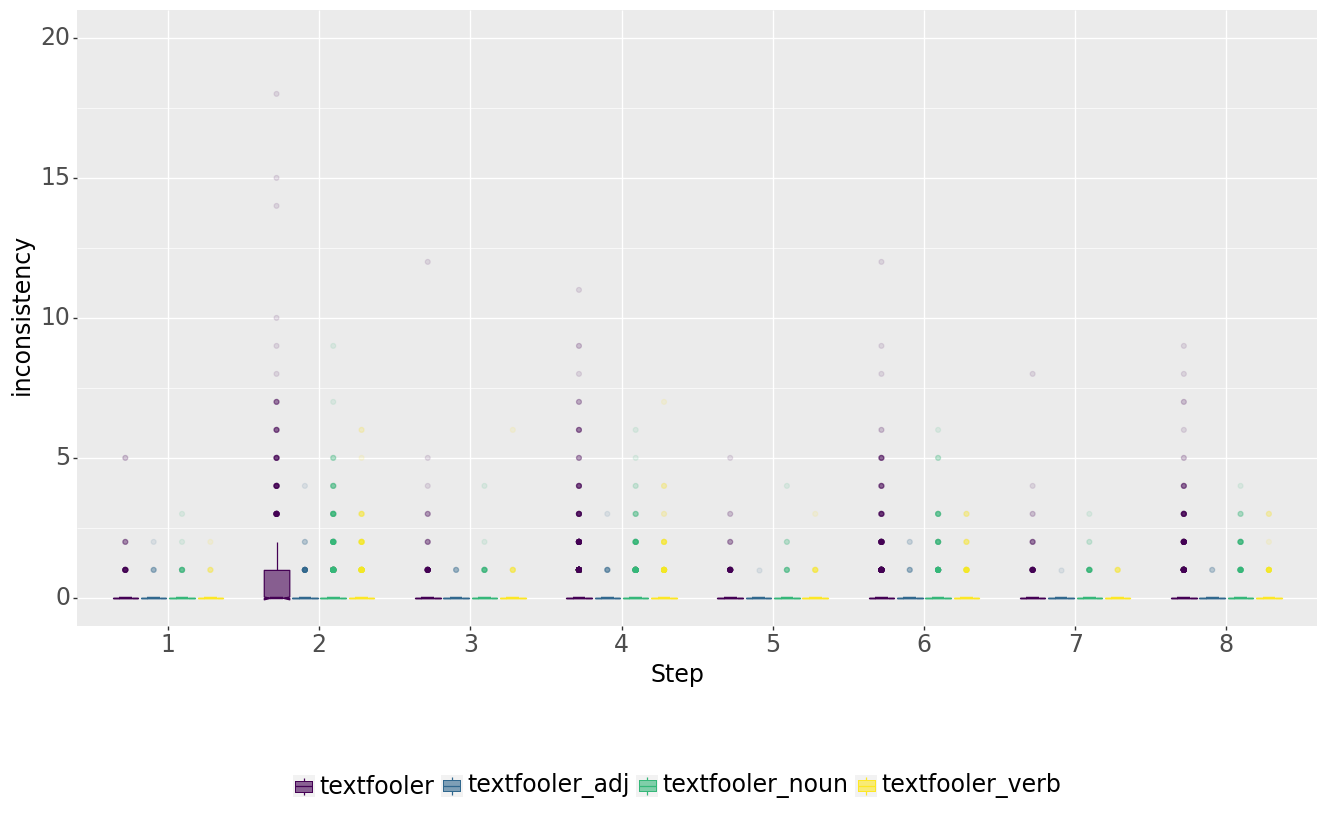

In [75]:
### Textfooler
metric = "inconsistency"
dataset = "imdb"    
print (f"Inconsistency of {dataset}: ")

order_list = ["textfooler", "textfooler_adj", "textfooler_noun", "textfooler_verb"]

df = to_ggplot([textfooler, {k:v for k, v in textfooler_adj.items() if k < 10}, {k:v for k, v in textfooler_noun.items() if k < 10}, {k:v for k, v in textfooler_verb.items() if k < 10}], order_list, metric)

df['Editor'] = pd.Categorical(df['Editor'], categories=order_list, ordered=True)

gg = ggplot(df) + aes(x="Step", y= metric, color='Editor', fill ="Editor") + geom_boxplot(notch=True, outlier_alpha = 0.1, alpha = 0.6)+ylim(0, 20)+theme(legend_direction='horizontal', legend_position=(.5, -.09), legend_title=element_blank(), text = element_text(size = 17))+ theme(figure_size=(16, 8))
print (gg)

Inconsistency of minimality of imdb: 


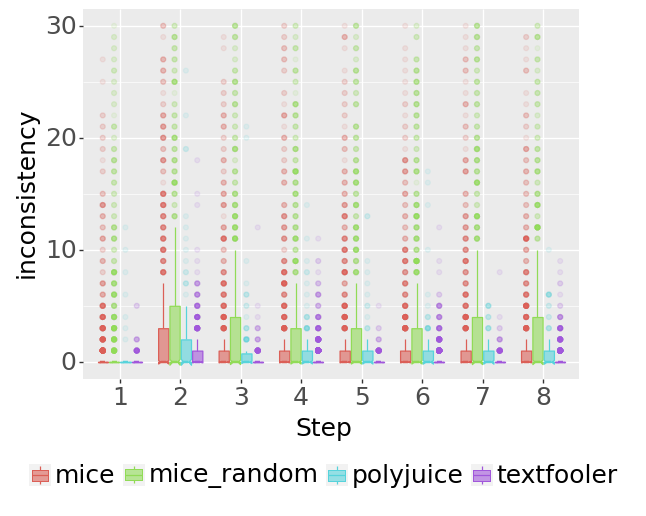

In [49]:
### All three editors
metric = "inconsistency"
dataset = "imdb"

print (f"Inconsistency of minimality of {dataset}: ")

df = to_ggplot([mice2, {k:v for k, v in mice.items() if k < 10},  {k:v for k, v in polyjuice.items() if k < 10}, {k:v for k, v in textfooler.items() if k < 10}], ["mice", "mice_random", "polyjuice", "textfooler"], metric)

gg = ggplot(df) + aes(x="Step", y= metric, color='Editor', fill ="Editor") + geom_boxplot(notch=True,outlier_alpha = 0.1, alpha = 0.6)+ylim(0,30)+theme(legend_direction='horizontal', legend_position=(.5, -.09), legend_title=element_blank(), text = element_text(size = 18))
print (gg)

In [50]:
print ("Inconsistency of minimality Table")
print ("   Mice     MiCERand     MiceAdj    MiceRandAdj    MiceVerb    MiceRandVerb    MiceNoun    MiceRandNoun      Poly    PolyAdj    PolyVerb    PolyNoun    Textfooler    Textfooler Adj   Textfooler Noun   Textfooler Verb")
print ("----"*55)
    
print (f"                                                                 imdb                       ")
print ("----"*55)

df = to_ggplot([ mice2, {k:v for k, v in mice.items() if k < 10}, {k:v for k, v in mice_adj_not.items() if k < 10},  {k:v for k, v in mice_adj.items() if k < 10}, {k:v for k, v in mice_verb_not.items() if k < 10}, {k:v for k, v in mice_verb.items() if k < 10}, {k:v for k, v in mice_noun_not.items() if k < 10},  {k:v for k, v in mice_noun.items() if k < 10}, {k:v for k, v in polyjuice.items() if k < 10}, {k:v for k, v in polyjuice_adj.items() if k < 10}, {k:v for k, v in polyjuice_verb.items() if k < 10}, {k:v for k, v in polyjuice_noun.items() if k < 10}, {k:v for k, v in textfooler.items() if k < 10}, {k:v for k, v in textfooler_adj.items() if k < 10}, {k:v for k, v in textfooler_noun.items() if k < 10}, {k:v for k, v in textfooler_verb.items() if k < 10}], ["mice", "mice_random", "mice_adj", "mice_random_adj", "mice_verb", "mice_random_verb", "mice_noun", "mice_random_noun", "polyjuice", "polyjuice_adj", "polyjuice_verb", "polyjuice_noun", "textfooler","textfooler_adj","textfooler_noun","textfooler_verb"], metric)

news_without = dict()
news_rows = dict()
news_adj_rows = dict()
news_verb_rows = dict()
news_noun_rows = dict()

for step in [1,3,5,7,9]:
    l_editor = np.mean(df[(df["Editor"] == "mice") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    m_editor = np.mean(df[(df["Editor"] == "mice_random") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    k_editor = np.mean(df[(df["Editor"] == "mice_adj") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    p_editor = np.mean(df[(df["Editor"] == "mice_random_adj") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    t_editor = np.mean(df[(df["Editor"] == "mice_random_verb") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    v_editor = np.mean(df[(df["Editor"] == "mice_verb") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    noun_editor = np.mean(df[(df["Editor"] == "mice_noun") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    rand_noun_editor = np.mean(df[(df["Editor"] == "mice_random_noun") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    polyjuice_editor = np.mean(df[(df["Editor"] == "polyjuice") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    polyjuice_adj_editor = np.mean(df[(df["Editor"] == "polyjuice_adj") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    polyjuice_verb_editor = np.mean(df[(df["Editor"] == "polyjuice_verb") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    polyjuice_noun_editor = np.mean(df[(df["Editor"] == "polyjuice_noun") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    textfooler_editor = np.mean(df[(df["Editor"] == "textfooler") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    textfooler_adj_editor = np.mean(df[(df["Editor"] == "textfooler_adj") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    textfooler_noun_editor = np.mean(df[(df["Editor"] == "textfooler_noun") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    textfooler_verb_editor = np.mean(df[(df["Editor"] == "textfooler_verb") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    
    m_editor = round(m_editor, 2)
    p_editor = round(p_editor, 2)
    t_editor = round(t_editor, 2)
    l_editor = round(l_editor, 2)
    k_editor = round(k_editor, 2)
    v_editor = round(v_editor, 2)
    noun_editor = round(noun_editor, 2)
    rand_noun_editor = round(rand_noun_editor, 2)
    polyjuice_editor = round(polyjuice_editor, 2)
    polyjuice_adj_editor = round(polyjuice_adj_editor, 2)
    polyjuice_noun_editor = round(polyjuice_noun_editor, 2)
    polyjuice_verb_editor = round(polyjuice_verb_editor, 2)
    textfooler_editor = round(textfooler_editor, 2)
    textfooler_adj_editor = round(textfooler_adj_editor, 2)
    textfooler_noun_editor = round(textfooler_noun_editor, 2)
    textfooler_verb_editor = round(textfooler_verb_editor, 2)
    news_without[step-1] = [l_editor, m_editor, polyjuice_editor, textfooler_editor]
    news_rows[step-1] = [k_editor, noun_editor, v_editor, p_editor, rand_noun_editor, t_editor, polyjuice_adj_editor, polyjuice_noun_editor, polyjuice_verb_editor, textfooler_adj_editor, textfooler_noun_editor, textfooler_verb_editor]
    news_adj_rows[step-1] = [k_editor, p_editor, polyjuice_adj_editor, textfooler_adj_editor]
    news_verb_rows[step-1] = [v_editor, t_editor, polyjuice_verb_editor, textfooler_verb_editor]
    news_noun_rows[step-1] = [noun_editor, rand_noun_editor, polyjuice_noun_editor, textfooler_noun_editor]
    print (f"inc@{step}↑: {l_editor}\t{m_editor}\t{k_editor}\t\t{p_editor}\t\t{v_editor}\t\t{t_editor}\t{noun_editor}\t\t{rand_noun_editor}\t\t{polyjuice_editor}\t{polyjuice_adj_editor}\t{polyjuice_verb_editor}\t\t{polyjuice_noun_editor}\t{textfooler_editor}\t\t{textfooler_adj_editor}\t\t{textfooler_noun_editor}\t\t{textfooler_verb_editor}")

print ("----"*55)

for step in [2,4,6,8]:
    l_editor = np.mean(df[(df["Editor"] == "mice") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    m_editor = np.mean(df[(df["Editor"] == "mice_random") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    k_editor = np.mean(df[(df["Editor"] == "mice_adj") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    p_editor = np.mean(df[(df["Editor"] == "mice_random_adj") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    t_editor = np.mean(df[(df["Editor"] == "mice_random_verb") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    v_editor = np.mean(df[(df["Editor"] == "mice_verb") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    noun_editor = np.mean(df[(df["Editor"] == "mice_noun") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    rand_noun_editor = np.mean(df[(df["Editor"] == "mice_random_noun") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    polyjuice_editor = np.mean(df[(df["Editor"] == "polyjuice") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    polyjuice_adj_editor = np.mean(df[(df["Editor"] == "polyjuice_adj") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    polyjuice_verb_editor = np.mean(df[(df["Editor"] == "polyjuice_verb") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    polyjuice_noun_editor = np.mean(df[(df["Editor"] == "polyjuice_noun") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    textfooler_editor = np.mean(df[(df["Editor"] == "textfooler") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    textfooler_adj_editor = np.mean(df[(df["Editor"] == "textfooler_adj") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    textfooler_noun_editor = np.mean(df[(df["Editor"] == "textfooler_noun") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    textfooler_verb_editor = np.mean(df[(df["Editor"] == "textfooler_verb") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])

    
    m_editor = round(m_editor, 2)
    p_editor = round(p_editor, 2)
    t_editor = round(t_editor, 2)
    l_editor = round(l_editor, 2)
    k_editor = round(k_editor, 2)
    v_editor = round(v_editor, 2)
    noun_editor = round(noun_editor, 2)
    rand_noun_editor = round(rand_noun_editor, 2)
    polyjuice_editor = round(polyjuice_editor, 2)
    polyjuice_adj_editor = round(polyjuice_adj_editor, 2)
    polyjuice_noun_editor = round(polyjuice_noun_editor, 2)
    polyjuice_verb_editor = round(polyjuice_verb_editor, 2)
    textfooler_editor = round(textfooler_editor, 2)
    textfooler_adj_editor = round(textfooler_adj_editor, 2)
    textfooler_noun_editor = round(textfooler_noun_editor, 2)
    textfooler_verb_editor = round(textfooler_verb_editor, 2)
    news_without[step-1] = [l_editor, m_editor, polyjuice_editor, textfooler_editor]
    news_rows[step-1] = [k_editor, noun_editor, v_editor, p_editor, rand_noun_editor, t_editor, polyjuice_adj_editor, polyjuice_noun_editor, polyjuice_verb_editor, textfooler_adj_editor, textfooler_noun_editor, textfooler_verb_editor]
    news_adj_rows[step-1] = [k_editor, p_editor, polyjuice_adj_editor, textfooler_adj_editor]
    news_verb_rows[step-1] = [v_editor, t_editor, polyjuice_verb_editor, textfooler_verb_editor]
    news_noun_rows[step-1] = [noun_editor, rand_noun_editor, polyjuice_noun_editor, textfooler_noun_editor]
    print (f"inc@{step}↑: {l_editor}\t{m_editor}\t{k_editor}\t\t{p_editor}\t\t{v_editor}\t\t{t_editor}\t{noun_editor}\t\t{rand_noun_editor}\t\t{polyjuice_editor}\t{polyjuice_adj_editor}\t{polyjuice_verb_editor}\t\t{polyjuice_noun_editor}\t{textfooler_editor}\t\t{textfooler_adj_editor}\t\t{textfooler_noun_editor}\t\t{textfooler_verb_editor}")

print ("----"*55)

Inconsistency of minimality Table
   Mice     MiCERand     MiceAdj    MiceRandAdj    MiceVerb    MiceRandVerb    MiceNoun    MiceRandNoun      Poly    PolyAdj    PolyVerb    PolyNoun    Textfooler    Textfooler Adj   Textfooler Noun   Textfooler Verb
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                 imdb                       
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inc@1↑: 1.23	2.66	0.3		0.22		0.26		0.32	0.5		0.47		0.53	2.19	0.91		1.11	0.04		0.04		0.03		0.02
inc@3↑: 2.44	4.37	0.26		0.24		0.37		0.41	0.69		0.67		1.28	1.65	0.8		1.26	0.27		0.1		0.16		0.13
inc@5↑: 2.46	4.62	0.22		

In [51]:
latex1 = create_latex_table_without_pos("inc", [], rows_without, news_without)
print(latex1)

\begin{table}[H]
\begin{adjustwidth}{0in}{0in}
  \centering
  \begin{tabular}{c|cccc}
    \hline
    \multicolumn{1}{c}{\multirow{2}{*}{}} & \multicolumn{4}{c}{\textbf{IMDb}} \\
    \cline{2-5}
    \multicolumn{1}{c}{} & \multicolumn{1}{c}{MiCE} & \multicolumn{1}{c}{MiCERandom} & \multicolumn{1}{c}{Polyjuice} & \multicolumn{1}{c}{TextFooler} \\
    \cline{2-5}
    \hline
\textbf{inc@1↑} & 0.86  & 2.42  & 6.21  & \textbf{0.01}  \\
\textbf{inc@2↑} & 5.95  & 5.81  & 4.65  & \textbf{0.33}  \\
\textbf{inc@3↑} & 4.65  & 6.37  & 3.98  & \textbf{0.36}  \\
\textbf{inc@5↑} & 4.87  & 7.58  & 2.9  & \textbf{0.47}  \\
\textbf{inc@9↑} & 4.73  & 8.11  & 2.22  & \textbf{0.49}  \\
\hline
\multirow{1}{*}{\textbf{}} & \multicolumn{4}{c}{\textbf{NewsGroups}} \\ \cline{2-5}
\textbf{inc@1↑} & 1.23  & 2.66  & 0.53  & \textbf{0.04}  \\
\textbf{inc@2↑} & 2.53  & 4.3  & 1.27  & \textbf{0.36}  \\
\textbf{inc@3↑} & 2.44  & 4.37  & 1.28  & \textbf{0.27}  \\
\textbf{inc@5↑} & 2.46  & 4.62  & 1.24  & \textbf{0.27}  

In [52]:
latex = create_latex_table_for_pos("inc", [], mice_rows, adj_rows, noun_rows, verb_rows, news_rows, news_adj_rows, news_verb_rows, news_noun_rows)
print(latex)

\begin{table}[H]
\begin{adjustwidth}{-0.35in}{0in}
  \centering
  \begin{tabular}{c|ccc|ccc|ccc|ccc}
    \hline
    \multicolumn{1}{c}{\multirow{3}{*}{}} & \multicolumn{12}{c}{IMDb} \\
    \cline{2-13}
    \multicolumn{1}{c}{} & \multicolumn{3}{c|}{MiCE} & \multicolumn{3}{c|}{MiCERandom} & \multicolumn{3}{c|}{Polyjuice} & \multicolumn{3}{c}{TextFooler} \\
    \cline{2-13}
    \multicolumn{1}{c}{} & ADJ & NOUN & VERB & ADJ & NOUN & VERB & ADJ & NOUN & VERB & ADJ & NOUN & VERB \\
    \hline
\textbf{inc@1↑} & 0.13  & 0.75  & 1.0  & 0.47  & 0.58  & 0.69  & \textbf{4.7}  & \textbf{1.39}  & \textbf{1.33}  & 0.05  & 0.09  & 0.0  \\
\textbf{inc@2↑} & 1.16  & 2.03  & 2.22  & 0.9  & 2.02  & 1.5  & \textbf{5.76}  & \textbf{2.88}  & \textbf{2.69}  & 0.58  & 0.56  & 0.62  \\
\textbf{inc@3↑} & 0.99  & 1.89  & 1.95  & 0.88  & 2.21  & 1.52  & \textbf{4.76}  & \textbf{2.39}  & \textbf{2.15}  & 0.41  & 0.39  & 0.43  \\
\textbf{inc@5↑} & 1.05  & \textbf{2.08}  & 1.79  & 0.85  & 2.13  & 1.44  & \textbf{3.

## Beam search and multinomial sampling

##### IMDb

In [53]:
mice2 = load_pickle(f"Metrics\Inconsistency\\imdb_mice_inconsistency.pickle")
mice_sample5 = load_pickle(f"Metrics\Inconsistency\\imdb_mice_sample5_inconsistency.pickle")
mice_greedy = load_pickle(f"Metrics\Inconsistency\\imdb_mice_greedy_inconsistency.pickle")
mice_beam5 = load_pickle(f"Metrics\Inconsistency\\imdb_mice_beam5_inconsistency.pickle")
mice_beam15 = load_pickle(f"Metrics\Inconsistency\\imdb_mice_beam15_inconsistency.pickle")
mice_beam30 = load_pickle(f"Metrics\Inconsistency\\imdb_mice_beam30_inconsistency.pickle")
mice_beam60 = load_pickle(f"Metrics\Inconsistency\\imdb_mice_beam60_inconsistency.pickle")
mice_beam120 = load_pickle(f"Metrics\Inconsistency\\imdb_mice_beam120_clean_inconsistency.pickle")

Difference of inconsistency of imdb with different beams: 


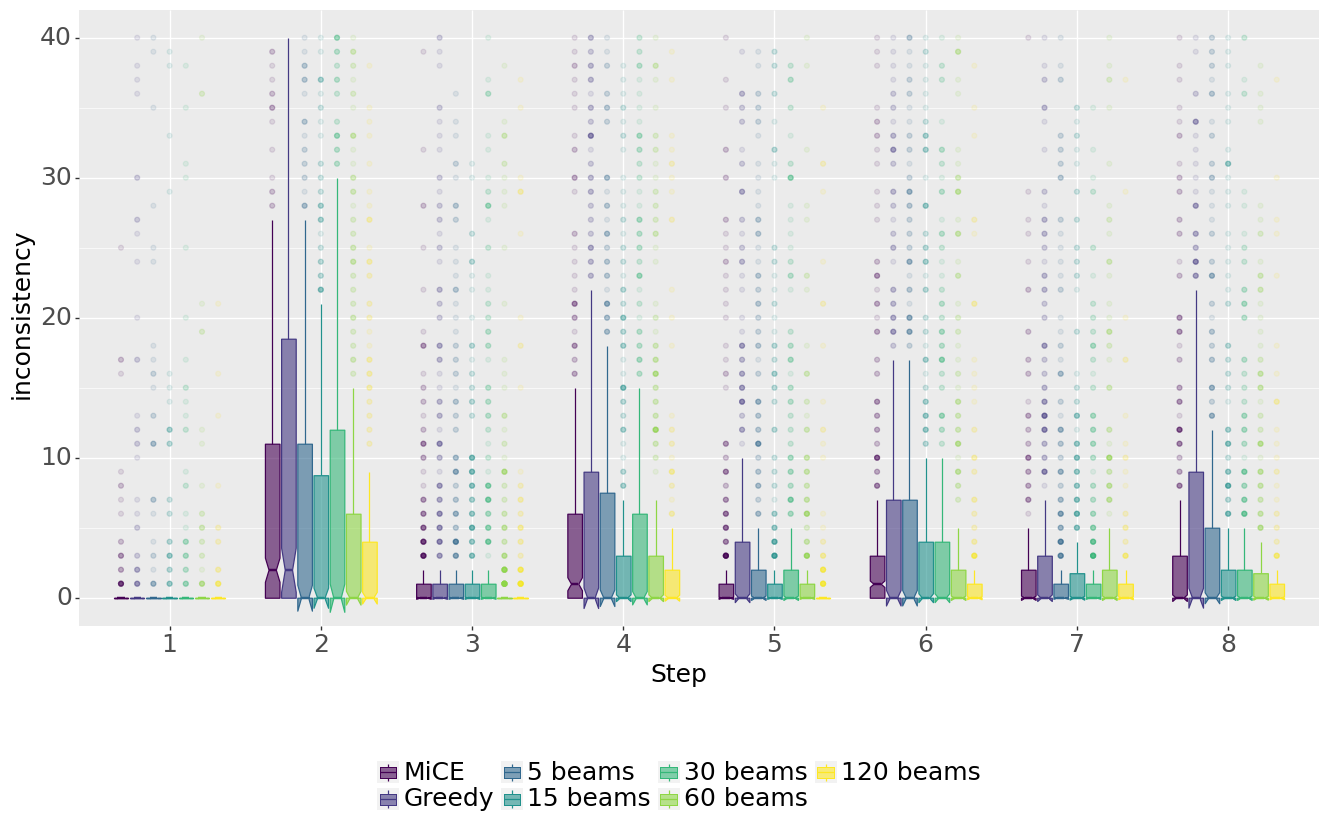

In [54]:
metric = "inconsistency"
dataset = "imdb"

print (f"Difference of inconsistency of {dataset} with different beams: ")

order_list = ["MiCE", "Greedy", "5 beams", "15 beams", "30 beams", "60 beams", "120 beams"]

df = to_ggplot([mice2, {k:v for k, v in mice_greedy.items() if k < 10}, {k:v for k, v in mice_beam5.items() if k < 10}, {k:v for k, v in mice_beam15.items() if k < 10}, {k:v for k, v in mice_beam30.items() if k < 10}, {k:v for k, v in mice_beam60.items() if k < 10}, {k:v for k, v in mice_beam120.items() if k < 10}], order_list, metric)

df['Editor'] = pd.Categorical(df['Editor'], categories=order_list, ordered=True)

gg = ggplot(df) + aes(x="Step", y= metric, color='Editor', fill ="Editor") + geom_boxplot(notch=True, outlier_alpha = 0.1, alpha = 0.6)+ylim(0,40)+theme(legend_direction='horizontal', legend_position=(.5, -.09), legend_title=element_blank(), text = element_text(size = 18)) + theme(figure_size=(16, 8))
print (gg)

In [55]:
metric="inconsistency"

print ("Inconsistency Table For MiCE with Beam Search")
print ("       Mice     MiCE Sample5      MiCE Greedy      Mice Beam5     Mice Beam15     Mice Beam30       Mice Beam60    Mice Beam120")
print ("----"*35)
    
print (f"                                                     imdb ")
print ("----"*35)

df = to_ggplot([ mice2, {k:v for k, v in mice_sample5.items() if k < 10}, {k:v for k, v in mice_greedy.items() if k < 10}, {k:v for k, v in mice_beam5.items() if k < 10},  {k:v for k, v in mice_beam15.items() if k < 10}, {k:v for k, v in mice_beam30.items() if k < 10}, {k:v for k, v in mice_beam60.items() if k < 10}, {k:v for k, v in mice_beam120.items() if k < 10}], ["mice", "mice_sample5", "mice_greedy", "mice_beam5", "mice_beam15", "mice_beam30",  "mice_beam60", "mice_beam120"], metric)

rows_beam = dict()

for step in [1,3,5,7,9]:
    l_editor = np.mean(df[(df["Editor"] == "mice") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    m_editor = np.mean(df[(df["Editor"] == "mice_sample5") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    k_editor = np.mean(df[(df["Editor"] == "mice_greedy") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    p_editor = np.mean(df[(df["Editor"] == "mice_beam5") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    v_editor = np.mean(df[(df["Editor"] == "mice_beam15") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    t_editor = np.mean(df[(df["Editor"] == "mice_beam30") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    mice_beam60_editor = np.mean(df[(df["Editor"] == "mice_beam60") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    mice_beam120_editor = np.mean(df[(df["Editor"] == "mice_beam120") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    
    l_editor = round(l_editor, 2)
    m_editor = round(m_editor, 2)
    k_editor = round(k_editor, 2)
    p_editor = round(p_editor, 2)
    v_editor = round(v_editor, 2)
    t_editor = round(t_editor, 2)
    mice_beam60_editor = round(mice_beam60_editor, 2)
    mice_beam120_editor = round(mice_beam120_editor, 2)
    rows_beam[step-1] = [l_editor, k_editor, p_editor, v_editor, t_editor, mice_beam60_editor, mice_beam120_editor]
    print (f"inc@{step}↑: {l_editor}\t\t{m_editor}\t\t{k_editor}\t\t{p_editor}\t\t{v_editor}\t\t{t_editor}\t\t{mice_beam60_editor}\t\t{mice_beam120_editor}")

print ("----"*35)

for step in [2,4,6,8]:
    l_editor = np.mean(df[(df["Editor"] == "mice") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    m_editor = np.mean(df[(df["Editor"] == "mice_sample5") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    k_editor = np.mean(df[(df["Editor"] == "mice_greedy") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    p_editor = np.mean(df[(df["Editor"] == "mice_beam5") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    v_editor = np.mean(df[(df["Editor"] == "mice_beam15") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    t_editor = np.mean(df[(df["Editor"] == "mice_beam30") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    mice_beam60_editor = np.mean(df[(df["Editor"] == "mice_beam60") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    mice_beam120_editor = np.mean(df[(df["Editor"] == "mice_beam120") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    
    l_editor = round(l_editor, 2)
    m_editor = round(m_editor, 2)
    k_editor = round(k_editor, 2)
    p_editor = round(p_editor, 2)
    v_editor = round(v_editor, 2)
    t_editor = round(t_editor, 2)
    mice_beam60_editor = round(mice_beam60_editor, 2)
    mice_beam120_editor = round(mice_beam120_editor, 2)
    rows_beam[step-1] = [l_editor, k_editor, p_editor, v_editor, t_editor, mice_beam60_editor, mice_beam120_editor]
    print (f"inc@{step}↑: {l_editor}\t\t{m_editor}\t\t{k_editor}\t\t{p_editor}\t\t{v_editor}\t\t{t_editor}\t\t{mice_beam60_editor}\t\t{mice_beam120_editor}")

print ("----"*35)

Inconsistency Table For MiCE with Beam Search
       Mice     MiCE Sample5      MiCE Greedy      Mice Beam5     Mice Beam15     Mice Beam30       Mice Beam60    Mice Beam120
--------------------------------------------------------------------------------------------------------------------------------------------
                                                     imdb 
--------------------------------------------------------------------------------------------------------------------------------------------
inc@1↑: 0.86		1.39		3.5		3.59		1.91		3.35		2.27		0.57
inc@3↑: 4.65		8.98		11.62		10.09		8.2		9.91		7.5		3.01
inc@5↑: 4.87		8.43		11.38		9.65		8.3		9.56		7.03		3.04
inc@7↑: 4.68		7.54		10.65		9.05		8.1		8.76		6.67		2.95
inc@9↑: 4.73		7.5		10.51		9.0		8.19		8.34		6.43		2.9
--------------------------------------------------------------------------------------------------------------------------------------------
inc@2↑: 5.95		10.01		13.73		11.75		9.25		11.85		8.78		3.29
inc@4↑: 5.4		

##### Newsgroups

In [56]:
news2 = load_pickle(f"Metrics\Inconsistency\\newsgroups_mice_gradient_inconsistency.pickle")
mice_greedy = load_pickle(f"Metrics\Inconsistency\\newsgroups_mice_greedy_inconsistency.pickle")
mice_beam5 = load_pickle(f"Metrics\Inconsistency\\newsgroups_mice_beam5_inconsistency.pickle")
mice_beam15 = load_pickle(f"Metrics\Inconsistency\\newsgroups_mice_beam15_inconsistency.pickle")
mice_beam30 = load_pickle(f"Metrics\Inconsistency\\newsgroups_mice_beam30_inconsistency.pickle")
mice_beam60 = load_pickle(f"Metrics\Inconsistency\\newsgroups_mice_beam60_inconsistency.pickle")
mice_beam120 = load_pickle(f"Metrics\Inconsistency\\newsgroups_mice_beam120_inconsistency.pickle")

Difference of inconsistency of imdb with different beams: 


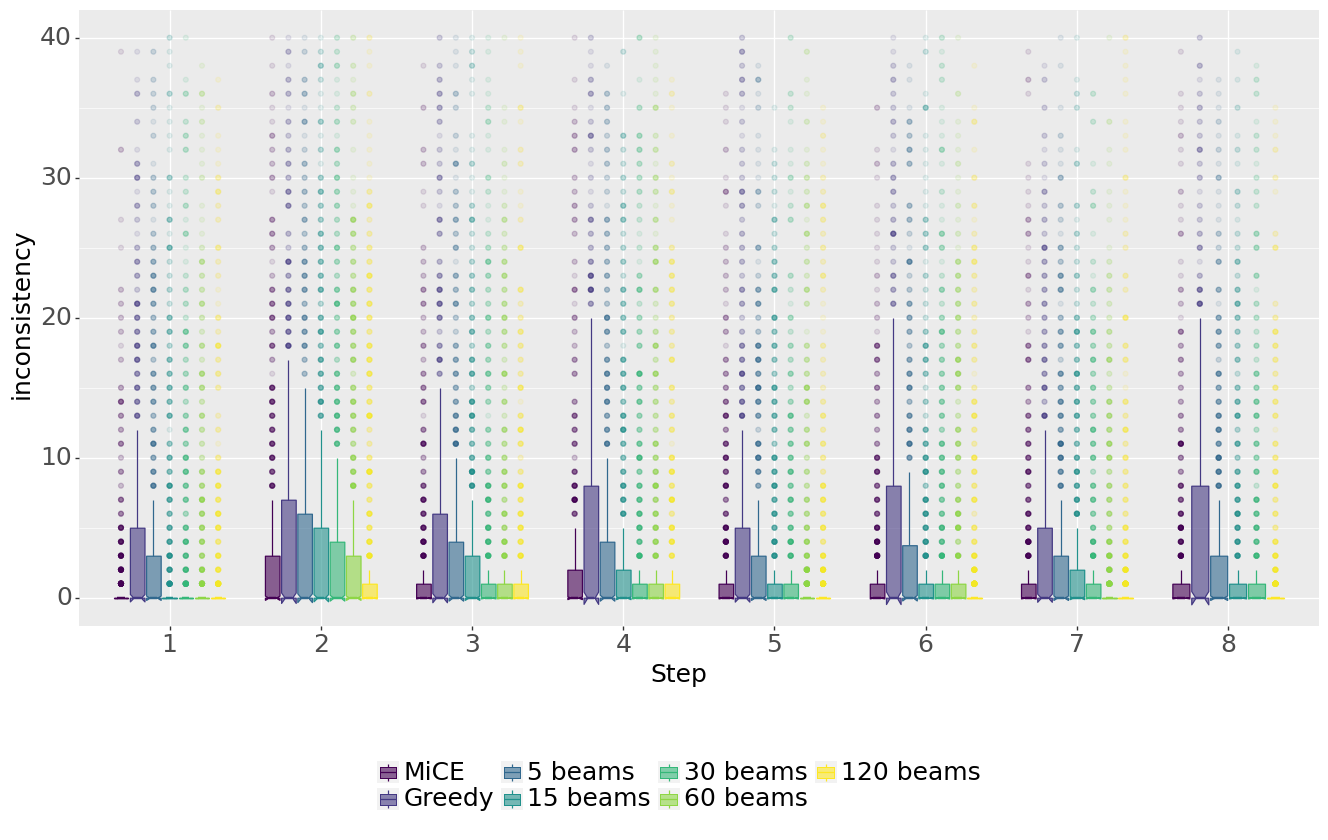

In [57]:
metric = "inconsistency"
dataset = "imdb"

print (f"Difference of inconsistency of {dataset} with different beams: ")

order_list = ["MiCE", "Greedy", "5 beams", "15 beams", "30 beams", "60 beams", "120 beams"]

df = to_ggplot([news2, {k:v for k, v in mice_greedy.items() if k < 10}, {k:v for k, v in mice_beam5.items() if k < 10}, {k:v for k, v in mice_beam15.items() if k < 10}, {k:v for k, v in mice_beam30.items() if k < 10}, {k:v for k, v in mice_beam60.items() if k < 10}, {k:v for k, v in mice_beam120.items() if k < 10}], order_list, metric)

df['Editor'] = pd.Categorical(df['Editor'], categories=order_list, ordered=True)

gg = ggplot(df) + aes(x="Step", y= metric, color='Editor', fill ="Editor") + geom_boxplot(notch=True, outlier_alpha = 0.1, alpha = 0.6)+ylim(0,40)+theme(legend_direction='horizontal', legend_position=(.5, -.09), legend_title=element_blank(), text = element_text(size = 18)) + theme(figure_size=(16, 8))
print (gg)

In [58]:
metric="inconsistency"

print ("Inconsistency Table For MiCE with Beam Search")
print ("       Mice      MiCE Greedy      Mice Beam5     Mice Beam15     Mice Beam30       Mice Beam60    Mice Beam120")
print ("----"*35)
    
print (f"                                                     newsgroups ")
print ("----"*35)

df = to_ggplot([ news2, {k:v for k, v in mice_greedy.items() if k < 10}, {k:v for k, v in mice_beam5.items() if k < 10},  {k:v for k, v in mice_beam15.items() if k < 10}, {k:v for k, v in mice_beam30.items() if k < 10}, {k:v for k, v in mice_beam60.items() if k < 10}, {k:v for k, v in mice_beam120.items() if k < 10}], ["mice", "mice_greedy", "mice_beam5", "mice_beam15", "mice_beam30",  "mice_beam60", "mice_beam120"], metric)

newsgroups_beam = dict()

for step in [1,3,5,7,9]:
    l_editor = np.mean(df[(df["Editor"] == "mice") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    k_editor = np.mean(df[(df["Editor"] == "mice_greedy") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    p_editor = np.mean(df[(df["Editor"] == "mice_beam5") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    v_editor = np.mean(df[(df["Editor"] == "mice_beam15") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    t_editor = np.mean(df[(df["Editor"] == "mice_beam30") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    mice_beam60_editor = np.mean(df[(df["Editor"] == "mice_beam60") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    mice_beam120_editor = np.mean(df[(df["Editor"] == "mice_beam120") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    
    l_editor = round(l_editor, 2)
    k_editor = round(k_editor, 2)
    p_editor = round(p_editor, 2)
    v_editor = round(v_editor, 2)
    t_editor = round(t_editor, 2)
    mice_beam60_editor = round(mice_beam60_editor, 2)
    mice_beam120_editor = round(mice_beam120_editor, 2)
    newsgroups_beam[step-1] = [l_editor, k_editor, p_editor, v_editor, t_editor, mice_beam60_editor, mice_beam120_editor]
    print (f"inc@{step}↑: {l_editor}\t\t{k_editor}\t\t{p_editor}\t\t{v_editor}\t\t{t_editor}\t\t{mice_beam60_editor}\t\t{mice_beam120_editor}")

print ("----"*35)

for step in [2,4,6,8]:
    l_editor = np.mean(df[(df["Editor"] == "mice") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    k_editor = np.mean(df[(df["Editor"] == "mice_greedy") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    p_editor = np.mean(df[(df["Editor"] == "mice_beam5") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    v_editor = np.mean(df[(df["Editor"] == "mice_beam15") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    t_editor = np.mean(df[(df["Editor"] == "mice_beam30") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    mice_beam60_editor = np.mean(df[(df["Editor"] == "mice_beam60") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    mice_beam120_editor = np.mean(df[(df["Editor"] == "mice_beam120") & (df["Step"].isin([str(i) for i in range (step+1)]))][metric])
    
    l_editor = round(l_editor, 2)
    k_editor = round(k_editor, 2)
    p_editor = round(p_editor, 2)
    v_editor = round(v_editor, 2)
    t_editor = round(t_editor, 2)
    mice_beam60_editor = round(mice_beam60_editor, 2)
    mice_beam120_editor = round(mice_beam120_editor, 2)
    newsgroups_beam[step-1] = [l_editor, k_editor, p_editor, v_editor, t_editor, mice_beam60_editor, mice_beam120_editor]
    print (f"inc@{step}↑: {l_editor}\t\t{k_editor}\t\t{p_editor}\t\t{v_editor}\t\t{t_editor}\t\t{mice_beam60_editor}\t\t{mice_beam120_editor}")

print ("----"*35)

Inconsistency Table For MiCE with Beam Search
       Mice      MiCE Greedy      Mice Beam5     Mice Beam15     Mice Beam30       Mice Beam60    Mice Beam120
--------------------------------------------------------------------------------------------------------------------------------------------
                                                     newsgroups 
--------------------------------------------------------------------------------------------------------------------------------------------
inc@1↑: 1.23		4.32		3.64		3.04		2.74		2.36		2.13
inc@3↑: 2.44		5.18		4.31		3.83		3.43		3.21		2.67
inc@5↑: 2.46		5.29		4.24		3.69		3.23		3.09		2.48
inc@7↑: 2.42		5.26		4.07		3.45		3.04		2.9		2.35
inc@9↑: 2.42		5.33		3.99		3.38		2.98		2.9		2.31
--------------------------------------------------------------------------------------------------------------------------------------------
inc@2↑: 2.53		5.19		4.41		3.97		3.69		3.52		2.88
inc@4↑: 2.47		5.4		4.37		3.75		3.44		3.25		2.61
inc@6↑: 2.42		5

In [59]:
latex = create_latex_table("inc", ["MiCE", "Greedy", "5 beams", "15 beams", "30 beams", "60 beams", "120 beams"], rows_beam, newsgroups_beam)
print(latex)

\begin{table}[H]
\begin{adjustwidth}{0in}{0in}
\centering
\begin{tabular}{c|ccccccc}
\hline
\multirow{1}{*}{\textbf{}} & \multicolumn{7}{c}{\textbf{IMDb}} \\ \cline{2-8}
& \textbf{MiCE} & \textbf{Greedy} & \textbf{5 beams} & \textbf{15 beams} & \textbf{30 beams} & \textbf{60 beams} & \textbf{120 beams} \\ \hline
\textbf{inc@1↑} & 0.86  & 3.5  & \textbf{3.59}  & 1.91  & 3.35  & 2.27  & 0.57  \\
\textbf{inc@2↑} & 5.95  & \textbf{13.73}  & 11.75  & 9.25  & 11.85  & 8.78  & 3.29  \\
\textbf{inc@9↑} & 4.73  & \textbf{10.51}  & 9.0  & 8.19  & 8.34  & 6.43  & 2.9  \\
\hline
\multirow{1}{*}{\textbf{}} & \multicolumn{7}{c}{\textbf{NewsGroups}} \\ \cline{2-8}
\textbf{inc@1↑} & 1.23  & \textbf{4.32}  & 3.64  & 3.04  & 2.74  & 2.36  & 2.13  \\
\textbf{inc@2↑} & 2.53  & \textbf{5.19}  & 4.41  & 3.97  & 3.69  & 3.52  & 2.88  \\
\textbf{inc@9↑} & 2.42  & \textbf{5.33}  & 3.99  & 3.38  & 2.98  & 2.9  & 2.31  \\
\hline
\end{tabular}
\\
\caption{}
\label{fig:}
\end{adjustwidth}
\end{table}


# Base Perplexity

Base Perplexity: imdb: 


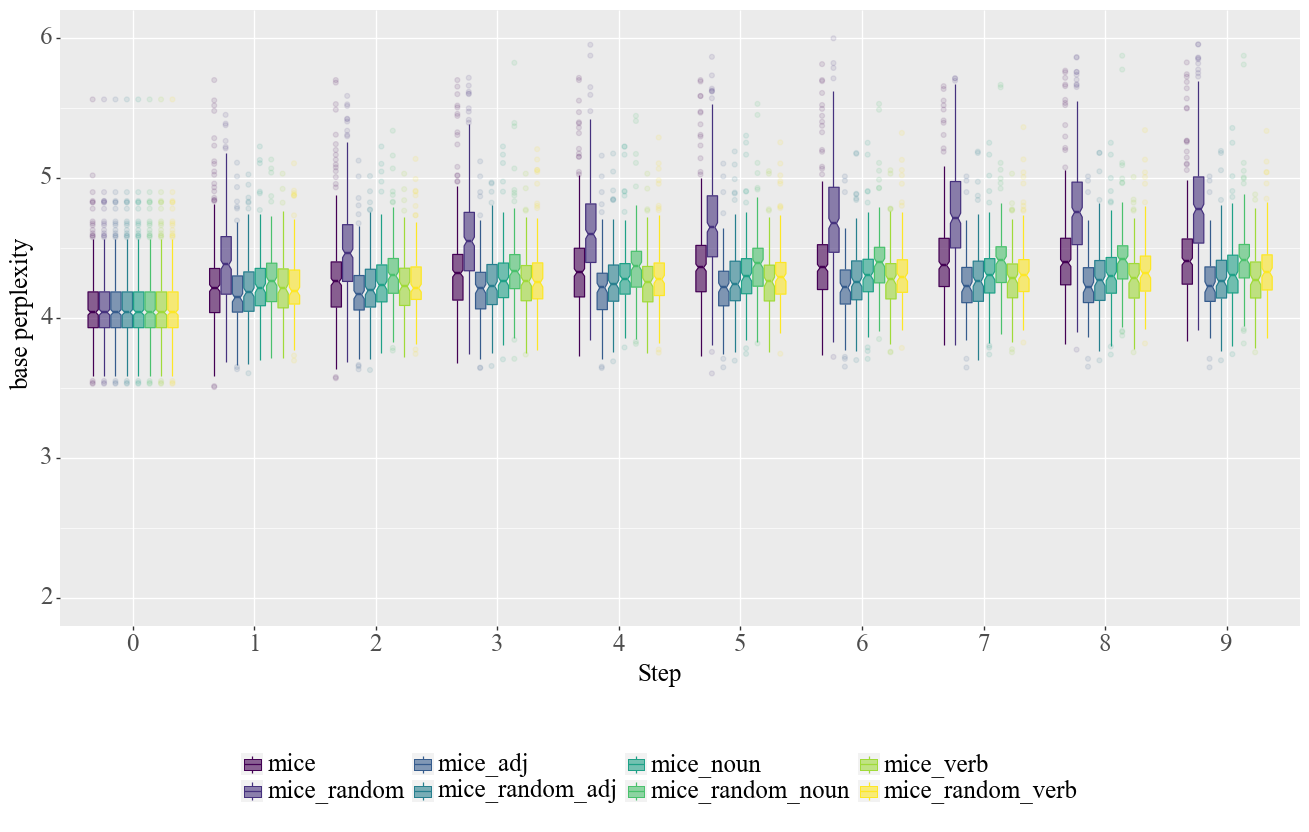


Base Perplexity for imdb dataset:
mice_adj, perplexity@1: 4.17476462572813
mice_noun, perplexity@1: 4.27795151869456
mice_verb, perplexity@1: 4.259858841087386
mice_random_adj, perplexity@1: 4.196782524905988
mice_random_noun, perplexity@1: 4.304643199851476
mice_random_verb, perplexity@1: 4.263930095945086
********************
mice_adj, perplexity@9: 4.249308635141248
mice_noun, perplexity@9: 4.338273419274224
mice_verb, perplexity@9: 4.315362152300383
mice_random_adj, perplexity@9: 4.293513426306652
mice_random_noun, perplexity@9: 4.434547938127569
mice_random_verb, perplexity@9: 4.348413278471749
********************
----------------------------------------


In [60]:
import matplotlib.text
import numpy as np
metric = "perplexity"
dataset = "imdb"


print (f"Base Perplexity: {dataset}: ")
mice = np.load(f"Metrics/Base Perplexity/ppl_{dataset}_mice_gpt2.npy")
mice_random = np.load(f"Metrics\Base Perplexity\ppl_imdb_500_random_gpt2.npy")
mice_adj = np.load(f"Metrics\Base Perplexity\ppl_imdb_mice_adj_base.npy")
mice_random_adj = np.load(f"Metrics\Base Perplexity\ppl_imdb_500_random_adj_gpt2.npy")
mice_noun = np.load(f"Metrics\Base Perplexity\ppl_imdb_mice_noun_base.npy")
mice_random_noun = np.load(f"Metrics\Base Perplexity\ppl_imdb_500_random_noun_base.npy")
mice_verb = np.load(f"Metrics\Base Perplexity\ppl_imdb_mice_verb_base.npy")
mice_random_verb = np.load(f"Metrics\Base Perplexity\ppl_imdb_500_random_verb_gpt2.npy")

order_list = ["mice", "mice_random", "mice_adj", "mice_random_adj", "mice_noun", "mice_random_noun", "mice_verb", "mice_random_verb"]

mice = {i: [j for j in row if j != 0]  for i, row in enumerate(mice.T)}
mice_random = {i: [j for j in row if j != 0]  for i, row in enumerate(mice_random.T)}
mice_adj = {i: [j for j in row if j != 0]  for i, row in enumerate(mice_adj.T)}
mice_random_adj = {i: [j for j in row if j != 0]  for i, row in enumerate(mice_random_adj.T)}
mice_noun = {i: [j for j in row if j != 0]  for i, row in enumerate(mice_noun.T)}
mice_random_noun = {i: [j for j in row if j != 0]  for i, row in enumerate(mice_random_noun.T)}
mice_verb = {i: [j for j in row if j != 0]  for i, row in enumerate(mice_verb.T)}
mice_random_verb = {i: [j for j in row if j != 0]  for i, row in enumerate(mice_random_verb.T)}

df = to_ggplot([mice,  mice_random, mice_adj, mice_random_adj, mice_noun, mice_random_noun, mice_verb, mice_random_verb], ["mice", "mice_random", "mice_adj", "mice_random_adj", "mice_noun", "mice_random_noun", "mice_verb", "mice_random_verb"], metric)

df['Editor'] = pd.Categorical(df['Editor'], categories=order_list, ordered=True)

gg = ggplot(df) + aes(x="Step",y= metric, color='Editor', fill ="Editor") + ylim(2,6) + geom_boxplot(notch=True,outlier_alpha = 0.1, alpha = 0.6)+theme(legend_direction='horizontal', legend_position=(.5, -.08), legend_title=element_blank(), text = element_text(family='serif',size = 18)) + ylab("base perplexity") + theme(figure_size=(16, 8))
print (gg)

print (f"Base Perplexity for {dataset} dataset:")
imdb_mice = dict()
imdb_mice[1] = []
imdb_mice[9] = []
latex_order_list = ["mice_adj", "mice_noun", "mice_verb", "mice_random_adj", "mice_random_noun", "mice_random_verb"]
for step in ["1", "9"]:
    for editor in latex_order_list:
        value = np.mean(df[(df["Editor"] == editor) & (df["Step"] == step)][metric])
        print (f"{editor}, {metric}@{step}: {value}")
        imdb_mice[int(step)].append(round(value,4))
    print ("**"*10)
print ("----"*10)

Base Perplexity: newsgroups: 


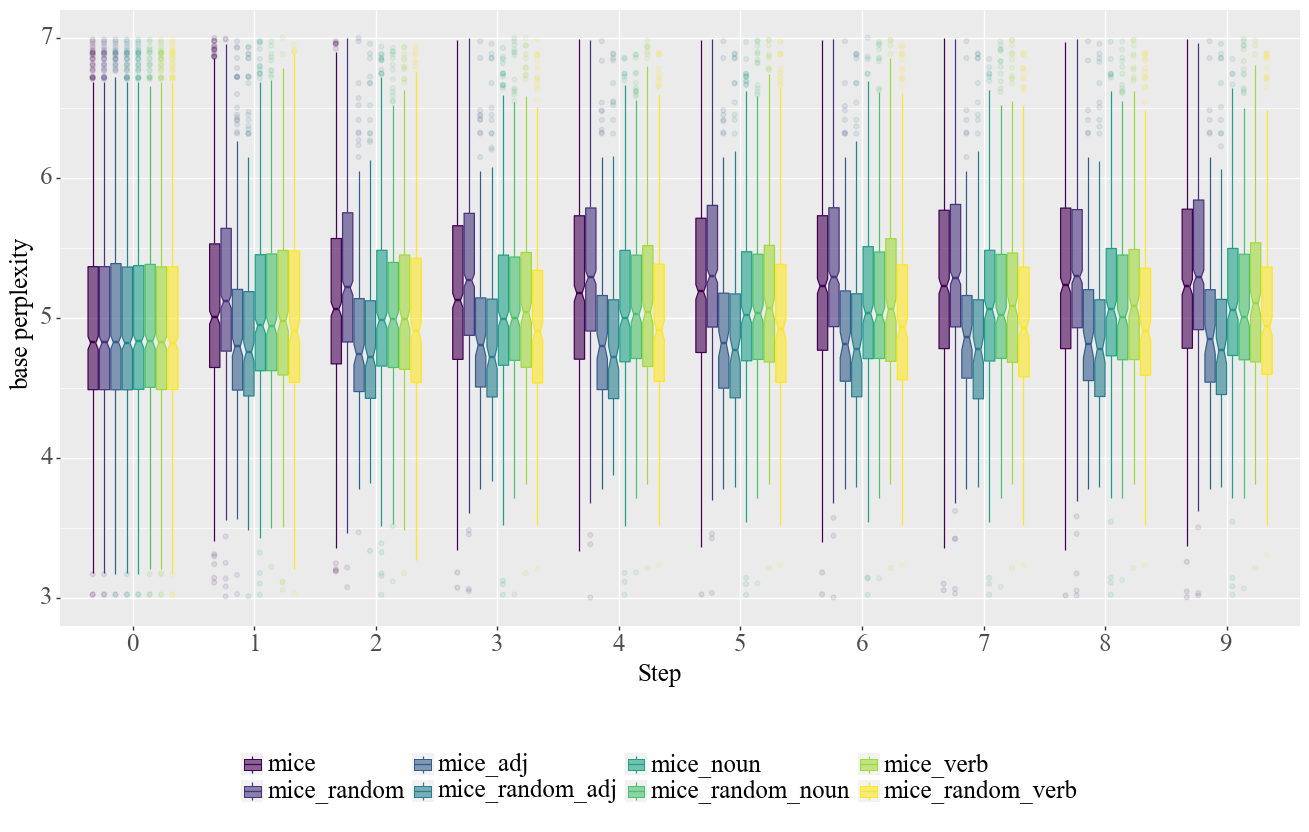


Base Perplexity for newsgroups dataset:
mice_adj, perplexity@1: 5.331042533697084
mice_noun, perplexity@1: 5.451697965608026
mice_verb, perplexity@1: 5.520282391409517
mice_random_adj, perplexity@1: 5.28632376514264
mice_random_noun, perplexity@1: 5.513695737731132
mice_random_verb, perplexity@1: 5.3992983046542395
********************
mice_adj, perplexity@9: 5.346482894897461
mice_noun, perplexity@9: 5.44371212720871
mice_verb, perplexity@9: 5.486398731594655
mice_random_adj, perplexity@9: 5.236809779476646
mice_random_noun, perplexity@9: 5.281179531709648
mice_random_verb, perplexity@9: 5.293975989739816
********************
----------------------------------------


In [61]:
import matplotlib.text
metric = "perplexity"
dataset = "newsgroups"


print (f"Base Perplexity: {dataset}: ")
mice = np.load(f"Metrics/Base Perplexity/ppl_{dataset}_mice_gradient_base.npy")
mice_random = np.load(f"Metrics\Base Perplexity\ppl_newsgroups_mice_random_base.npy")
mice_adj = np.load(f"Metrics\Base Perplexity\ppl_newsgroups_mice_grad_adj_new_base.npy")
mice_random_adj = np.load(f"Metrics\Base Perplexity\ppl_newsgroups_mice_random_adj_base.npy")
mice_noun = np.load(f"Metrics\Base Perplexity\ppl_newsgroups_mice_grad_noun_new_base.npy")
mice_random_noun = np.load(f"Metrics\Base Perplexity\ppl_newsgroups_mice_random_noun_base.npy")
mice_verb = np.load(f"Metrics\Base Perplexity\ppl_newsgroups_mice_grad_verb_new_base.npy")
mice_random_verb = np.load(f"Metrics\Base Perplexity\ppl_newsgroups_mice_random_verb_base.npy")

order_list = ["mice", "mice_random", "mice_adj", "mice_random_adj", "mice_noun", "mice_random_noun", "mice_verb", "mice_random_verb"]

mice = {i: [j for j in row if j != 0]  for i, row in enumerate(mice.T)}
mice_random = {i: [j for j in row if j != 0]  for i, row in enumerate(mice_random.T)}
mice_adj = {i: [j for j in row if j != 0]  for i, row in enumerate(mice_adj.T)}
mice_random_adj = {i: [j for j in row if j != 0]  for i, row in enumerate(mice_random_adj.T)}
mice_noun = {i: [j for j in row if j != 0]  for i, row in enumerate(mice_noun.T)}
mice_random_noun = {i: [j for j in row if j != 0]  for i, row in enumerate(mice_random_noun.T)}
mice_verb = {i: [j for j in row if j != 0]  for i, row in enumerate(mice_verb.T)}
mice_random_verb = {i: [j for j in row if j != 0]  for i, row in enumerate(mice_random_verb.T)}

df = to_ggplot([mice,  mice_random, mice_adj, mice_random_adj, mice_noun, mice_random_noun, mice_verb, mice_random_verb], ["mice", "mice_random", "mice_adj", "mice_random_adj", "mice_noun", "mice_random_noun", "mice_verb", "mice_random_verb"], metric)

df['Editor'] = pd.Categorical(df['Editor'], categories=order_list, ordered=True)

gg = ggplot(df) + aes(x="Step",y= metric, color='Editor', fill ="Editor") + ylim(3,7) + geom_boxplot(notch=True,outlier_alpha = 0.1, alpha = 0.6)+theme(legend_direction='horizontal', legend_position=(.5, -.08), legend_title=element_blank(), text = element_text(family='serif',size = 18)) + ylab("base perplexity") + theme(figure_size=(16, 8))
print (gg)

print (f"Base Perplexity for {dataset} dataset:")
mice_news = dict()
mice_news[1] = []
mice_news[9] = []
latex_order_list = ["mice_adj", "mice_noun", "mice_verb", "mice_random_adj", "mice_random_noun", "mice_random_verb"]
for step in ["1", "9"]:
    for editor in latex_order_list:
        value = np.mean(df[(df["Editor"] == editor) & (df["Step"] == step)][metric])
        print (f"{editor}, {metric}@{step}: {value}")
        mice_news[int(step)].append(round(value,4))
    print ("**"*10)
print ("----"*10)

### Polyjuice

Base Perplexity imdb: 


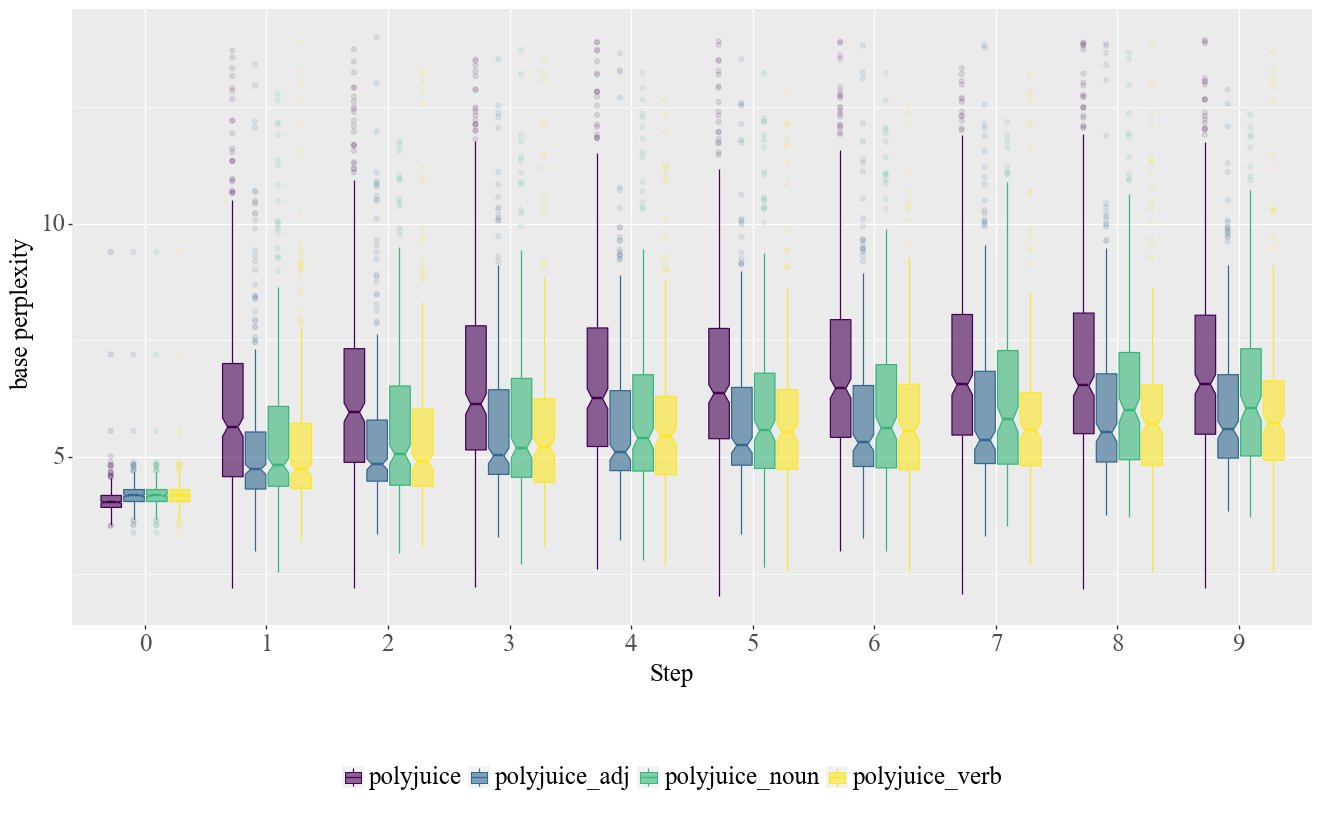


Base Perplexity for imdb dataset:
polyjuice_adj, base perplexity@1: 5.525227934763982
polyjuice_noun, base perplexity@1: 5.973672542217615
polyjuice_verb, base perplexity@1: 6.061540625103033
********************
polyjuice_adj, base perplexity@9: 6.817820567965009
polyjuice_noun, base perplexity@9: 6.942618032811219
polyjuice_verb, base perplexity@9: 6.918958866707633
********************
----------------------------------------


In [62]:
import matplotlib.text
metric = "base perplexity"
dataset = "imdb"


print (f"Base Perplexity {dataset}: ")
polyjuice = np.load(f"Metrics\Base Perplexity\ppl_imdb_polyjuice_gpt2.npy")
polyjuice_adj = np.load(f"Metrics\Base Perplexity\ppl_imdb_polyjuice_random_adj_base.npy")
polyjuice_noun= np.load("Metrics\Base Perplexity\ppl_imdb_polyjuice_random_noun_base.npy")
polyjuice_verb = np.load(f"Metrics\Base Perplexity\ppl_imdb_polyjuice_random_verb_base.npy")

order_list = ["polyjuice", "polyjuice_adj", "polyjuice_noun", "polyjuice_verb"]

polyjuice = {i: [j for j in row if j != 0]  for i, row in enumerate(polyjuice.T)}
polyjuice_adj = {i: [j for j in row if j != 0]  for i, row in enumerate(polyjuice_adj.T)}
polyjuice_noun = {i: [j for j in row if j != 0]  for i, row in enumerate(polyjuice_noun.T)}
polyjuice_verb = {i: [j for j in row if j != 0]  for i, row in enumerate(polyjuice_verb.T)}

df = to_ggplot([polyjuice, polyjuice_adj, polyjuice_noun, polyjuice_verb], ["polyjuice", "polyjuice_adj", "polyjuice_noun", "polyjuice_verb"], metric)

df['Editor'] = pd.Categorical(df['Editor'], categories=order_list, ordered=True)

gg = ggplot(df) + aes(x="Step",y= metric, color='Editor', fill ="Editor") + ylim(2,14) + geom_boxplot(notch=True,outlier_alpha = 0.1, alpha = 0.6)+theme(legend_direction='horizontal', legend_position=(.5, -.08), legend_title=element_blank(), text = element_text(family='serif',size = 18)) + ylab("base perplexity") + theme(figure_size=(16, 8))

print (gg)

print (f"Base Perplexity for {dataset} dataset:")
latex_order_list = ["polyjuice_adj", "polyjuice_noun", "polyjuice_verb"]
for step in ["1", "9"]:
    for editor in latex_order_list:
        value = np.mean(df[(df["Editor"] == editor) & (df["Step"] == step)][metric])
        print (f"{editor}, {metric}@{step}: {value}")
        imdb_mice[int(step)].append(round(value,4))
    print ("**"*10)
print ("----"*10)

Base Perplexity newsgroups: 


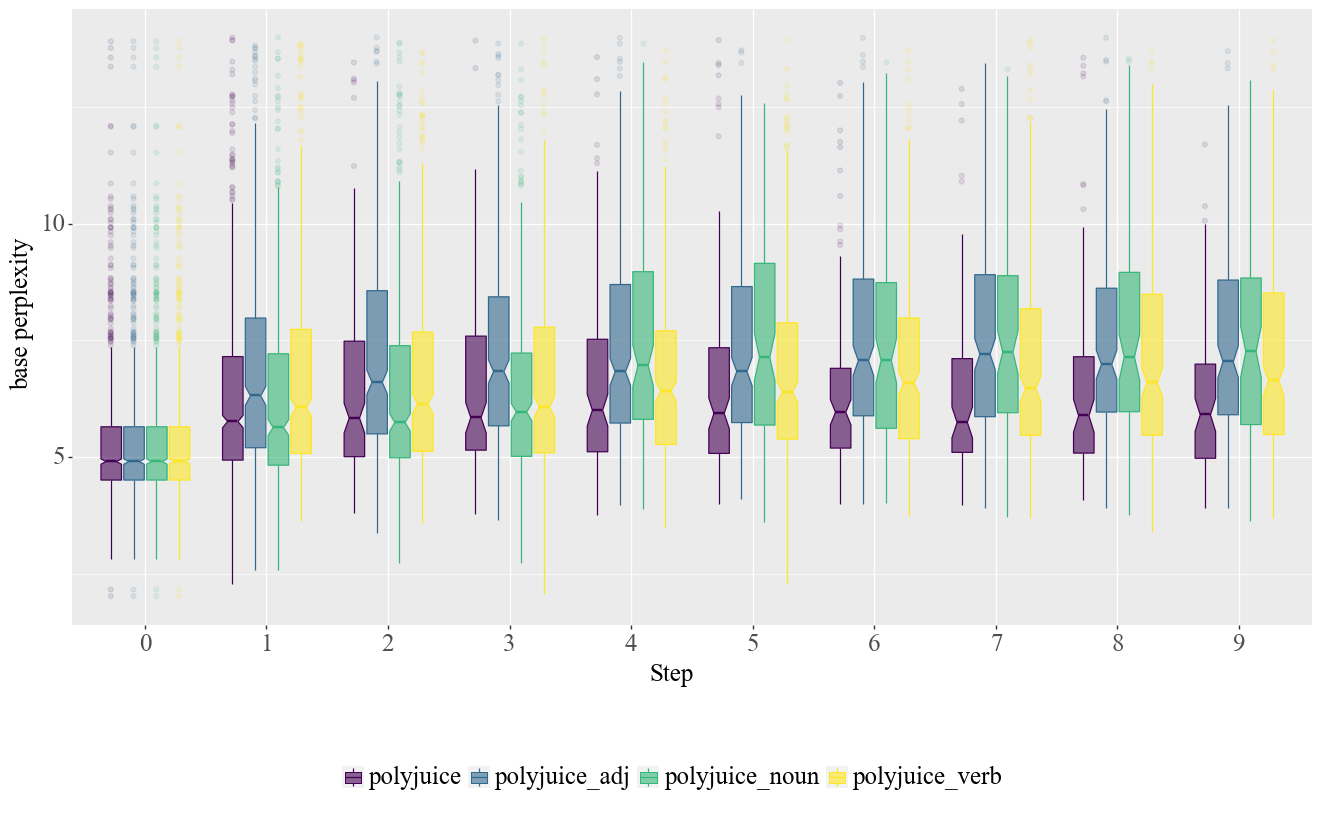


Base Perplexity for newsgroups dataset:
polyjuice_adj, base perplexity@1: 8.265567176290888
polyjuice_noun, base perplexity@1: 7.48417838924336
polyjuice_verb, base perplexity@1: 7.941273429961432
********************
polyjuice_adj, base perplexity@9: 9.257159058580694
polyjuice_noun, base perplexity@9: 8.752647038344499
polyjuice_verb, base perplexity@9: 8.539168338543973
********************
----------------------------------------


In [63]:
import matplotlib.text
metric = "base perplexity"
dataset = "newsgroups"


print (f"Base Perplexity {dataset}: ")
polyjuice = np.load(f"Metrics\Base Perplexity\ppl_newsgroups_polyjuice_random_base.npy")
polyjuice_adj = np.load(f"Metrics\Base Perplexity\ppl_newsgroups_polyjuice_adj_base.npy")
polyjuice_noun= np.load("Metrics\Base Perplexity\ppl_newsgroups_polyjuice_noun_base.npy")
polyjuice_verb = np.load(f"Metrics\Base Perplexity\ppl_newsgroups_polyjuice_verb_base.npy")

order_list = ["polyjuice", "polyjuice_adj", "polyjuice_noun", "polyjuice_verb"]

polyjuice = {i: [j for j in row if j != 0]  for i, row in enumerate(polyjuice.T)}
polyjuice_adj = {i: [j for j in row if j != 0]  for i, row in enumerate(polyjuice_adj.T)}
polyjuice_noun = {i: [j for j in row if j != 0]  for i, row in enumerate(polyjuice_noun.T)}
polyjuice_verb = {i: [j for j in row if j != 0]  for i, row in enumerate(polyjuice_verb.T)}

df = to_ggplot([polyjuice, polyjuice_adj, polyjuice_noun, polyjuice_verb], ["polyjuice", "polyjuice_adj", "polyjuice_noun", "polyjuice_verb"], metric)

df['Editor'] = pd.Categorical(df['Editor'], categories=order_list, ordered=True)

gg = ggplot(df) + aes(x="Step",y= metric, color='Editor', fill ="Editor") + ylim(2,14) + geom_boxplot(notch=True,outlier_alpha = 0.1, alpha = 0.6)+theme(legend_direction='horizontal', legend_position=(.5, -.08), legend_title=element_blank(), text = element_text(family='serif',size = 18)) + ylab("base perplexity") + theme(figure_size=(16, 8))

print (gg)

print (f"Base Perplexity for {dataset} dataset:")
latex_order_list = ["polyjuice_adj", "polyjuice_noun", "polyjuice_verb"]
for step in ["1", "9"]:
    for editor in latex_order_list:
        value = np.mean(df[(df["Editor"] == editor) & (df["Step"] == step)][metric])
        print (f"{editor}, {metric}@{step}: {value}")
        mice_news[int(step)].append(round(value,4))
    print ("**"*10)
print ("----"*10)

### Textfooler

Base Perplexity imdb: 


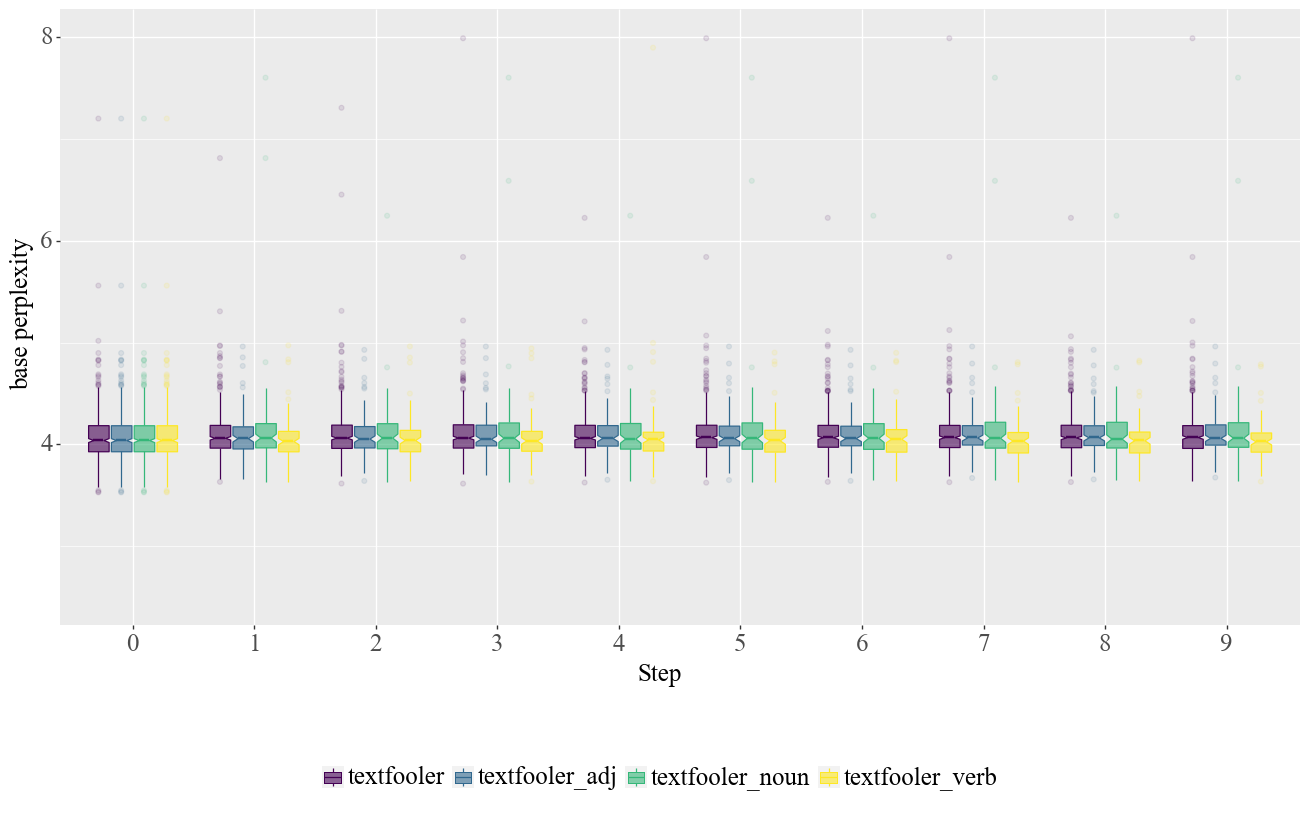


Base Perplexity for imdb dataset:
textfooler_adj, base perplexity@1: 4.09103663977202
textfooler_noun, base perplexity@1: 4.149090205629666
textfooler_verb, base perplexity@1: 4.116605441547135
********************
textfooler_adj, base perplexity@9: 4.099963190378966
textfooler_noun, base perplexity@9: 4.146321527659893
textfooler_verb, base perplexity@9: 4.043992589931099
********************
----------------------------------------


In [64]:
import matplotlib.text
metric = "base perplexity"
dataset = "imdb"


print (f"Base Perplexity {dataset}: ")
textfooler = np.load(f"Metrics\Base Perplexity\ppl_imdb_textfooler_gpt2.npy")
textfooler_adj = np.load(f"Metrics\Base Perplexity\ppl_imdb_textfooler_ADJ_base.npy")
textfooler_noun= np.load("Metrics\Base Perplexity\ppl_imdb_textfooler_NOUN_base.npy")
textfooler_verb = np.load(f"Metrics\Base Perplexity\ppl_imdb_textfooler_VERB_base.npy")

order_list = ["textfooler", "textfooler_adj", "textfooler_noun", "textfooler_verb"]

textfooler = {i: [j for j in row if j != 0]  for i, row in enumerate(textfooler.T)}
textfooler_adj = {i: [j for j in row if j != 0]  for i, row in enumerate(textfooler_adj.T)}
textfooler_noun = {i: [j for j in row if j != 0]  for i, row in enumerate(textfooler_noun.T)}
textfooler_verb = {i: [j for j in row if j != 0]  for i, row in enumerate(textfooler_verb.T)}

df = to_ggplot([textfooler, textfooler_adj, textfooler_noun, textfooler_verb], ["textfooler", "textfooler_adj", "textfooler_noun", "textfooler_verb"], metric)

df['Editor'] = pd.Categorical(df['Editor'], categories=order_list, ordered=True)

gg = ggplot(df) + aes(x="Step",y= metric, color='Editor', fill ="Editor") + ylim(2.5,8) + geom_boxplot(notch=True,outlier_alpha = 0.1, alpha = 0.6)+theme(legend_direction='horizontal', legend_position=(.5, -.08), legend_title=element_blank(), text = element_text(family='serif',size = 18)) + ylab("base perplexity") + theme(figure_size=(16, 8))

print (gg)

print (f"Base Perplexity for {dataset} dataset:")
latex_order_list = ["textfooler_adj", "textfooler_noun", "textfooler_verb"]
for step in ["1", "9"]:
    for editor in latex_order_list:
        value = np.mean(df[(df["Editor"] == editor) & (df["Step"] == step)][metric])
        print (f"{editor}, {metric}@{step}: {value}")
        imdb_mice[int(step)].append(round(value,4))
    print ("**"*10)
print ("----"*10)

Base Perplexity newsgroups: 


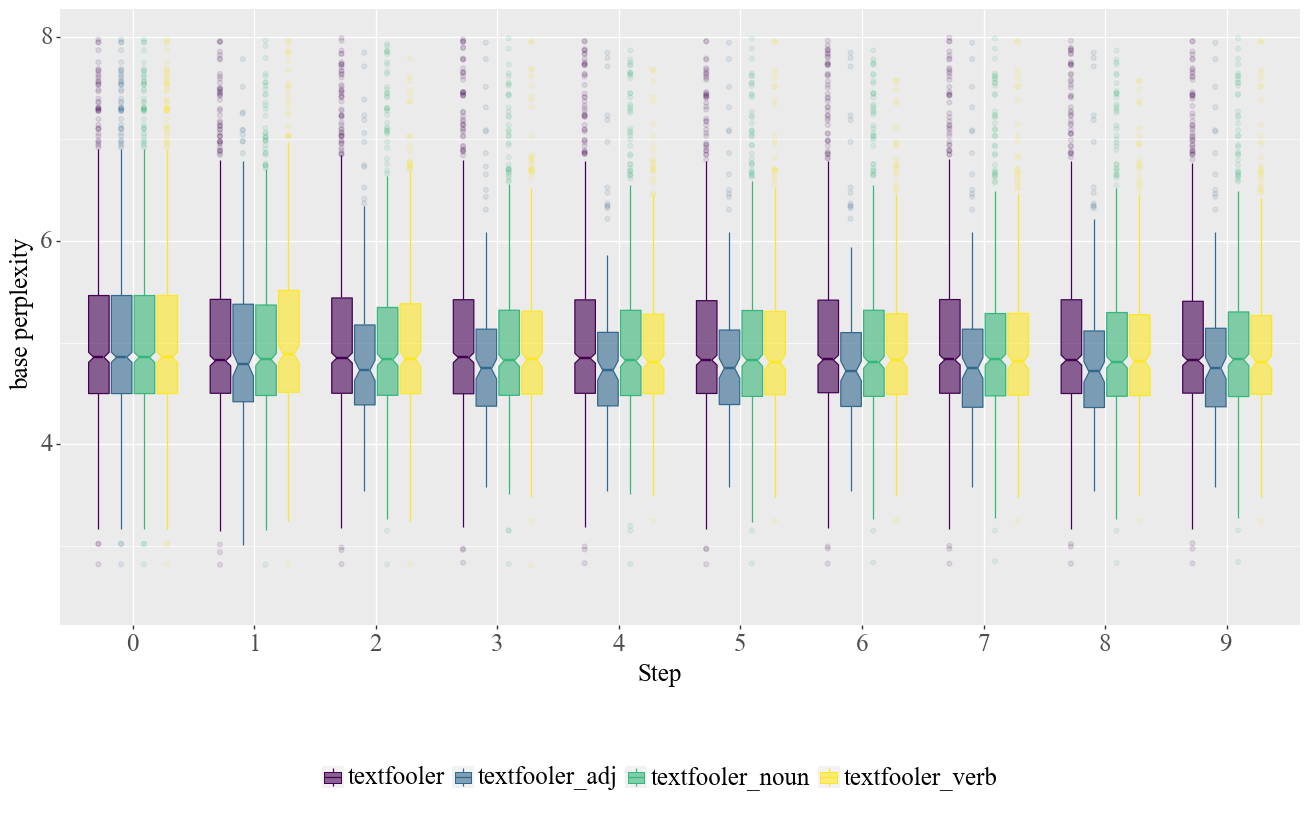


Base Perplexity for newsgroups dataset:
textfooler_adj, base perplexity@1: 5.303431612189098
textfooler_noun, base perplexity@1: 5.240467785136126
textfooler_verb, base perplexity@1: 5.379737076607157
********************
textfooler_adj, base perplexity@9: 5.086171655388145
textfooler_noun, base perplexity@9: 5.149459003743546
textfooler_verb, base perplexity@9: 5.224256356069647
********************
----------------------------------------


In [65]:
import matplotlib.text
metric = "base perplexity"
dataset = "newsgroups"


print (f"Base Perplexity {dataset}: ")
textfooler = np.load(f"Metrics\Base Perplexity\ppl_newsgroups_textfooler_allennlp_base.npy")
textfooler_adj = np.load(f"Metrics\Base Perplexity\ppl_newsgroups_textfooler_ADJ_base.npy")
textfooler_noun= np.load("Metrics\Base Perplexity\ppl_newsgroups_textfooler_NOUN_base.npy")
textfooler_verb = np.load(f"Metrics\Base Perplexity\ppl_newsgroups_textfooler_VERB_base.npy")

order_list = ["textfooler", "textfooler_adj", "textfooler_noun", "textfooler_verb"]

textfooler = {i: [j for j in row if j != 0]  for i, row in enumerate(textfooler.T)}
textfooler_adj = {i: [j for j in row if j != 0]  for i, row in enumerate(textfooler_adj.T)}
textfooler_noun = {i: [j for j in row if j != 0]  for i, row in enumerate(textfooler_noun.T)}
textfooler_verb = {i: [j for j in row if j != 0]  for i, row in enumerate(textfooler_verb.T)}

df = to_ggplot([textfooler, textfooler_adj, textfooler_noun, textfooler_verb], ["textfooler", "textfooler_adj", "textfooler_noun", "textfooler_verb"], metric)

df['Editor'] = pd.Categorical(df['Editor'], categories=order_list, ordered=True)

gg = ggplot(df) + aes(x="Step",y= metric, color='Editor', fill ="Editor") + ylim(2.5,8) + geom_boxplot(notch=True,outlier_alpha = 0.1, alpha = 0.6)+theme(legend_direction='horizontal', legend_position=(.5, -.08), legend_title=element_blank(), text = element_text(family='serif',size = 18)) + ylab("base perplexity") + theme(figure_size=(16, 8))

print (gg)

print (f"Base Perplexity for {dataset} dataset:")
latex_order_list = ["textfooler_adj", "textfooler_noun", "textfooler_verb"]
for step in ["1", "9"]:
    for editor in latex_order_list:
        value = np.mean(df[(df["Editor"] == editor) & (df["Step"] == step)][metric])
        print (f"{editor}, {metric}@{step}: {value}")
        mice_news[int(step)].append(round(value,4))
    print ("**"*10)
print ("----"*10)

In [66]:
latex = create_latex_table_ppl_pos("ppl-base", mice_imdb, mice_news)

NameError: name 'mice_imdb' is not defined

### Beam-search

Base Perplexity: imdb: 


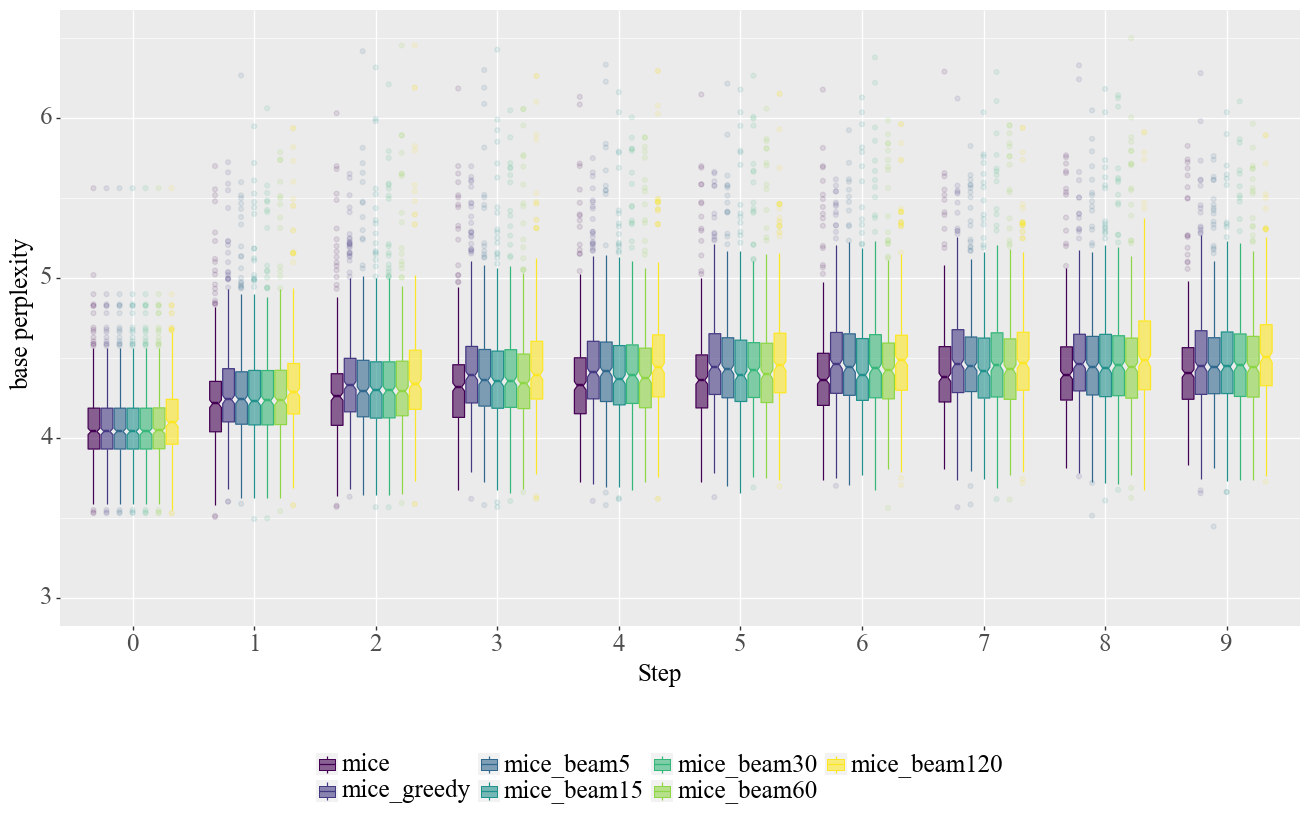


Base Perplexity for imdb dataset:
mice, perplexity@1: 4.2546091101838925
mice, perplexity@5: 4.403593202201507
mice, perplexity@9: 4.4511797654933
********************
mice_greedy, perplexity@1: 4.316166766595729
mice_greedy, perplexity@5: 4.494640883441283
mice_greedy, perplexity@9: 4.489379572924183
********************
mice_beam5, perplexity@1: 4.305160224160483
mice_beam5, perplexity@5: 4.491169270803762
mice_beam5, perplexity@9: 4.5029478355895645
********************
mice_beam15, perplexity@1: 4.301449322146039
mice_beam15, perplexity@5: 4.466860409115636
mice_beam15, perplexity@9: 4.509245024170986
********************
mice_beam30, perplexity@1: 4.2946474452351415
mice_beam30, perplexity@5: 4.483126309860585
mice_beam30, perplexity@9: 4.507991626268223
********************
mice_beam60, perplexity@1: 4.298773852060007
mice_beam60, perplexity@5: 4.466105473041535
mice_beam60, perplexity@9: 4.500735734698312
********************
mice_beam120, perplexity@1: 4.367874828529803
mice_b

In [ ]:
metric = "perplexity"
dataset = "imdb"

print (f"Base Perplexity: {dataset}: ")
mice = np.load(f"Metrics/Base Perplexity/ppl_{dataset}_mice_gpt2.npy")
mice_greedy = np.load(f"Metrics\Base Perplexity\ppl_imdb_mice_greedy_base.npy")
mice_beam5 = np.load(f"Metrics\Base Perplexity\ppl_imdb_mice_beam5_base.npy")
mice_beam15 = np.load(f"Metrics\Base Perplexity\ppl_imdb_mice_beam15_base.npy")
mice_beam30 = np.load(f"Metrics\Base Perplexity\ppl_imdb_mice_beam30_base.npy")
mice_beam60 = np.load(f"Metrics\Base Perplexity\ppl_imdb_mice_beam60_base.npy")
mice_beam120 = np.load(f"Metrics\Base Perplexity\ppl_imdb_mice_beam120_new_base.npy")

order_list = ["mice", "mice_greedy", "mice_beam5", "mice_beam15", "mice_beam30", "mice_beam60", "mice_beam120"]

mice = {i: [j for j in row if j != 0]  for i, row in enumerate(mice.T)}
mice_greedy = {i: [j for j in row if j != 0]  for i, row in enumerate(mice_greedy.T)}
mice_beam5 = {i: [j for j in row if j != 0]  for i, row in enumerate(mice_beam5.T)}
mice_beam15 = {i: [j for j in row if j != 0]  for i, row in enumerate(mice_beam15.T)}
mice_beam30 = {i: [j for j in row if j != 0]  for i, row in enumerate(mice_beam30.T)}
mice_beam60 = {i: [j for j in row if j != 0]  for i, row in enumerate(mice_beam60.T)}
mice_beam120 = {i: [j for j in row if j != 0]  for i, row in enumerate(mice_beam120.T)}

df = to_ggplot([mice,  mice_greedy, mice_beam5, mice_beam15, mice_beam30, mice_beam60, mice_beam120], ["mice", "mice_greedy", "mice_beam5", "mice_beam15", "mice_beam30", "mice_beam60", "mice_beam120"], metric)

df['Editor'] = pd.Categorical(df['Editor'], categories=order_list, ordered=True)

gg = ggplot(df) + aes(x="Step",y= metric, color='Editor', fill ="Editor") + ylim(3,6.5) + geom_boxplot(notch=True,outlier_alpha = 0.1, alpha = 0.6)+theme(legend_direction='horizontal', legend_position=(.5, -.08), legend_title=element_blank(), text = element_text(family='serif',size = 18)) + ylab("base perplexity") + theme(figure_size=(16, 8))
print (gg)

print (f"Base Perplexity for {dataset} dataset:")
for editor in order_list:
    for step in ["1", "5", "9"]:
        value = np.mean(df[(df["Editor"] == editor) & (df["Step"] == step)][metric])
        print (f"{editor}, {metric}@{step}: {value}")
    print ("**"*10)
print ("----"*10)

Base Perplexity: newsgroups: 


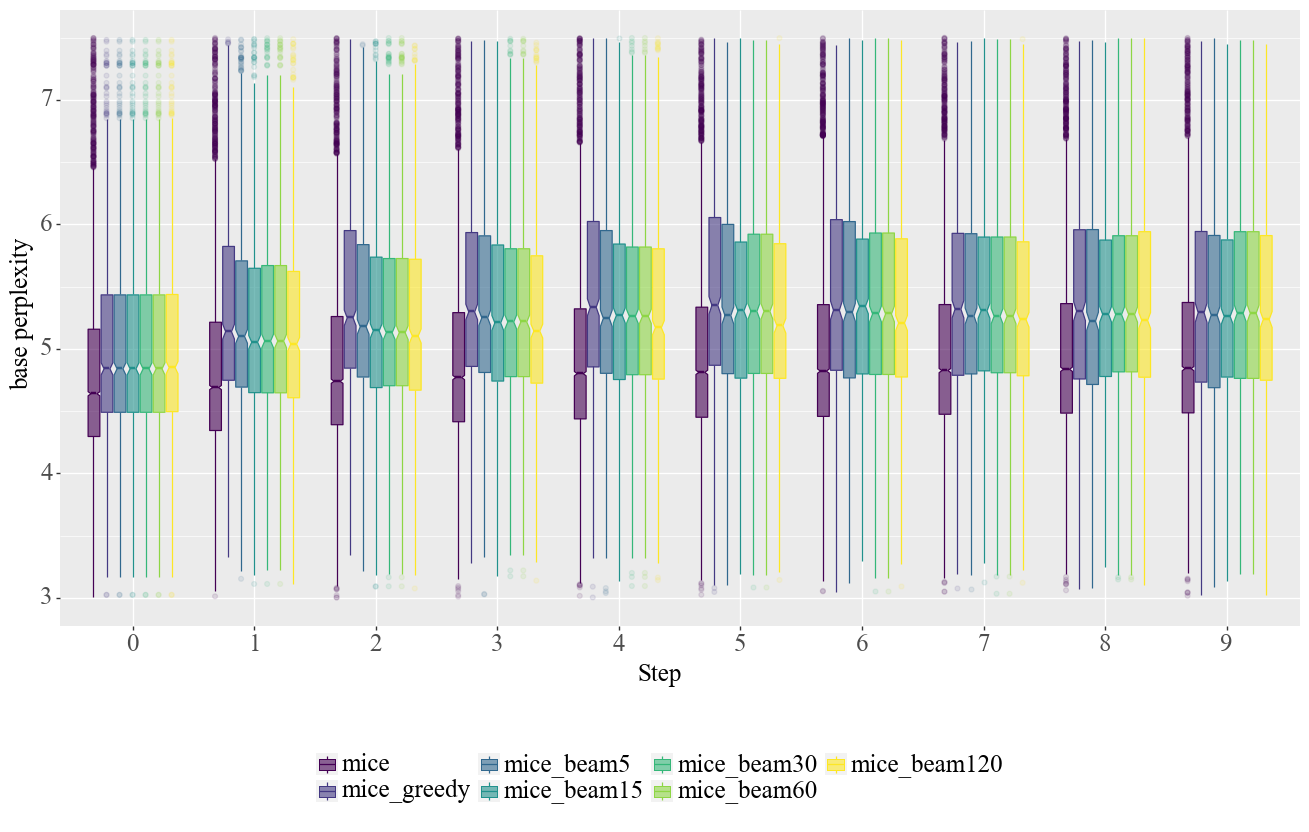


Base Perplexity for newsgroups dataset:
mice, perplexity@1: 5.164280461976966
mice, perplexity@5: 5.329889264590883
mice, perplexity@9: 5.360741495272462
********************
mice_greedy, perplexity@1: 6.133698669715039
mice_greedy, perplexity@5: 6.172336115423196
mice_greedy, perplexity@9: 6.085741959430359
********************
mice_beam5, perplexity@1: 5.859637753433928
mice_beam5, perplexity@5: 6.241647387122277
mice_beam5, perplexity@9: 6.34489262266224
********************
mice_beam15, perplexity@1: 5.812281566968444
mice_beam15, perplexity@5: 6.216531086068616
mice_beam15, perplexity@9: 6.206029437498243
********************
mice_beam30, perplexity@1: 5.752735477975032
mice_beam30, perplexity@5: 6.083264640255978
mice_beam30, perplexity@9: 6.172691025972113
********************
mice_beam60, perplexity@1: 5.752735477975032
mice_beam60, perplexity@5: 6.083264640255978
mice_beam60, perplexity@9: 6.172691025972113
********************
mice_beam120, perplexity@1: 5.627916962697404
mi

In [ ]:
metric = "perplexity"
dataset = "newsgroups"

print (f"Base Perplexity: {dataset}: ")
mice = np.load(f"Metrics/Base Perplexity/ppl_{dataset}_mice_gpt2.npy")
mice_greedy = np.load(f"Metrics\Base Perplexity\ppl_newsgroups_mice_greedy_base.npy")
mice_beam5 = np.load(f"Metrics\Base Perplexity\ppl_newsgroups_mice_beam5_base.npy")
mice_beam15 = np.load(f"Metrics\Base Perplexity\ppl_newsgroups_mice_beam15_base.npy")
mice_beam30 = np.load(f"Metrics\Base Perplexity\ppl_newsgroups_mice_beam30_base.npy")
mice_beam60 = np.load(f"Metrics\Base Perplexity\ppl_newsgroups_mice_beam60_base.npy")
mice_beam120 = np.load(f"Metrics\Base Perplexity\ppl_newsgroups_mice_beam120_base.npy")

order_list = ["mice", "mice_greedy", "mice_beam5", "mice_beam15", "mice_beam30", "mice_beam60", "mice_beam120"]

mice = {i: [j for j in row if j != 0]  for i, row in enumerate(mice.T)}
mice_greedy = {i: [j for j in row if j != 0]  for i, row in enumerate(mice_greedy.T)}
mice_beam5 = {i: [j for j in row if j != 0]  for i, row in enumerate(mice_beam5.T)}
mice_beam15 = {i: [j for j in row if j != 0]  for i, row in enumerate(mice_beam15.T)}
mice_beam30 = {i: [j for j in row if j != 0]  for i, row in enumerate(mice_beam30.T)}
mice_beam60 = {i: [j for j in row if j != 0]  for i, row in enumerate(mice_beam60.T)}
mice_beam120 = {i: [j for j in row if j != 0]  for i, row in enumerate(mice_beam120.T)}

df = to_ggplot([mice,  mice_greedy, mice_beam5, mice_beam15, mice_beam30, mice_beam30, mice_beam120], ["mice", "mice_greedy", "mice_beam5", "mice_beam15", "mice_beam30", "mice_beam60", "mice_beam120"], metric)

df['Editor'] = pd.Categorical(df['Editor'], categories=order_list, ordered=True)

gg = ggplot(df) + aes(x="Step",y= metric, color='Editor', fill ="Editor") + ylim(3,7.5) + geom_boxplot(notch=True,outlier_alpha = 0.1, alpha = 0.6)+theme(legend_direction='horizontal', legend_position=(.5, -.08), legend_title=element_blank(), text = element_text(family='serif',size = 18)) + ylab("base perplexity") + theme(figure_size=(16, 8))
print (gg)

print (f"Base Perplexity for {dataset} dataset:")
for editor in order_list:
    for step in ["1", "5", "9"]:
        value = np.mean(df[(df["Editor"] == editor) & (df["Step"] == step)][metric])
        print (f"{editor}, {metric}@{step}: {value}")
    print ("**"*10)
print ("----"*10)

### IMDb

Base Perplexity: imdb: 


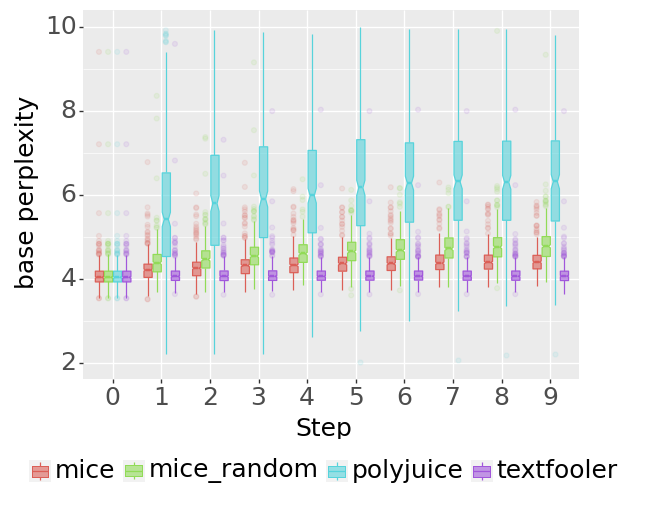


Base Perplexity for imdb dataset:
polyjuice, perplexity@1: 8.01006495120222
mice_random, perplexity@1: 4.417052611084872
mice, perplexity@1: 4.2546091101838925
textfooler, perplexity@1: 4.117835490720178
********************
polyjuice, perplexity@9: 8.158607033582834
mice_random, perplexity@9: 4.800221429869186
mice, perplexity@9: 4.4511797654933
textfooler, perplexity@9: 4.116119103199368
********************
----------------------------------------


In [ ]:
metric = "perplexity"
dataset = "imdb"


print (f"Base Perplexity: {dataset}: ")
mice = np.load(f"Metrics/Base Perplexity/ppl_{dataset}_mice_gpt2.npy")
mice_random = np.load(f"Metrics/Base Perplexity/ppl_imdb_500_random_gpt2.npy")
textfooler = np.load(f"Metrics/Base Perplexity/ppl_{dataset}_textfooler_gpt2.npy")
polyjuice = np.load(f"Metrics/Base Perplexity/ppl_{dataset}_polyjuice_gpt2.npy")


mice = {i: [j for j in row if j != 0]  for i, row in enumerate(mice.T)}
mice_random = {i: [j for j in row if j != 0]  for i, row in enumerate(mice_random.T)}
textfooler = {i: [j for j in row if j != 0]  for i, row in enumerate(textfooler.T)}
polyjuice = {i: [j for j in row if j != 0]  for i, row in enumerate(polyjuice.T)}

df = to_ggplot([mice,  mice_random, polyjuice, textfooler], ["mice", "mice_random", "polyjuice", "textfooler"], metric)

gg = ggplot(df) + aes(x="Step",y= metric, color='Editor', fill ="Editor") + ylim(2,10) + geom_boxplot(notch=True,outlier_alpha = 0.1, alpha = 0.6)+theme(legend_direction='horizontal', legend_position=(.5, -.08), legend_title=element_blank(), text = element_text(size = 18)) + ylab("base perplexity")
print (gg)

imdb_mice = dict()
print (f"Base Perplexity for {dataset} dataset:")
for step in ["1", "9"]:
    imdb_mice[int(step)] = []
    for editor in set(df["Editor"].tolist()):
        value = np.mean(df[(df["Editor"] == editor) & (df["Step"] == step)][metric])
        imdb_mice[int(step)].append(round(value,4)) 
        print (f"{editor}, {metric}@{step}: {value}")
    print ("**"*10)
print ("----"*10)

### NewsGroups

Base Perplexity: newsgroups: 


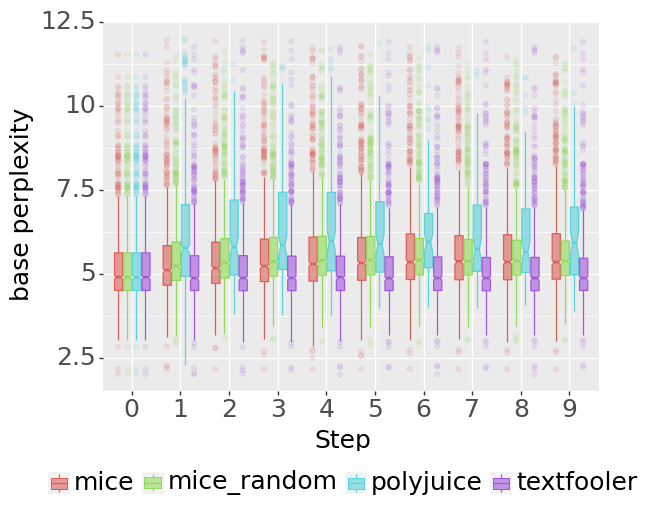


Base Perplexity for newsgroups dataset:
polyjuice, perplexity@1: 7.225974058645159
mice_random, perplexity@1: 5.729432289453912
mice, perplexity@1: 5.634282447868508
textfooler, perplexity@1: 5.304892618268506
********************
polyjuice, perplexity@9: 7.06631466921638
mice_random, perplexity@9: 5.728058137960972
mice, perplexity@9: 5.928825614677828
textfooler, perplexity@9: 5.238307145652811
********************
----------------------------------------


In [ ]:
metric = "perplexity"
dataset = "newsgroups"


print (f"Base Perplexity: {dataset}: ")
mice = np.load(f"Metrics\Base Perplexity\ppl_newsgroups_mice_gradient_base.npy")
mice_random = np.load(f"Metrics/Base Perplexity/ppl_newsgroups_mice_random_base.npy")
textfooler = np.load(f"Metrics\Base Perplexity\ppl_newsgroups_textfooler_allennlp_base.npy")
polyjuice = np.load(f"Metrics\Base Perplexity\ppl_newsgroups_polyjuice_random_base.npy")


mice = {i: [j for j in row if j != 0]  for i, row in enumerate(mice.T)}
mice_random = {i: [j for j in row if j != 0]  for i, row in enumerate(mice_random.T)}
textfooler = {i: [j for j in row if j != 0]  for i, row in enumerate(textfooler.T)}
polyjuice = {i: [j for j in row if j != 0]  for i, row in enumerate(polyjuice.T)}

df = to_ggplot([mice,  mice_random, polyjuice, textfooler], ["mice", "mice_random","polyjuice", "textfooler"], metric)

gg = ggplot(df) + aes(x="Step",y= metric, color='Editor', fill ="Editor") + ylim(2,12) + geom_boxplot(notch=True,outlier_alpha = 0.1, alpha = 0.6)+theme(legend_direction='horizontal', legend_position=(.5, -.08), legend_title=element_blank(), text = element_text(size = 18)) + ylab("base perplexity")
print (gg)

news_mice = dict()
print (f"Base Perplexity for {dataset} dataset:")
for step in ["1", "9"]:
    news_mice[int(step)] = []
    for editor in set(df["Editor"].tolist()):
        value = np.mean(df[(df["Editor"] == editor) & (df["Step"] == step)][metric])
        news_mice[int(step)].append(round(value,4)) 
        print (f"{editor}, {metric}@{step}: {value}")
    print ("**"*10)
print ("----"*10)

# Fine Perplexity 

Fine Perplexity imdb: 


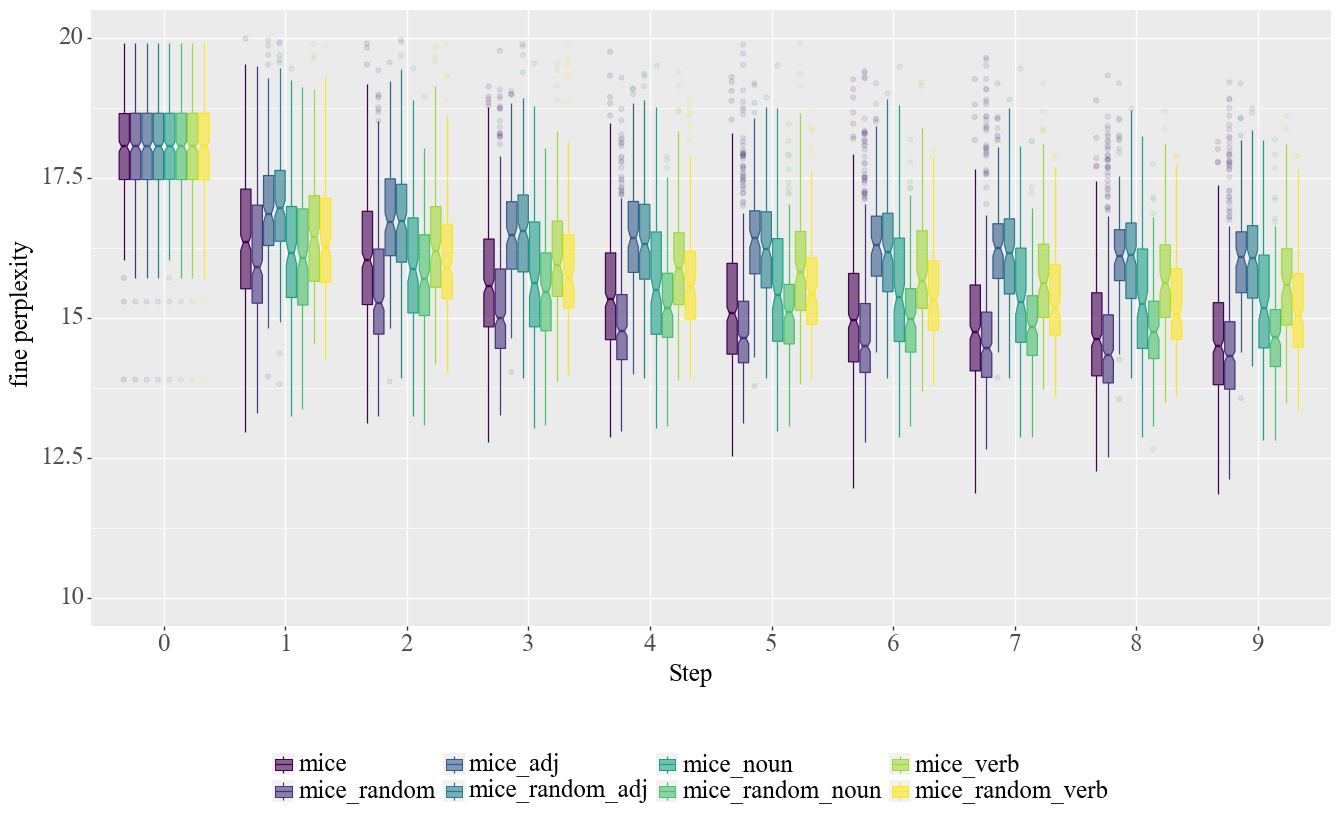


Fine Perplexity for imdb dataset:
mice_adj, fine perplexity@1: 17.019244447350502
mice_noun, fine perplexity@1: 16.355620038920435
mice_verb, fine perplexity@1: 16.66485937575848
mice_random_adj, fine perplexity@1: 17.09418216629408
mice_random_noun, fine perplexity@1: 16.274145422821835
mice_random_verb, fine perplexity@1: 16.606295449393137
********************
mice_adj, fine perplexity@9: 16.134423398525914
mice_noun, fine perplexity@9: 15.351022165585187
mice_verb, fine perplexity@9: 15.745350091977228
mice_random_adj, fine perplexity@9: 16.04385613000881
mice_random_noun, fine perplexity@9: 14.75128289085021
mice_random_verb, fine perplexity@9: 15.184341394676352
********************
----------------------------------------


In [ ]:
import matplotlib.text
metric = "fine perplexity"
dataset = "imdb"


print (f"Fine Perplexity {dataset}: ")
mice = np.load(f"Metrics\Fine Perplexity\ppl_imdb_mice_gpt2-imdb.npy")
mice_random = np.load(f"Metrics\Fine Perplexity\ppl_imdb_500_random_fine.npy")
mice_adj = np.load(f"Metrics\Fine Perplexity\ppl_imdb_mice_adj_fine.npy")
mice_random_adj = np.load(f"Metrics\Fine Perplexity\ppl_imdb_500_random_adj_fine.npy")
mice_noun= np.load(f"Metrics\Fine Perplexity\ppl_imdb_mice_noun_fine.npy")
mice_random_noun = np.load(f"Metrics\Fine Perplexity\ppl_imdb_500_random_noun_fine.npy")
mice_verb = np.load(f"Metrics\Fine Perplexity\ppl_imdb_mice_verb_fine.npy")
mice_random_verb = np.load(f"Metrics\Fine Perplexity\ppl_imdb_500_random_verb_fine.npy")

order_list = ["mice", "mice_random", "mice_adj", "mice_random_adj", "mice_noun", "mice_random_noun","mice_verb", "mice_random_verb"]

mice = {i: [j for j in row if j != 0]  for i, row in enumerate(mice.T)}
mice_random = {i: [j for j in row if j != 0]  for i, row in enumerate(mice_random.T)}
mice_adj = {i: [j for j in row if j != 0]  for i, row in enumerate(mice_adj.T)}
mice_random_adj = {i: [j for j in row if j != 0]  for i, row in enumerate(mice_random_adj.T)}
mice_noun = {i: [j for j in row if j != 0]  for i, row in enumerate(mice_noun.T)}
mice_random_noun = {i: [j for j in row if j != 0]  for i, row in enumerate(mice_random_noun.T)}
mice_verb = {i: [j for j in row if j != 0]  for i, row in enumerate(mice_verb.T)}
mice_random_verb = {i: [j for j in row if j != 0]  for i, row in enumerate(mice_random_verb.T)}

df = to_ggplot([mice,  mice_random, mice_adj, mice_random_adj, mice_noun, mice_random_noun, mice_verb, mice_random_verb], ["mice", "mice_random", "mice_adj", "mice_random_adj", "mice_noun", "mice_random_noun", "mice_verb", "mice_random_verb"], metric)

df['Editor'] = pd.Categorical(df['Editor'], categories=order_list, ordered=True)

gg = ggplot(df) + aes(x="Step",y= metric, color='Editor', fill ="Editor") + ylim(10,20) + geom_boxplot(notch=True,outlier_alpha = 0.1, alpha = 0.6)+theme(legend_direction='horizontal', legend_position=(.5, -.08), legend_title=element_blank(), text = element_text(family='serif',size = 18)) + ylab("fine perplexity") + theme(figure_size=(16, 8))

print (gg)

print (f"Fine Perplexity for {dataset} dataset:")
imdb_fine = dict()
imdb_fine[1] = []
imdb_fine[9] = []
latex_order_list = ["mice_adj", "mice_noun", "mice_verb", "mice_random_adj", "mice_random_noun", "mice_random_verb"]
for step in ["1", "9"]:
    for editor in latex_order_list:
        value = np.mean(df[(df["Editor"] == editor) & (df["Step"] == step)][metric])
        print (f"{editor}, {metric}@{step}: {value}")
        imdb_fine[int(step)].append(round(value,4))
    print ("**"*10)
print ("----"*10)

Fine Perplexity newsgroups: 


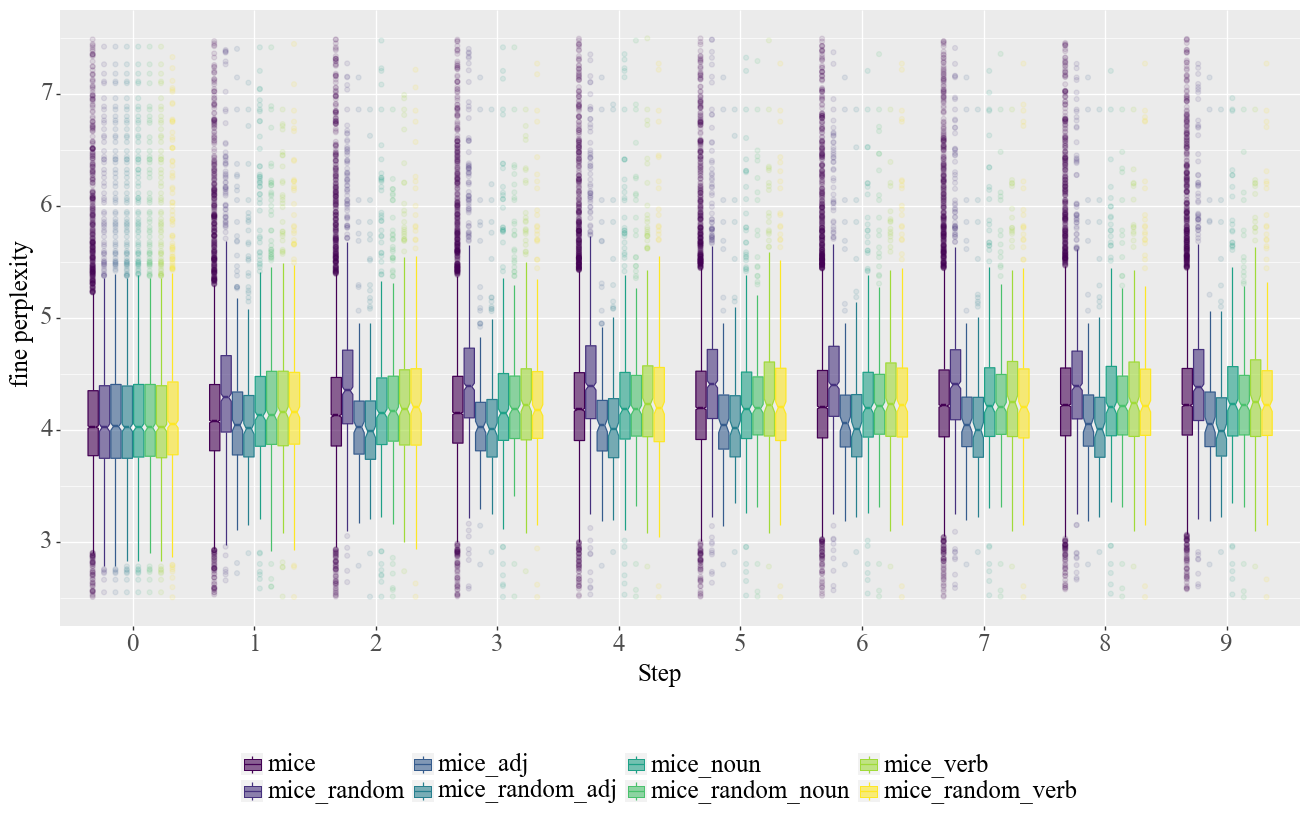


Fine Perplexity for newsgroups dataset:
mice_adj, fine perplexity@1: 4.214385291171628
mice_noun, fine perplexity@1: 4.317587224584426
mice_verb, fine perplexity@1: 4.357343188729055
mice_random_adj, fine perplexity@1: 4.200328421592713
mice_random_noun, fine perplexity@1: 4.3696093278636265
mice_random_verb, fine perplexity@1: 4.336659128478404
********************
mice_adj, fine perplexity@9: 4.271369990348816
mice_noun, fine perplexity@9: 4.353863927059703
mice_verb, fine perplexity@9: 4.37312048807073
mice_random_adj, fine perplexity@9: 4.205337430467669
mice_random_noun, fine perplexity@9: 4.267690289756398
mice_random_verb, fine perplexity@9: 4.336504060942848
********************
----------------------------------------


In [ ]:
import matplotlib.text
metric = "fine perplexity"
dataset = "newsgroups"


print (f"Fine Perplexity {dataset}: ")
mice = np.load(f"Metrics\Fine Perplexity\ppl_newsgroups_mice_GPT2-news.npy")
mice_random = np.load(f"Metrics\Fine Perplexity\ppl_newsgroups_mice_random_fine.npy")
mice_adj = np.load(f"Metrics\Fine Perplexity\ppl_newsgroups_mice_grad_adj_new_fine.npy")
mice_random_adj = np.load(f"Metrics\Fine Perplexity\ppl_newsgroups_mice_random_adj_fine.npy")
mice_noun= np.load(f"Metrics\Fine Perplexity\ppl_newsgroups_mice_grad_noun_new_fine.npy")
mice_random_noun = np.load(f"Metrics\Fine Perplexity\ppl_newsgroups_mice_random_noun_fine.npy")
mice_verb = np.load(f"Metrics\Fine Perplexity\ppl_newsgroups_mice_grad_verb_new_fine.npy")
mice_random_verb = np.load(f"Metrics\Fine Perplexity\ppl_newsgroups_mice_random_verb_fine.npy")

order_list = ["mice", "mice_random", "mice_adj", "mice_random_adj", "mice_noun", "mice_random_noun","mice_verb", "mice_random_verb"]

mice = {i: [j for j in row if j != 0]  for i, row in enumerate(mice.T)}
mice_random = {i: [j for j in row if j != 0]  for i, row in enumerate(mice_random.T)}
mice_adj = {i: [j for j in row if j != 0]  for i, row in enumerate(mice_adj.T)}
mice_random_adj = {i: [j for j in row if j != 0]  for i, row in enumerate(mice_random_adj.T)}
mice_noun = {i: [j for j in row if j != 0]  for i, row in enumerate(mice_noun.T)}
mice_random_noun = {i: [j for j in row if j != 0]  for i, row in enumerate(mice_random_noun.T)}
mice_verb = {i: [j for j in row if j != 0]  for i, row in enumerate(mice_verb.T)}
mice_random_verb = {i: [j for j in row if j != 0]  for i, row in enumerate(mice_random_verb.T)}

df = to_ggplot([mice,  mice_random, mice_adj, mice_random_adj, mice_noun, mice_random_noun, mice_verb, mice_random_verb], ["mice", "mice_random", "mice_adj", "mice_random_adj", "mice_noun", "mice_random_noun", "mice_verb", "mice_random_verb"], metric)

df['Editor'] = pd.Categorical(df['Editor'], categories=order_list, ordered=True)

gg = ggplot(df) + aes(x="Step",y= metric, color='Editor', fill ="Editor") + ylim(2.5,7.5) + geom_boxplot(notch=True,outlier_alpha = 0.1, alpha = 0.6)+theme(legend_direction='horizontal', legend_position=(.5, -.08), legend_title=element_blank(), text = element_text(family='serif',size = 18)) + ylab("fine perplexity") + theme(figure_size=(16, 8))

print (gg)

print (f"Fine Perplexity for {dataset} dataset:")
news_fine = dict()
news_fine[1] = []
news_fine[9] = []
latex_order_list = ["mice_adj", "mice_noun", "mice_verb", "mice_random_adj", "mice_random_noun", "mice_random_verb"]
for step in ["1", "9"]:
    for editor in latex_order_list:
        value = np.mean(df[(df["Editor"] == editor) & (df["Step"] == step)][metric])
        print (f"{editor}, {metric}@{step}: {value}")
        news_fine[int(step)].append(round(value,4))
    print ("**"*10)
print ("----"*10)

### Polyjuice

Fine Perplexity imdb: 


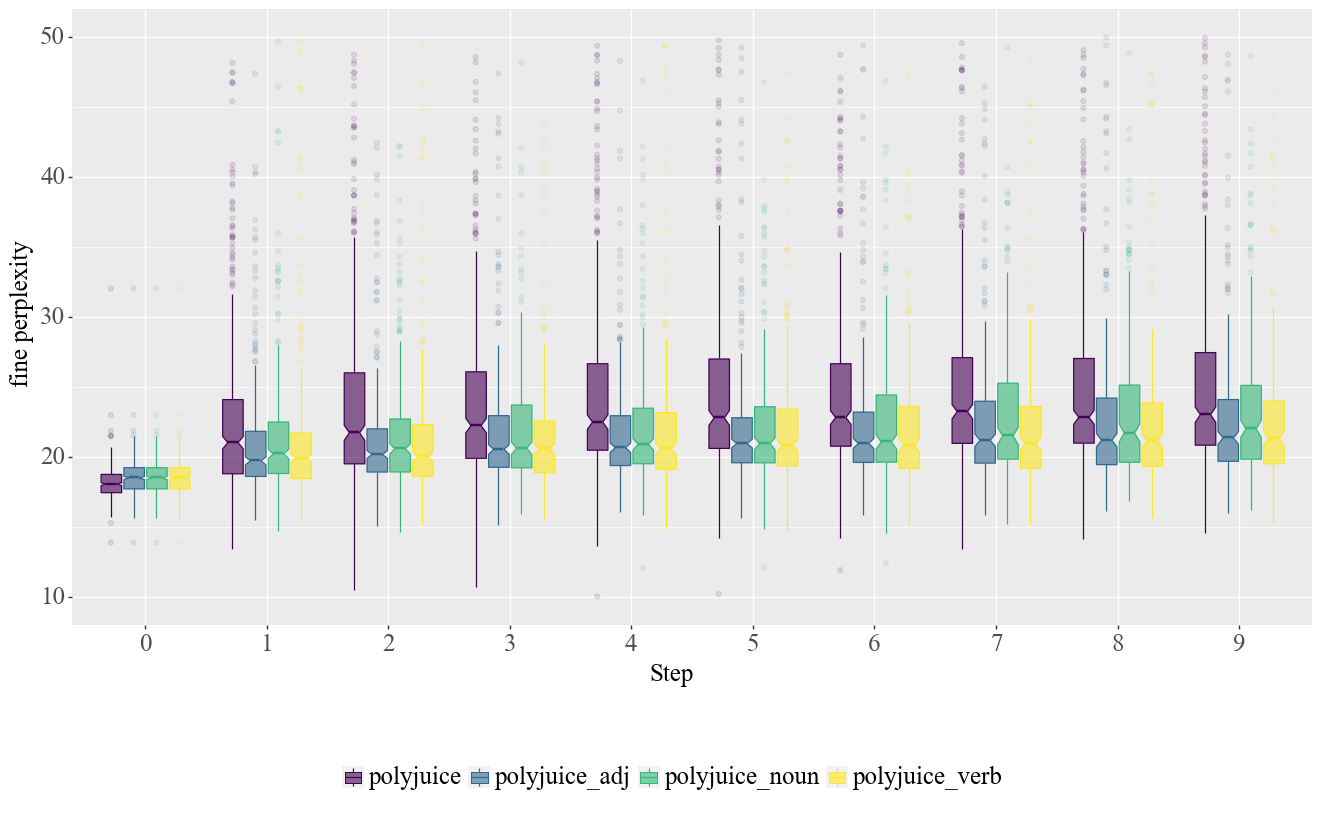


Fine Perplexity for imdb dataset:
polyjuice_adj, fine perplexity@1: 22.215853785001315
polyjuice_noun, fine perplexity@1: 24.81888587088198
polyjuice_verb, fine perplexity@1: 24.9764851818514
********************
polyjuice_adj, fine perplexity@9: 25.46041014603491
polyjuice_noun, fine perplexity@9: 25.686691264414417
polyjuice_verb, fine perplexity@9: 27.369893292400324
********************
----------------------------------------


In [ ]:
import matplotlib.text
metric = "fine perplexity"
dataset = "imdb"


print (f"Fine Perplexity {dataset}: ")
polyjuice = np.load(f"Metrics\Fine Perplexity\ppl_imdb_polyjuice_gpt2-imdb.npy")
polyjuice_adj = np.load(f"Metrics\Fine Perplexity\ppl_imdb_polyjuice_random_adj_fine.npy")
polyjuice_noun= np.load("Metrics\Fine Perplexity\ppl_imdb_polyjuice_random_noun_fine.npy")
polyjuice_verb = np.load(f"Metrics\Fine Perplexity\ppl_imdb_polyjuice_random_verb_fine.npy")

order_list = ["polyjuice", "polyjuice_adj", "polyjuice_noun", "polyjuice_verb"]

polyjuice = {i: [j for j in row if j != 0]  for i, row in enumerate(polyjuice.T)}
polyjuice_adj = {i: [j for j in row if j != 0]  for i, row in enumerate(polyjuice_adj.T)}
polyjuice_noun = {i: [j for j in row if j != 0]  for i, row in enumerate(polyjuice_noun.T)}
polyjuice_verb = {i: [j for j in row if j != 0]  for i, row in enumerate(polyjuice_verb.T)}

df = to_ggplot([polyjuice, polyjuice_adj, polyjuice_noun, polyjuice_verb], ["polyjuice", "polyjuice_adj", "polyjuice_noun", "polyjuice_verb"], metric)

df['Editor'] = pd.Categorical(df['Editor'], categories=order_list, ordered=True)

gg = ggplot(df) + aes(x="Step",y= metric, color='Editor', fill ="Editor") + ylim(10,50) + geom_boxplot(notch=True,outlier_alpha = 0.1, alpha = 0.6)+theme(legend_direction='horizontal', legend_position=(.5, -.08), legend_title=element_blank(), text = element_text(family='serif',size = 18)) + ylab("fine perplexity") + theme(figure_size=(16, 8))

print (gg)

print (f"Fine Perplexity for {dataset} dataset:")
latex_order_list = ["polyjuice_adj", "polyjuice_noun", "polyjuice_verb"]
for step in ["1", "9"]:
    for editor in latex_order_list:
        value = np.mean(df[(df["Editor"] == editor) & (df["Step"] == step)][metric])
        print (f"{editor}, {metric}@{step}: {value}")
        imdb_fine[int(step)].append(round(value,4))
    print ("**"*10)
print ("----"*10)

Fine Perplexity newsgroups: 


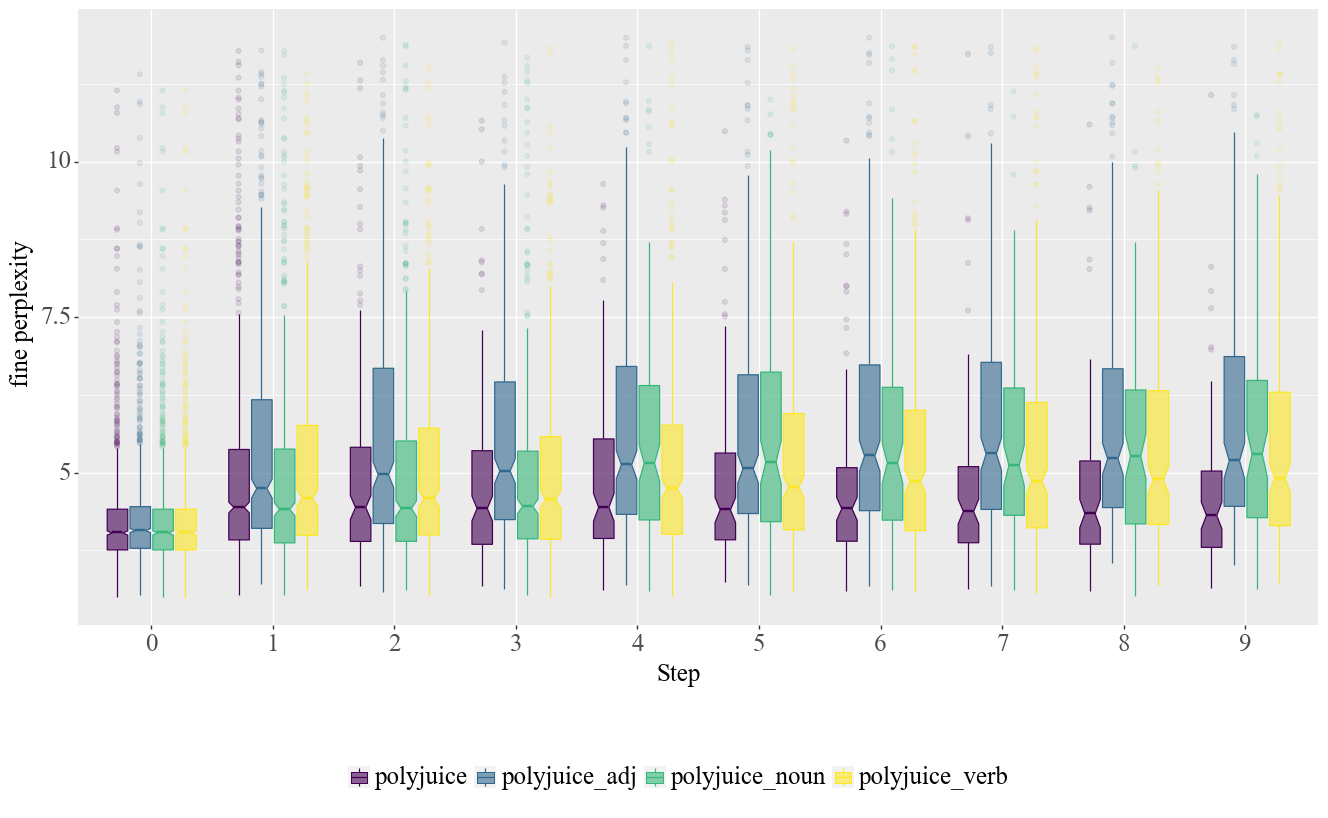


Fine Perplexity for newsgroups dataset:
polyjuice_adj, fine perplexity@1: 7.1214960299969645
polyjuice_noun, fine perplexity@1: 6.176174229945777
polyjuice_verb, fine perplexity@1: 6.5112553996131535
********************
polyjuice_adj, fine perplexity@9: 7.718751488272677
polyjuice_noun, fine perplexity@9: 6.443455030629923
polyjuice_verb, fine perplexity@9: 6.441238283628394
********************
----------------------------------------


In [ ]:
import matplotlib.text
metric = "fine perplexity"
dataset = "newsgroups"


print (f"Fine Perplexity {dataset}: ")
polyjuice = np.load(f"Metrics\Fine Perplexity\ppl_newsgroups_polyjuice_random_fine.npy")
polyjuice_adj = np.load(f"Metrics\Fine Perplexity\ppl_newsgroups_polyjuice_adj_fine.npy")
polyjuice_noun= np.load("Metrics\Fine Perplexity\ppl_newsgroups_polyjuice_noun_fine.npy")
polyjuice_verb = np.load(f"Metrics\Fine Perplexity\ppl_newsgroups_polyjuice_verb_fine.npy")

order_list = ["polyjuice", "polyjuice_adj", "polyjuice_noun", "polyjuice_verb"]

polyjuice = {i: [j for j in row if j != 0]  for i, row in enumerate(polyjuice.T)}
polyjuice_adj = {i: [j for j in row if j != 0]  for i, row in enumerate(polyjuice_adj.T)}
polyjuice_noun = {i: [j for j in row if j != 0]  for i, row in enumerate(polyjuice_noun.T)}
polyjuice_verb = {i: [j for j in row if j != 0]  for i, row in enumerate(polyjuice_verb.T)}

df = to_ggplot([polyjuice, polyjuice_adj, polyjuice_noun, polyjuice_verb], ["polyjuice", "polyjuice_adj", "polyjuice_noun", "polyjuice_verb"], metric)

df['Editor'] = pd.Categorical(df['Editor'], categories=order_list, ordered=True)

gg = ggplot(df) + aes(x="Step",y= metric, color='Editor', fill ="Editor") + ylim(3,12) + geom_boxplot(notch=True,outlier_alpha = 0.1, alpha = 0.6)+theme(legend_direction='horizontal', legend_position=(.5, -.08), legend_title=element_blank(), text = element_text(family='serif',size = 18)) + ylab("fine perplexity") + theme(figure_size=(16, 8))

print (gg)

print (f"Fine Perplexity for {dataset} dataset:")
latex_order_list = ["polyjuice_adj", "polyjuice_noun", "polyjuice_verb"]
for step in ["1", "9"]:
    for editor in latex_order_list:
        value = np.mean(df[(df["Editor"] == editor) & (df["Step"] == step)][metric])
        print (f"{editor}, {metric}@{step}: {value}")
        news_fine[int(step)].append(round(value,4))
    print ("**"*10)
print ("----"*10)

### Textfooler

Fine Perplexity imdb: 


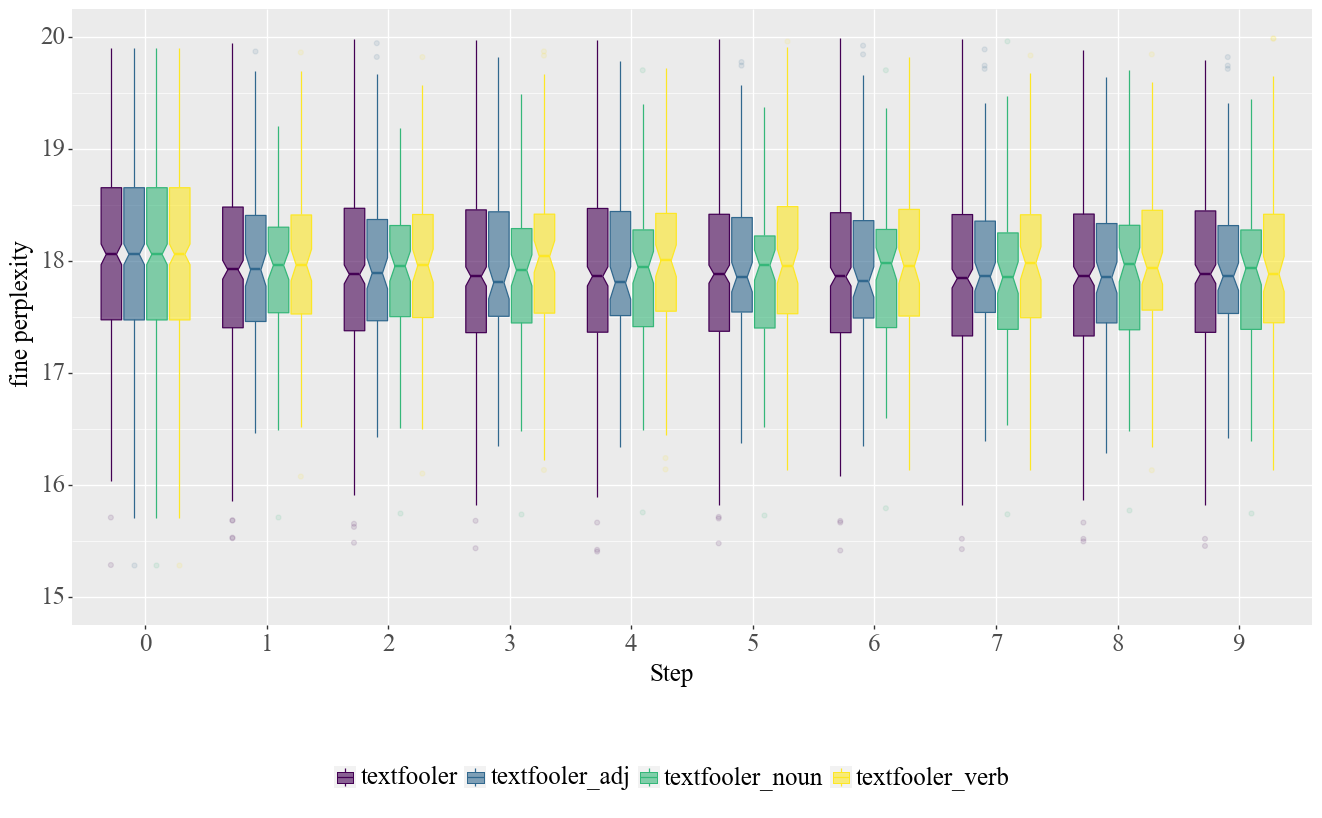


Fine Perplexity for imdb dataset:
textfooler_adj, fine perplexity@1: 18.06537995896898
textfooler_noun, fine perplexity@1: 18.12284545103709
textfooler_verb, fine perplexity@1: 18.236255405018632
********************
textfooler_adj, fine perplexity@9: 18.077261571530943
textfooler_noun, fine perplexity@9: 18.0512197415034
textfooler_verb, fine perplexity@9: 18.036442990205725
********************
----------------------------------------


In [ ]:
import matplotlib.text
metric = "fine perplexity"
dataset = "imdb"


print (f"Fine Perplexity {dataset}: ")
textfooler = np.load(f"Metrics\Fine Perplexity\ppl_imdb_textfooler_gpt2-imdb.npy")
textfooler_adj = np.load(f"Metrics\Fine Perplexity\ppl_imdb_textfooler_ADJ_fine.npy")
textfooler_noun= np.load("Metrics\Fine Perplexity\ppl_imdb_textfooler_NOUN_fine.npy")
textfooler_verb = np.load(f"Metrics\Fine Perplexity\ppl_imdb_textfooler_VERB_fine.npy")

order_list = ["textfooler", "textfooler_adj", "textfooler_noun", "textfooler_verb"]

textfooler = {i: [j for j in row if j != 0]  for i, row in enumerate(textfooler.T)}
textfooler_adj = {i: [j for j in row if j != 0]  for i, row in enumerate(textfooler_adj.T)}
textfooler_noun = {i: [j for j in row if j != 0]  for i, row in enumerate(textfooler_noun.T)}
textfooler_verb = {i: [j for j in row if j != 0]  for i, row in enumerate(textfooler_verb.T)}

df = to_ggplot([textfooler, textfooler_adj, textfooler_noun, textfooler_verb], ["textfooler", "textfooler_adj", "textfooler_noun", "textfooler_verb"], metric)

df['Editor'] = pd.Categorical(df['Editor'], categories=order_list, ordered=True)

gg = ggplot(df) + aes(x="Step",y= metric, color='Editor', fill ="Editor") + ylim(15,20) + geom_boxplot(notch=True,outlier_alpha = 0.1, alpha = 0.6)+theme(legend_direction='horizontal', legend_position=(.5, -.08), legend_title=element_blank(), text = element_text(family='serif',size = 18)) + ylab("fine perplexity") + theme(figure_size=(16, 8))

print (gg)

print (f"Fine Perplexity for {dataset} dataset:")
latex_order_list = ["textfooler_adj", "textfooler_noun", "textfooler_verb"]
for step in ["1", "9"]:
    for editor in latex_order_list:
        value = np.mean(df[(df["Editor"] == editor) & (df["Step"] == step)][metric])
        print (f"{editor}, {metric}@{step}: {value}")
        imdb_fine[int(step)].append(round(value,4))
    print ("**"*10)
print ("----"*10)

Fine Perplexity newsgroups: 


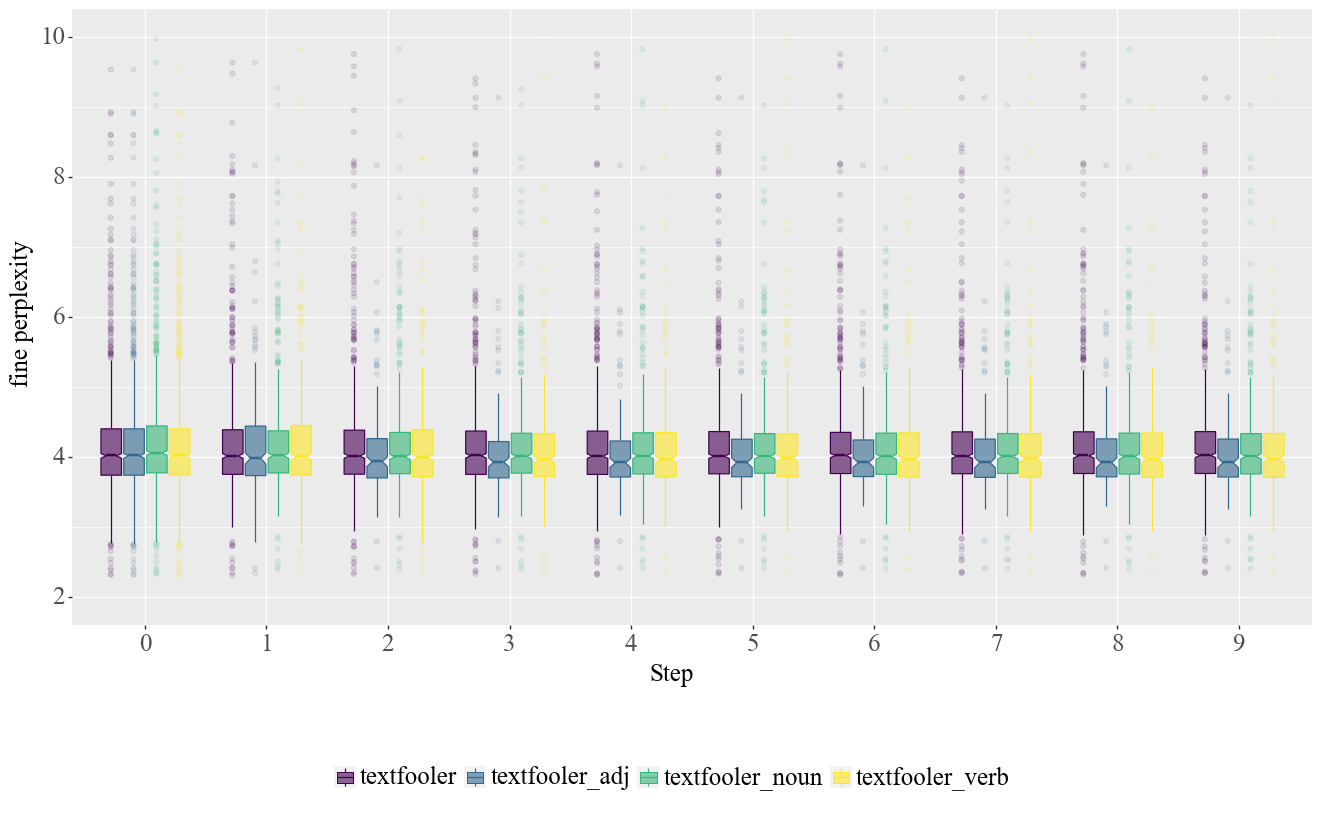


Fine Perplexity for newsgroups dataset:
textfooler_adj, fine perplexity@1: 4.183583218564269
textfooler_noun, fine perplexity@1: 4.199632329378839
textfooler_verb, fine perplexity@1: 4.244113523275294
********************
textfooler_adj, fine perplexity@9: 4.078707449919694
textfooler_noun, fine perplexity@9: 4.149547765268147
textfooler_verb, fine perplexity@9: 4.1502102240462975
********************
----------------------------------------


In [ ]:
import matplotlib.text
metric = "fine perplexity"
dataset = "newsgroups"


print (f"Fine Perplexity {dataset}: ")
textfooler = np.load(f"Metrics\Fine Perplexity\ppl_newsgroups_textfooler_allennlp_fine.npy")
textfooler_adj = np.load(f"Metrics\Fine Perplexity\ppl_newsgroups_textfooler_ADJ_fine.npy")
textfooler_noun= np.load("Metrics\Fine Perplexity\ppl_newsgroups_textfooler_NOUN_fine.npy")
textfooler_verb = np.load(f"Metrics\Fine Perplexity\ppl_newsgroups_textfooler_VERB_fine.npy")

order_list = ["textfooler", "textfooler_adj", "textfooler_noun", "textfooler_verb"]

textfooler = {i: [j for j in row if j != 0]  for i, row in enumerate(textfooler.T)}
textfooler_adj = {i: [j for j in row if j != 0]  for i, row in enumerate(textfooler_adj.T)}
textfooler_noun = {i: [j for j in row if j != 0]  for i, row in enumerate(textfooler_noun.T)}
textfooler_verb = {i: [j for j in row if j != 0]  for i, row in enumerate(textfooler_verb.T)}

df = to_ggplot([textfooler, textfooler_adj, textfooler_noun, textfooler_verb], ["textfooler", "textfooler_adj", "textfooler_noun", "textfooler_verb"], metric)

df['Editor'] = pd.Categorical(df['Editor'], categories=order_list, ordered=True)

gg = ggplot(df) + aes(x="Step",y= metric, color='Editor', fill ="Editor") + ylim(2,10) + geom_boxplot(notch=True,outlier_alpha = 0.1, alpha = 0.6)+theme(legend_direction='horizontal', legend_position=(.5, -.08), legend_title=element_blank(), text = element_text(family='serif',size = 18)) + ylab("fine perplexity") + theme(figure_size=(16, 8))

print (gg)

print (f"Fine Perplexity for {dataset} dataset:")
latex_order_list = ["textfooler_adj", "textfooler_noun", "textfooler_verb"]
for step in ["1", "9"]:
    for editor in latex_order_list:
        value = np.mean(df[(df["Editor"] == editor) & (df["Step"] == step)][metric])
        print (f"{editor}, {metric}@{step}: {value}")
        news_fine[int(step)].append(round(value,4))
    print ("**"*10)
print ("----"*10)

### Create latex table for ppls with POS

In [ ]:
latex = create_latex_table_ppl_pos("ppl-base", [], imdb_mice, mice_news, "ppl-imdb", imdb_fine, news_fine)
print(latex)

### Beam-search

Fine Perplexity: imdb: 


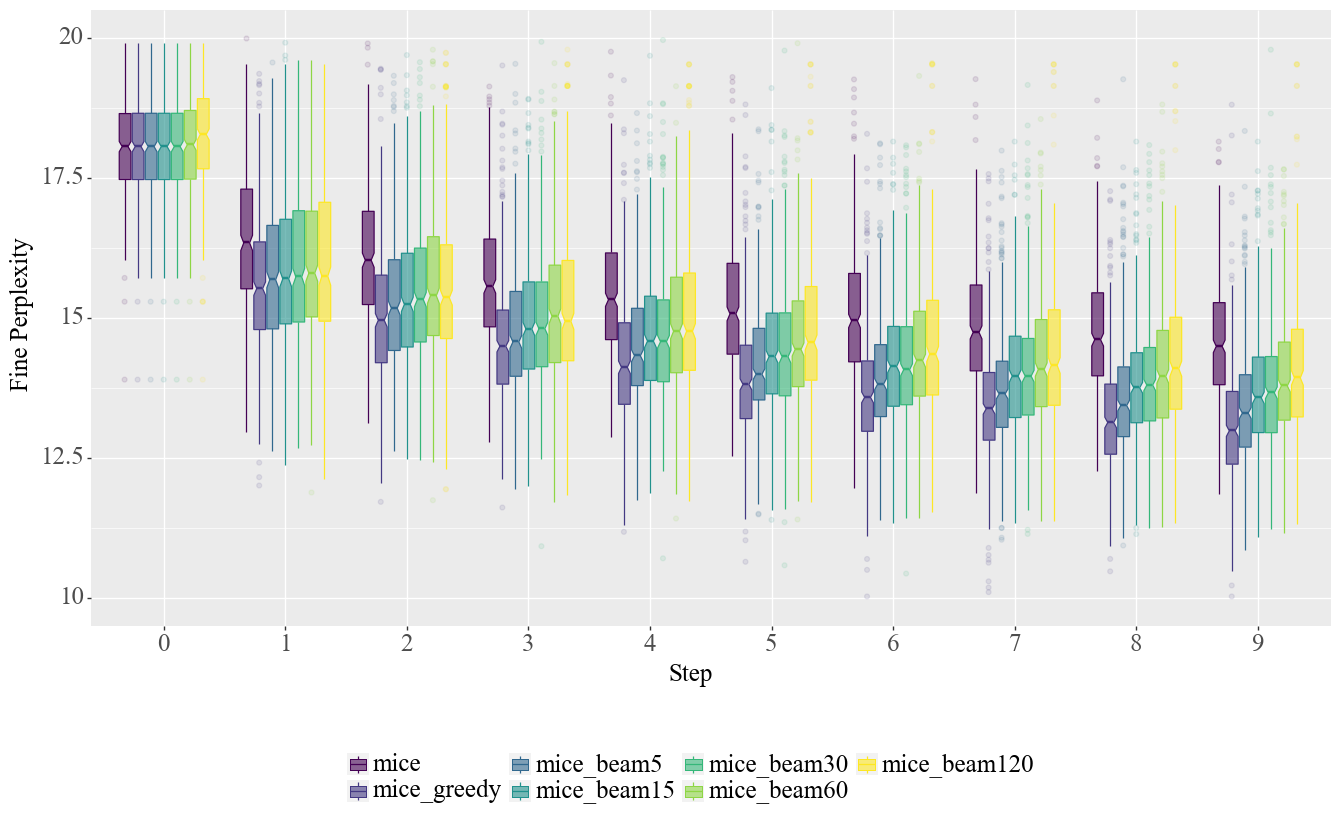


Fine Perplexity for imdb dataset:
mice, perplexity@1: 16.531539647042614
mice, perplexity@5: 15.254342395578902
mice, perplexity@9: 14.606942942413543
********************
mice_greedy, perplexity@1: 15.717771221151997
mice_greedy, perplexity@5: 13.954307101597296
mice_greedy, perplexity@9: 13.066873347172972
********************
mice_beam5, perplexity@1: 15.90042939740558
mice_beam5, perplexity@5: 14.207542991638183
mice_beam5, perplexity@9: 13.429499375542928
********************
mice_beam15, perplexity@1: 15.943184695132944
mice_beam15, perplexity@5: 14.471078792838163
mice_beam15, perplexity@9: 13.741131427676178
********************
mice_beam30, perplexity@1: 16.041373224036636
mice_beam30, perplexity@5: 14.48142410544462
mice_beam30, perplexity@9: 13.78113849568756
********************
mice_beam60, perplexity@1: 16.084889815574467
mice_beam60, perplexity@5: 14.654373218899682
mice_beam60, perplexity@9: 13.978931363271927
********************
mice_beam120, perplexity@1: 16.1182043

In [ ]:
metric = "perplexity"
dataset = "imdb"

print (f"Fine Perplexity: {dataset}: ")
mice = np.load(f"Metrics/Fine Perplexity/ppl_{dataset}_mice_gpt2-imdb.npy")
mice_greedy = np.load(f"Metrics\Fine Perplexity\ppl_imdb_mice_greedy_fine.npy")
mice_beam5 = np.load(f"Metrics\Fine Perplexity\ppl_imdb_mice_beam5_fine.npy")
mice_beam15 = np.load(f"Metrics\Fine Perplexity\ppl_imdb_mice_beam15_fine.npy")
mice_beam30 = np.load(f"Metrics\Fine Perplexity\ppl_imdb_mice_beam30_fine.npy")
mice_beam60 = np.load(f"Metrics\Fine Perplexity\ppl_imdb_mice_beam60_fine.npy")
mice_beam120 = np.load(f"Metrics\Fine Perplexity\ppl_imdb_mice_beam120_new_fine.npy")

order_list = ["mice", "mice_greedy", "mice_beam5", "mice_beam15", "mice_beam30", "mice_beam60", "mice_beam120"]

mice = {i: [j for j in row if j != 0]  for i, row in enumerate(mice.T)}
mice_greedy = {i: [j for j in row if j != 0]  for i, row in enumerate(mice_greedy.T)}
mice_beam5 = {i: [j for j in row if j != 0]  for i, row in enumerate(mice_beam5.T)}
mice_beam15 = {i: [j for j in row if j != 0]  for i, row in enumerate(mice_beam15.T)}
mice_beam30 = {i: [j for j in row if j != 0]  for i, row in enumerate(mice_beam30.T)}
mice_beam60 = {i: [j for j in row if j != 0]  for i, row in enumerate(mice_beam60.T)}
mice_beam120 = {i: [j for j in row if j != 0]  for i, row in enumerate(mice_beam120.T)}

df = to_ggplot([mice,  mice_greedy, mice_beam5, mice_beam15, mice_beam30, mice_beam60, mice_beam120], ["mice", "mice_greedy", "mice_beam5", "mice_beam15", "mice_beam30", "mice_beam60", "mice_beam120"], metric)

df['Editor'] = pd.Categorical(df['Editor'], categories=order_list, ordered=True)

gg = ggplot(df) + aes(x="Step",y= metric, color='Editor', fill ="Editor") + ylim(10, 20) + geom_boxplot(notch=True,outlier_alpha = 0.1, alpha = 0.6)+theme(legend_direction='horizontal', legend_position=(.5, -.08), legend_title=element_blank(), text = element_text(family='serif',size = 18)) + ylab("Fine Perplexity") + theme(figure_size=(16, 8))
print (gg)

print (f"Fine Perplexity for {dataset} dataset:")
for editor in order_list:
    for step in ["1", "5", "9"]:
        value = np.mean(df[(df["Editor"] == editor) & (df["Step"] == step)][metric])
        print (f"{editor}, {metric}@{step}: {value}")
    print ("**"*10)
print ("----"*10)


Fine Perplexity: newsgroups: 


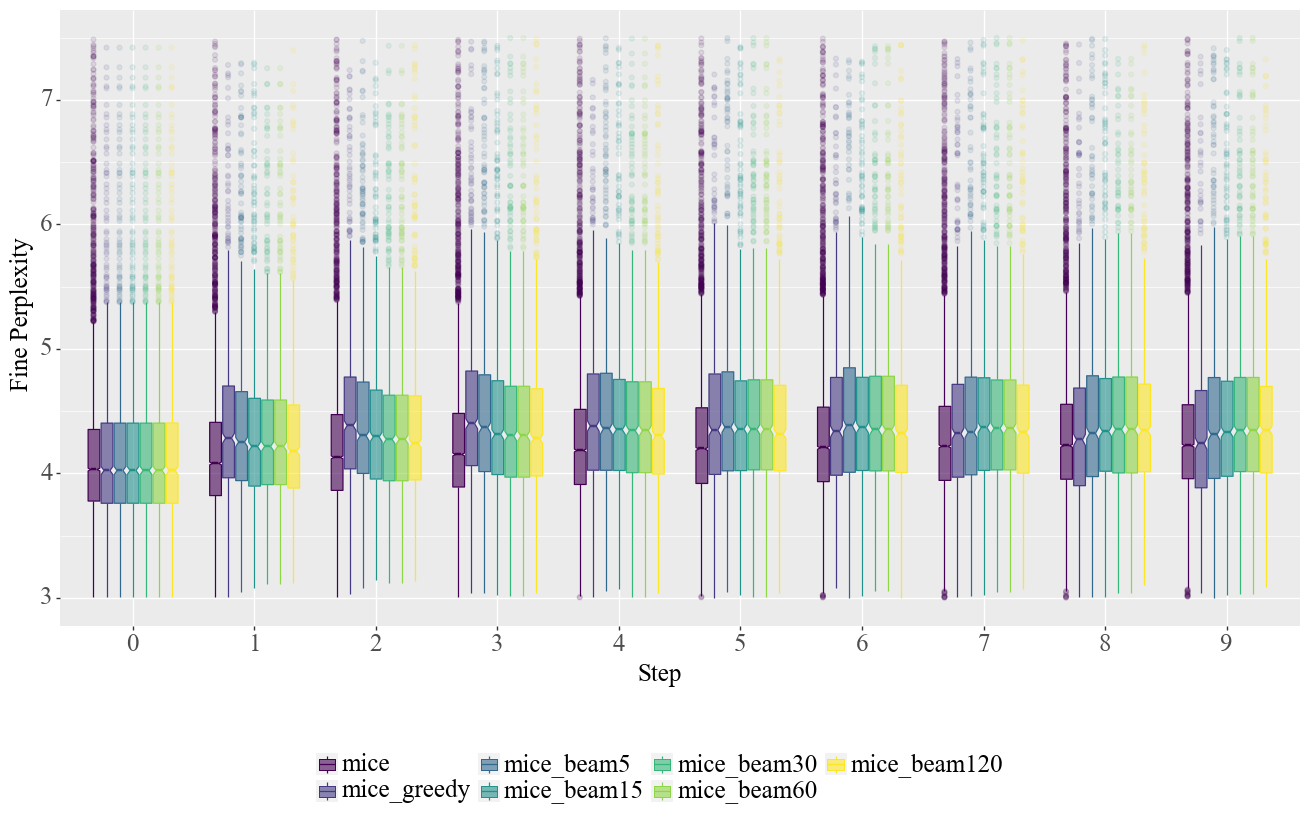


Fine Perplexity for newsgroups dataset:
mice, perplexity@1: 4.276442165160209
mice, perplexity@5: 4.386635767816668
mice, perplexity@9: 4.400595965068608
********************
mice_greedy, perplexity@1: 4.672400361413409
mice_greedy, perplexity@5: 4.548509745337025
mice_greedy, perplexity@9: 4.366488806002742
********************
mice_beam5, perplexity@1: 4.5650577074046925
mice_beam5, perplexity@5: 4.686051024330987
mice_beam5, perplexity@9: 4.6595362931692685
********************
mice_beam15, perplexity@1: 4.5457468590942005
mice_beam15, perplexity@5: 4.6771052790342
mice_beam15, perplexity@9: 4.614886294422882
********************
mice_beam30, perplexity@1: 4.531955274265986
mice_beam30, perplexity@5: 4.64170576057936
mice_beam30, perplexity@9: 4.6325282035801285
********************
mice_beam60, perplexity@1: 4.531955274265986
mice_beam60, perplexity@5: 4.64170576057936
mice_beam60, perplexity@9: 4.6325282035801285
********************
mice_beam120, perplexity@1: 4.429495152048084


In [ ]:
metric = "perplexity"
dataset = "newsgroups"

print (f"Fine Perplexity: {dataset}: ")
mice = np.load(f"Metrics\Fine Perplexity\ppl_newsgroups_mice_GPT2-News.npy")
mice_greedy = np.load(f"Metrics\Fine Perplexity\ppl_newsgroups_mice_greedy_fine.npy")
mice_beam5 = np.load(f"Metrics\Fine Perplexity\ppl_newsgroups_mice_beam5_fine.npy")
mice_beam15 = np.load(f"Metrics\Fine Perplexity\ppl_newsgroups_mice_beam15_fine.npy")
mice_beam30 = np.load(f"Metrics\Fine Perplexity\ppl_newsgroups_mice_beam30_fine.npy")
mice_beam60 = np.load(f"Metrics\Fine Perplexity\ppl_newsgroups_mice_beam60_fine.npy")
mice_beam120 = np.load(f"Metrics\Fine Perplexity\ppl_newsgroups_mice_beam120_fine.npy")

order_list = ["mice", "mice_greedy", "mice_beam5", "mice_beam15", "mice_beam30", "mice_beam60", "mice_beam120"]

mice = {i: [j for j in row if j != 0]  for i, row in enumerate(mice.T)}
mice_greedy = {i: [j for j in row if j != 0]  for i, row in enumerate(mice_greedy.T)}
mice_beam5 = {i: [j for j in row if j != 0]  for i, row in enumerate(mice_beam5.T)}
mice_beam15 = {i: [j for j in row if j != 0]  for i, row in enumerate(mice_beam15.T)}
mice_beam30 = {i: [j for j in row if j != 0]  for i, row in enumerate(mice_beam30.T)}
mice_beam60 = {i: [j for j in row if j != 0]  for i, row in enumerate(mice_beam60.T)}
mice_beam120 = {i: [j for j in row if j != 0]  for i, row in enumerate(mice_beam120.T)}

df = to_ggplot([mice,  mice_greedy, mice_beam5, mice_beam15, mice_beam30, mice_beam30, mice_beam120], ["mice", "mice_greedy", "mice_beam5", "mice_beam15", "mice_beam30", "mice_beam60", "mice_beam120"], metric)

df['Editor'] = pd.Categorical(df['Editor'], categories=order_list, ordered=True)

gg = ggplot(df) + aes(x="Step",y= metric, color='Editor', fill ="Editor") + ylim(3,7.5) + geom_boxplot(notch=True,outlier_alpha = 0.1, alpha = 0.6)+theme(legend_direction='horizontal', legend_position=(.5, -.08), legend_title=element_blank(), text = element_text(family='serif',size = 18)) + ylab("Fine Perplexity") + theme(figure_size=(16, 8))
print (gg)

print (f"Fine Perplexity for {dataset} dataset:")
for editor in order_list:
    for step in ["1", "5", "9"]:
        value = np.mean(df[(df["Editor"] == editor) & (df["Step"] == step)][metric])
        print (f"{editor}, {metric}@{step}: {value}")
    print ("**"*10)
print ("----"*10)

### All four editors

Fine Perplexity of imdb: 


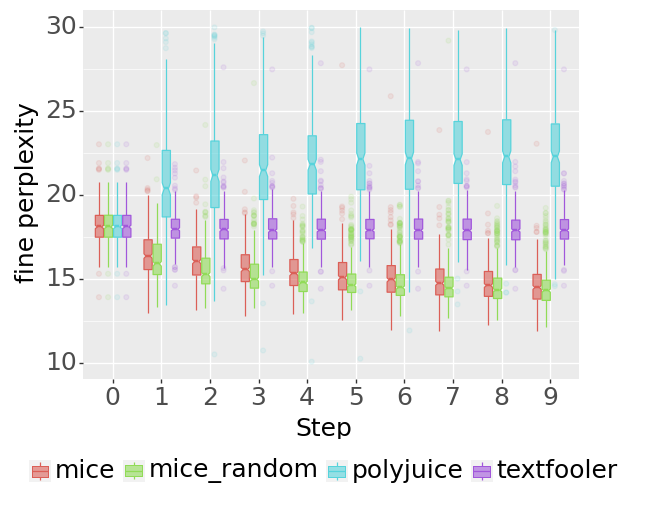


Fine Perplexity for imdb dataset:
polyjuice, fine perplexity@1: 35.984528096834026
mice_random, fine perplexity@1: 16.209568762224773
mice, fine perplexity@1: 16.531539647042614
textfooler, fine perplexity@1: 18.066187581993866
********************
polyjuice, fine perplexity@9: 30.73085519839556
mice_random, fine perplexity@9: 14.597270972229714
mice, fine perplexity@9: 14.606942942413543
textfooler, fine perplexity@9: 17.99172246096582
********************
----------------------------------------


In [ ]:
metric = "fine perplexity"
dataset = "imdb"


print (f"Fine Perplexity of {dataset}: ")
mice = np.load(f"Metrics/Fine Perplexity/ppl_{dataset}_mice_gpt2-imdb.npy")
mice_random = np.load(f"Metrics/Fine Perplexity/ppl_imdb_500_random_fine.npy")
textfooler = np.load(f"Metrics/Fine Perplexity/ppl_{dataset}_textfooler_gpt2-imdb.npy")
polyjuice = np.load(f"Metrics/Fine Perplexity/ppl_{dataset}_polyjuice_gpt2-imdb.npy")


mice = {i: [j for j in row if j != 0]  for i, row in enumerate(mice.T)}
mice_random = {i: [j for j in row if j != 0]  for i, row in enumerate(mice_random.T)}
textfooler = {i: [j for j in row if j != 0]  for i, row in enumerate(textfooler.T)}
polyjuice = {i: [j for j in row if j != 0]  for i, row in enumerate(polyjuice.T)}

df = to_ggplot([mice, mice_random, polyjuice, textfooler], ["mice", "mice_random", "polyjuice", "textfooler"], metric)

gg = ggplot(df) + aes(x="Step",y= metric, color='Editor', fill ="Editor") + ylim(10, 30) + geom_boxplot(notch=True,outlier_alpha = 0.1, alpha = 0.6)+theme(legend_direction='horizontal', legend_position=(.5, -.08), legend_title=element_blank(), text = element_text(size = 18)) + ylab("fine perplexity")
print (gg)

print (f"Fine Perplexity for {dataset} dataset:")
imdb_fine = dict()
for step in ["1", "9"]:
    imdb_fine[int(step)] = []
    for editor in set(df["Editor"].tolist()):
        value = np.mean(df[(df["Editor"] == editor) & (df["Step"] == step)][metric])
        imdb_fine[int(step)].append(round(value,4)) 
        print (f"{editor}, {metric}@{step}: {value}")
    print ("**"*10)
print ("----"*10)

Fine Perplexity of newsgroups: 


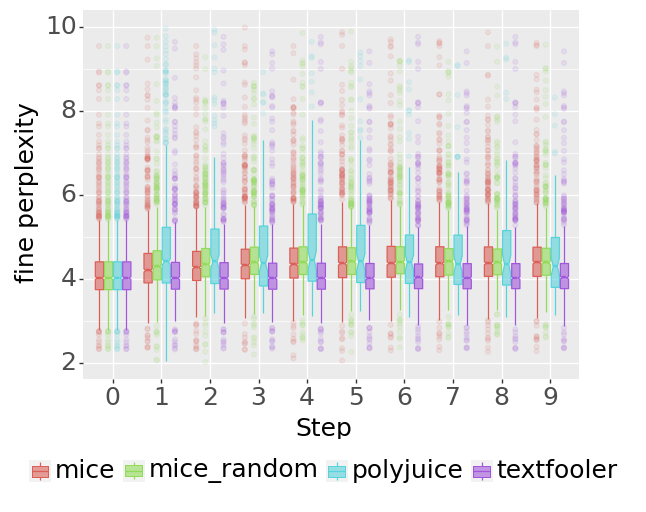


Fine Perplexity for newsgroups dataset:
polyjuice, fine perplexity@1: 6.440526553257766
mice_random, fine perplexity@1: 4.5178914221391935
mice, fine perplexity@1: 4.471984428173322
textfooler, fine perplexity@1: 4.230307010991161
********************
polyjuice, fine perplexity@9: 5.121272706985474
mice_random, fine perplexity@9: 4.517281201097273
mice, fine perplexity@9: 4.604274529926254
textfooler, fine perplexity@9: 4.200141184514945
********************
----------------------------------------


In [ ]:
metric = "fine perplexity"
dataset = "newsgroups"


print (f"Fine Perplexity of {dataset}: ")
mice = np.load(f"Metrics/Fine Perplexity/ppl_{dataset}_mice_gradient_fine.npy")
mice_random = np.load(f"Metrics/Fine Perplexity/ppl_newsgroups_mice_random_fine.npy")
textfooler = np.load(f"Metrics/Fine Perplexity/ppl_{dataset}_textfooler_allennlp_fine.npy")
polyjuice = np.load(f"Metrics/Fine Perplexity/ppl_{dataset}_polyjuice_random_fine.npy")


mice = {i: [j for j in row if j != 0]  for i, row in enumerate(mice.T)}
mice_random = {i: [j for j in row if j != 0]  for i, row in enumerate(mice_random.T)}
textfooler = {i: [j for j in row if j != 0]  for i, row in enumerate(textfooler.T)}
polyjuice = {i: [j for j in row if j != 0]  for i, row in enumerate(polyjuice.T)}

df = to_ggplot([mice, mice_random, polyjuice, textfooler], ["mice", "mice_random", "polyjuice", "textfooler"], metric)

gg = ggplot(df) + aes(x="Step",y= metric, color='Editor', fill ="Editor") + ylim(2, 10) + geom_boxplot(notch=True,outlier_alpha = 0.1, alpha = 0.6)+theme(legend_direction='horizontal', legend_position=(.5, -.08), legend_title=element_blank(), text = element_text(size = 18)) + ylab("fine perplexity")
print (gg)

print (f"Fine Perplexity for {dataset} dataset:")
news_fine = dict()
for step in ["1", "9"]:
    news_fine[int(step)] = []
    for editor in set(df["Editor"].tolist()):
        value = np.mean(df[(df["Editor"] == editor) & (df["Step"] == step)][metric])
        news_fine[int(step)].append(round(value,4)) 
        print (f"{editor}, {metric}@{step}: {value}")
    print ("**"*10)
print ("----"*10)

In [ ]:
latex = create_latex_table_without_pos("ppl-base", [], imdb_mice, news_mice, "ppl-imdb", imdb_fine, news_fine)
print(latex)

# Probability of target class

In [ ]:
dkol[2]

probs_per_level(dkol[2])

NameError: name 'dkol' is not defined

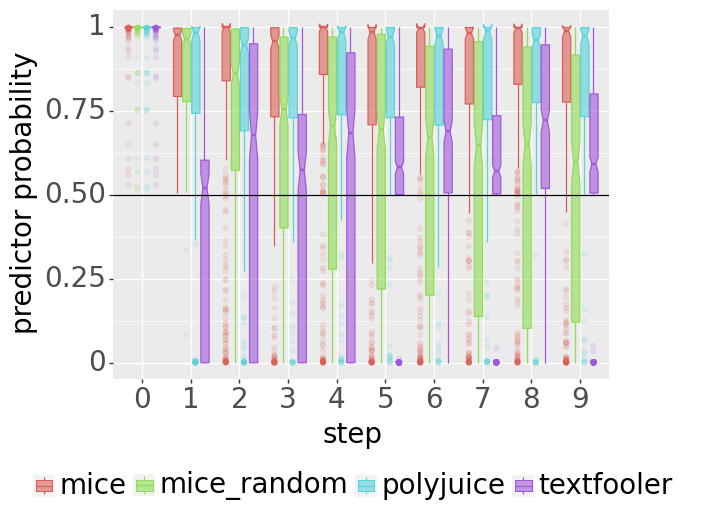

In [ ]:
def probs_per_level(edits):

    probs = []
    probs.append(max(edits[0][1]))
    for i in range(1,len(edits)):
        if edits[i-1][1][0]>edits[i-1][1][1]:
            first = True
        else:
            first = False
        if first:
            probs.append(edits[i][1][1])
        else:
            probs.append(edits[i][1][0])

    return np.array(probs)


d = dict()
d['textfooler']=load_pickle("Edits/imdb/imdb_textfooler.pickle")
d['mice']=load_pickle("Edits/imdb/imdb_mice.pickle")
d['polyjuice']= load_pickle("Edits/imdb/imdb_polyjuice.pickle")
d['mice_random']= load_pickle("Edits/imdb/imdb_500_random.pickle")
#d['mice_adj']= load_pickle("Edits/imdb/imdb_500_random.pickle")
#d['mice_verb'] = load_pickle("Edits/imdb/imdb_500_VERB.pickle")

df = pd.DataFrame()
steps = list()
nerrors=list()
editors = list()
for editor in ['textfooler','mice','polyjuice','mice_random']:
    g = np.array([probs_per_level(a) for a in d[editor]])
    for i in range(len(g)):
      for step in range (len(g[i][:10])):
        steps.append(str(step))
        nerrors.append(g[i][step])
        editors.append(editor)
df['step']=steps
df['editor']=editors
df['predictor probability']=nerrors
gg = ggplot(df) + aes(x="step", y="predictor probability",color='editor', fill = "editor") + geom_boxplot(notch=True,outlier_alpha = 0.1, alpha = 0.6)+geom_hline(yintercept = 0.5)+theme(legend_direction='horizontal', legend_position=(.5, -.11), legend_title=element_blank(), text = element_text(size = 20))
print(gg)



# Appendix 

In [ ]:
spacy = SpacyTokenizer()
def tokenize(text):
    return spacy.tokenize(text)


188.55086848635236
28.94789081885856


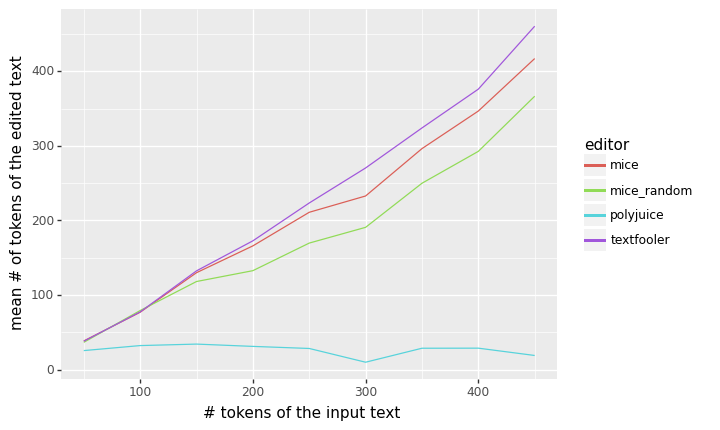

In [ ]:

dataset = "imdb"
d={"mice": f"Edits/{dataset}/{dataset}_mice.pickle", "mice_random": f"Edits/{dataset}/{dataset}_500_random.pickle", "textfooler": f"Edits/{dataset}/{dataset}_textfooler.pickle", "polyjuice": f"Edits/{dataset}/{dataset}_polyjuice.pickle"}

x, y, editors = [], [], []
for editor in ["mice", "mice_random" ,"textfooler", "polyjuice"]:
    edits = load_pickle(d[editor])

    bins = {i: [] for i in range (50, 500, 50)}
    for row in edits:
        if len(row) > 1:
            source_bin = tokenize(row[0][0])
            edited_text = tokenize(row[1][0])

            for i in range (50, 500, 50):
                if len(source_bin) < i:
                    break

            bins[i].append(len(edited_text)) 
            if editor == "polyjuice":
                    source_lengths.append(len(source_bin))
                    edited_lengths.append(len(edited_text))

        
    x += list(bins.keys())
    y += [np.mean(i) for i in bins.values()]
    editors += [editor]*len(bins)  

print(np.mean(source_lengths))
print(np.mean(edited_lengths))
            
df = pd.DataFrame()
df["length of source text"] = x
df["length of edited text"] = y
df["editor"] = editors


gg = (
    ggplot(df, aes(x="length of source text", y="length of edited text", color='editor', fill = "editor"))
    + geom_line() 
    + labs(x="# tokens of the input text", y='mean # of tokens of the edited text')
    )
print (gg)

55.8801652892562
27.31955922865014


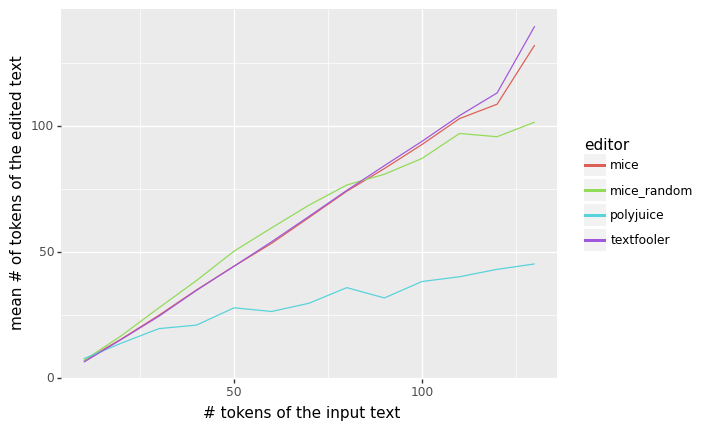

In [ ]:
dataset = "newsgroups"

d={"mice": f"C:\\Users\\acer\Documents\edits_from_aris\pickle_files\\newsgroups_mice_gradient.pkl", "mice_random": f"C:\\Users\\acer\Documents\edits_from_aris\pickle_files\\newsgroups_mice_random.pkl", "textfooler": f"C:\\Users\\acer\Documents\edits_from_aris\pickle_files\\newsgroups_textfooler_allennlp.pickle", "polyjuice": f"C:\\Users\\acer\Documents\edits_from_aris\pickle_files\\newsgroups_polyjuice_random.pkl"}

source_lengths = []
edited_lengths = []
x, y, editors = [], [], []
for editor in ["mice", "mice_random", "textfooler", "polyjuice"]:
    edits = load_pickle(d[editor])

    bins = {i: [] for i in range (10, 140, 10)}
    for row in edits:
        if len(row) > 1:
            source_bin = tokenize(row[0][0])
            edited_text = tokenize(row[1][0])

            for i in range (10, 140, 10):
                if len(source_bin) < i:
                    break

            bins[i].append(len(edited_text)) 
            if editor == "polyjuice":
                source_lengths.append(len(source_bin))
                edited_lengths.append(len(edited_text))

        
    x += list(bins.keys())
    y += [np.mean(i) for i in bins.values()]
    editors += [editor]*len(bins)  

print(np.mean(source_lengths))
print(np.mean(edited_lengths))

df = pd.DataFrame()
df["length of source text"] = x
df["length of edited text"] = y
df["editor"] = editors


gg = (
    ggplot(df, aes(x="length of source text", y="length of edited text", color='editor', fill = "editor"))
    + geom_line() 
    + labs(x="# tokens of the input text", y='mean # of tokens of the edited text')
    )
print (gg)